1-2 -ok, ok

1-4 -ok, ok

1-5

2-3 -ok (Not good)

2-4 -ok, ok

2-5

4-5 -ok, ok

In [1]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 1.0MB/s ta 0:00:01
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# World-living-quality-analysis

### Title:
Make Maslow Great Again ...or not
——A Statistical Methodology/Model/Proof/Falsification of Maslow's Pyramid

### Team members:
Worawich (Win) Chaiyakunapruk,
Phil Zhe Wang, 
Yao Xiao,  

### Summary: 
Maslow's hierarchy of needs, or the so-called Maslow pyramid, is a famous theory when we talk about human being's self-satisfaction. Raised in 1943, the book A Theory of Human Motivation, it describes people's psychological motivation in different developing periods.
However famous, the doubts it received has never been reduced. You will get over 20000 results in google scholar after typing in keywords like "Maslow's hierarchy of needs criticism".
But most of the criticisms are built from the point of Psychology, which makes them not that strong on my opinion.
This time, we will build the hierarchy model with real data, and try to prove if he is right or wrong.
Maslow used to be a great psychologist, but our slogan is:
Make Maslow Great Again! (or not, if possible, because in that situation is most likely to publish a paper)

### Hypotheses: 
1. Maslow's theory is right in all!
2. Maslow's theory is right to some extent!
3. Maslow's theory has a scope: it works for developing contries but not developed contries!

### Datasets:	
- World Happiness Report [https://www.kaggle.com/unsdsn/world-happiness]
- The Human Freedom Index [https://www.kaggle.com/gsutters/the-human-freedom-index]
- UNODC Global Criminal Justice Statistics [https://data.world/unodc/b4aa5785-7a33-4c07-af15-0f15d95a121f] I already registered and download this one.
- Poverty And Equity Database [https://datacatalog.worldbank.org/dataset/poverty-and-equity-database]
- IBRD Statement Of Loans - Historical Data [https://finances.worldbank.org/Loans-and-Credits/IBRD-Statement-Of-Loans-Historical-Data/zucq-nrc3]
- World Integrated Trade Solution Trade Stats [https://datacatalog.worldbank.org/dataset/world-integrated-trade-solution-trade-stats]
- Economic Fitness [https://datacatalog.worldbank.org/dataset/economic-fitness]
- Suicide Rates Overview 1985 to 2016 [https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016]
- World Bank: Education Data [https://www.kaggle.com/theworldbank/world-bank-intl-education]

### Mapping
- Physiological ——> Hunger/living data
- Safety ——> Criminal data
- Love/belonging ——> Marriage/Children/Family data
- Esteem ——> Position/Class data
- Self-actualization ——> Job satisfaction/Happiness data

### Git: 
https://github.com/winwowin/World-living-quality-analysis


## Getting data

In [2]:
class GET_DATA(object):
    def __init__(self):
        global logging
        import logging
        global pd
        import pandas as pd
    
    def Peace(self):
        """
        This is a function to pull the most updated peace data modified from https://www.kaggle.com/kretes/gpi2008-2016

        Global Peace Index (GPI) measures the relative position of nations' and regions' peacefulness.
        The GPI ranks 163 independent states and territories (99.7 per cent of the world’s population)
        according to their levels of peacefulness. In the past decade, the GPI has presented trends of 
        increased global violence and less peacefulness.

        The lower the number indicates more peace in the region.
        """
        import requests
        import re
        from bs4 import BeautifulSoup
        response = requests.get(url='https://en.wikipedia.org/wiki/Global_Peace_Index')
        soup = BeautifulSoup(response.text, 'html.parser')
        base_year = 2018        #latest year
        years = 9               #number of years to get data
        def get_countries_by_gpi():
            i = 1
            for table in soup.find_all('table', re.compile('wikitable sortable')):
                if table.find_all('th')[0].get_text() == 'Country\n':
                    for tr in table.find_all('tr'):
                        country_name = tr.find_all('a')[0].get_text()
                        if not country_name.startswith('['):
                            row = {'country': country_name}
                            for year, index in zip(range(base_year-years+1,base_year+1),range(2*(years),0,-2)):
                                score = tr.find_all('td')[index].get_text()
                                if score != '' and score != '\n':
                                    row['score_%s' % year] = float(score)
                            yield row

        import pandas as pd
        gpi = pd.DataFrame.from_dict(list(get_countries_by_gpi()))
        # print(gpi)
        gpi.to_csv('gpi_%s-%s.csv' % (base_year-years+1,base_year),index=False)
        gpi.columns = ['Country','pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016','pi_2017','pi_2018']
        return(gpi)    

    
    def Trade(self):
        """
        WITS Trade Stats is a database created by aggregating data from UN COMTRADE and UNCTAD TRAINS database. 
        It provides information on bilateral trade exports, imports and tariffs for over 180 countries and regions.
        """        
        import logging
        logging.basicConfig(filename="test.log", level=logging.DEBUG)
        file_path = "590PR_final_datasets"
        file_name = "wits_en_trade_summary_allcountries_allyears.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        for name in zipfile.ZipFile.infolist(zf):
            logging.debug(name.filename)
            try:
                df.append(pd.read_csv(zf.open(name.filename), header=0 ))
            except:
                pass
        frame = pd.concat(df, axis=0, ignore_index=True)
        return frame
    
    
    def Hunger(self):
        file_path = "590PR_final_datasets"
        file_name = "Hunger.csv"
        import pandas as pd
        df_hunger = pd.read_csv(file_path + "/" + file_name, na_values = '\t', sep = '\t', header = 0)
        #display(df_hunger)
        list = []
        list.append(df_hunger['Country Name'])
        list.append(df_hunger['Indicator Name'])
        for i in range(2009, 2019):
            year = str(i)
            df = df_hunger[year]
            list.append(df)
        df_new_hunger = pd.concat(list,axis = 1)
        df_new_hunger.columns = ['Country', 'undernourishment_rate_2009','undernourishment_rate_2010',
                                'undernourishment_rate_2011','undernourishment_rate_2012',
                                'undernourishment_rate_2013','undernourishment_rate_2014',
                                'undernourishment_rate_2015','undernourishment_rate_2016',
                                'undernourishment_rate_2017','undernourishment_rate_2018','undernourishment_rate_2019']
        return df_new_hunger
    
    
    def Unemployment(self):
        file_path = "590PR_final_datasets"
        file_name = "unemployment.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        return df

    
    def Suicide(self):
        file_path = "590PR_final_datasets"
        file_name = "suicide-rates-overview-1985-to-2016.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        return df


    def Freedom(self):
        """The Human Freedom Index presents the state of human freedom in the world based on a broad measure that 
        encompasses personal, civil, and economic freedom. Human freedom is a social concept that recognizes the 
        dignity of individuals and is defined here as negative liberty or the absence of coercive constraint. 
        Because freedom is inherently valuable and plays a role in human progress, it is worth measuring carefully. The Human Freedom Index is a resource that can help to more objectively observe relationships between freedom and other social and economic phenomena, as well as the ways in which the various dimensions of freedom interact with one another.
        """
        file_path = "590PR_final_datasets"
        file_name = "the-human-freedom-index.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        return df

    
    def Happiness(self):
        import zipfile
        file_path = "590PR_final_datasets"
        file_name = "world-happiness-report.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        happy = {}
        for name in zipfile.ZipFile.infolist(zf):
            happy[name.filename] = pd.read_csv(zf.open(name.filename))
        return happy

    
    def GDELT(self, start, end):
        """
        The GDELT Project is the largest, most comprehensive, and highest resolution open database of human society ever created. 
        Just the 2015 data alone records nearly three quarters of a trillion emotional snapshots and more than 1.5 billion location 
        references, while its total archives span more than 215 years, making it one of the largest open-access spatio-temporal 
        datasets in existance and pushing the boundaries of "big data" study of global human society. Its Global Knowledge Graph 
        connects the world's people, organizations, locations, themes, counts, images and emotions into a single holistic network 
        over the entire planet.
        
        This is Gdelt 2.0 (supports from the date after Feb, 2015)
        This function pull the events ids and the country it takes place
        Please input the date in the format of 'yyyy mm dd'.
        
        This function use a package from https://github.com/linwoodc3/gdeltPyR
        """
        import gdelt
        gd = gdelt.gdelt(version=2)
        results = gd.Search([start,end],table='events',coverage=True,translation=False)
        return (results[['GLOBALEVENTID','ActionGeo_FullName']])

    
    def UNODC_crime(self, sheet = None):
        """
        Crime data from UNODC including 
        'Car theft', 'Burglary', 'Robbery', 'Sexual Assault', 'Physical Assault', 'Bribery', 'Police Reporting Car Theft',
        'Police Reporting Burglary', 'Police Reporting Robbery', 'Police Reporting Sexual Assault', 'Police Reporting Bribery'
        or type 'ALL' to get all data.
        """
        import pandas as pd
        from pandas import read_excel
#         sheet = input("Please choose crime report from the following categories\n'Car theft', 'Burglary', 'Robbery', 'Sexual Assault', 'Physical Assault', 'Bribery', 'Police Reporting Car Theft','Police Reporting Burglary', 'Police Reporting Robbery', 'Police Reporting Sexual Assault', 'Police Reporting Bribery'")         
        if sheet == "ALL":
            sheet = None
        file_path = "590PR_final_datasets"
        file_name = "data-and-metadata-from-crime-victimisation-surveys-2004-2014-xlsx-1.xlsx"
        self.dfs = pd.read_excel(file_path + "/" + file_name, sheetname = sheet, header = 12)
#         logging.debug(self.dfs)
#         logging.debug(self.dfs.keys())
        return self.dfs

    def Poverty(self, sheet = None):
        import zipfile
        file_path = "590PR_final_datasets"
        file_name = "PovStats_csv.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        pov = {}
        for name in zipfile.ZipFile.infolist(zf):
#             logging.debug(name.filename)
            pov[name.filename] = pd.read_csv(zf.open(name.filename))
#         logging.debug((df))
        if not sheet == None:
            return pov[sheet]
        else:
            return pov

    def Married(self, sheet = None):
        """
        Marriged data from The United Nations Statistics Division.
        http://data.un.org/Data.aspx?q=Marital&d=POP&f=tableCode%3A23
        """
        import pandas as pd
        from pandas import read_excel
#         sheet = input("Please choose crime report from the following categories\n 'INFORMATION NOTE', 'Database Field Descriptions', 'MARITAL_STATUS_BY_AGE', 'CURRENTLY MARRIED', 'EVER_MARRIED', 'SMAM'")         
        if sheet == "ALL":
            sheet = None
        file_path = "590PR_final_datasets"
        file_name = "UNPD_WMD_2017_MARITAL_STATUS.xlsx"
        married_dfs = pd.read_excel(file_path + "/" + file_name, sheetname = sheet, header = 2)
        print(married_dfs.keys())
#         logging.debug(self.dfs)
#         logging.debug(married_dfs.keys())
        return married_dfs

    def marital():
        file_path = "590PR_final_datasets"
        file_name = "UNdata_MARITAL_STATUS_2010-2013.csv"
        df = pd.read_csv(file_path + '/' + file_name)
        df.drop(df.tail(74).index,inplace=True)

        #     df.dropna(inplace=True)

        file_name = "UNdata_MARITAL_STATUS_2014-2017.csv"
        df2 = pd.read_csv(file_path + '/' + file_name)
        df2.drop(df2.tail(54).index,inplace=True)

        df_all = pd.concat([df, df2], axis= 0).reset_index(drop=True)
        return df_all

    def Innovation( sheet = None):
        import zipfile
        file_path = "590PR_final_datasets"
        file_name = "Innovation.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        inv = {}
        for name in zipfile.ZipFile.infolist(zf):
    #             logging.debug(name.filename)
            inv[name.filename] = pd.read_csv(zf.open(name.filename))
    #         logging.debug((df))
        if not sheet == None:
            return inv[sheet]
        else:
            return inv




In [3]:
class PREP_DATA(object):
    def __init__(self):
        global logging
        import logging
        global pd
        import pandas as pd
    
    def freedom():
        freedom = GET_DATA().Freedom()
        free = freedom[['year','countries','hf_score']]
        free.dropna(inplace=True)
        free.sort_values('hf_score', ascending = True, inplace = True)
        free.reset_index(drop=True, inplace=True)

        free_list = []
        for i in range(6):
            free.rename({'countries':'Country'}, axis='columns', inplace=True)
            free_list.append(free[free['year']==(2013+i)])
        return free_list

In [4]:
# dir(GET_DATA)

freedom = GET_DATA().Freedom()
# gdelt = GET_DATA().GDELT("2016 10 15", "2016 10 16")
happiness = GET_DATA().Happiness()
hunger = GET_DATA().Hunger()
married = GET_DATA().Married('CURRENTLY MARRIED')
peace = GET_DATA().Peace()
# print(GET_DATA().Poverty().keys())
# GET_DATA().Poverty("PovStatsData.csv")
poverty = GET_DATA().Poverty()
suicide = GET_DATA().Suicide
trade = GET_DATA().Trade
crime = GET_DATA().UNODC_crime() 
burglary = GET_DATA().UNODC_crime('Burglary')
unemploy = GET_DATA().Unemployment()



/Users/xy/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


Index(['Country or area', 'ISO code', 'YearStart', 'YearEnd', 'Sex',
       'AgeGroup', 'AgeStart', 'AgeEnd', 'DataValue', 'DataProcess',
       'DataCatalog ShortName', 'DataCatalog ID', 'DataCatalog LongName',
       'Data Source', 'Including_consensual_unions', 'Note on Data',
       'Note on Country and Population'],
      dtype='object')


/Users/xy/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


## Part 1: Analysis of level 1-2, Physiological-Safety 
by hunger+peace index dataset

In [5]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def Analysis_first_two_level(hunger, peace): 
    df_level1 = pd.merge(hunger, peace, on = 'Country', how='inner')
    df_level1 = df_level1.drop_duplicates(keep='first', inplace=False)
    x_list = []
    y_list = []
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
              ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
              ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
              ['undernourishment_rate_2016','pi_2016']]
    for i in item:
        df = df_level1[i]
        dd = df.sort_values(by=i[0], ascending=True)
        x = np.asarray(dd[i[0]])
        y = np.asarray(dd[i[1]])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_x = np.delete(x,j)
                new_y = np.delete(y,j)
        x_list.append(new_x)
        y_list.append(new_y)
    return x_list, y_list, df_level1

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
                  ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
                  ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
                  ['undernourishment_rate_2016','pi_2016']]
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    for f in range(len(x_list)):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+item[f][1][-4:], marker = marker[f],color = color[f])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Peacefulness Index')
    plt.ylim(1,4)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()

In [7]:
x_list, y_list, df_level1 = Analysis_first_two_level(hunger, peace)

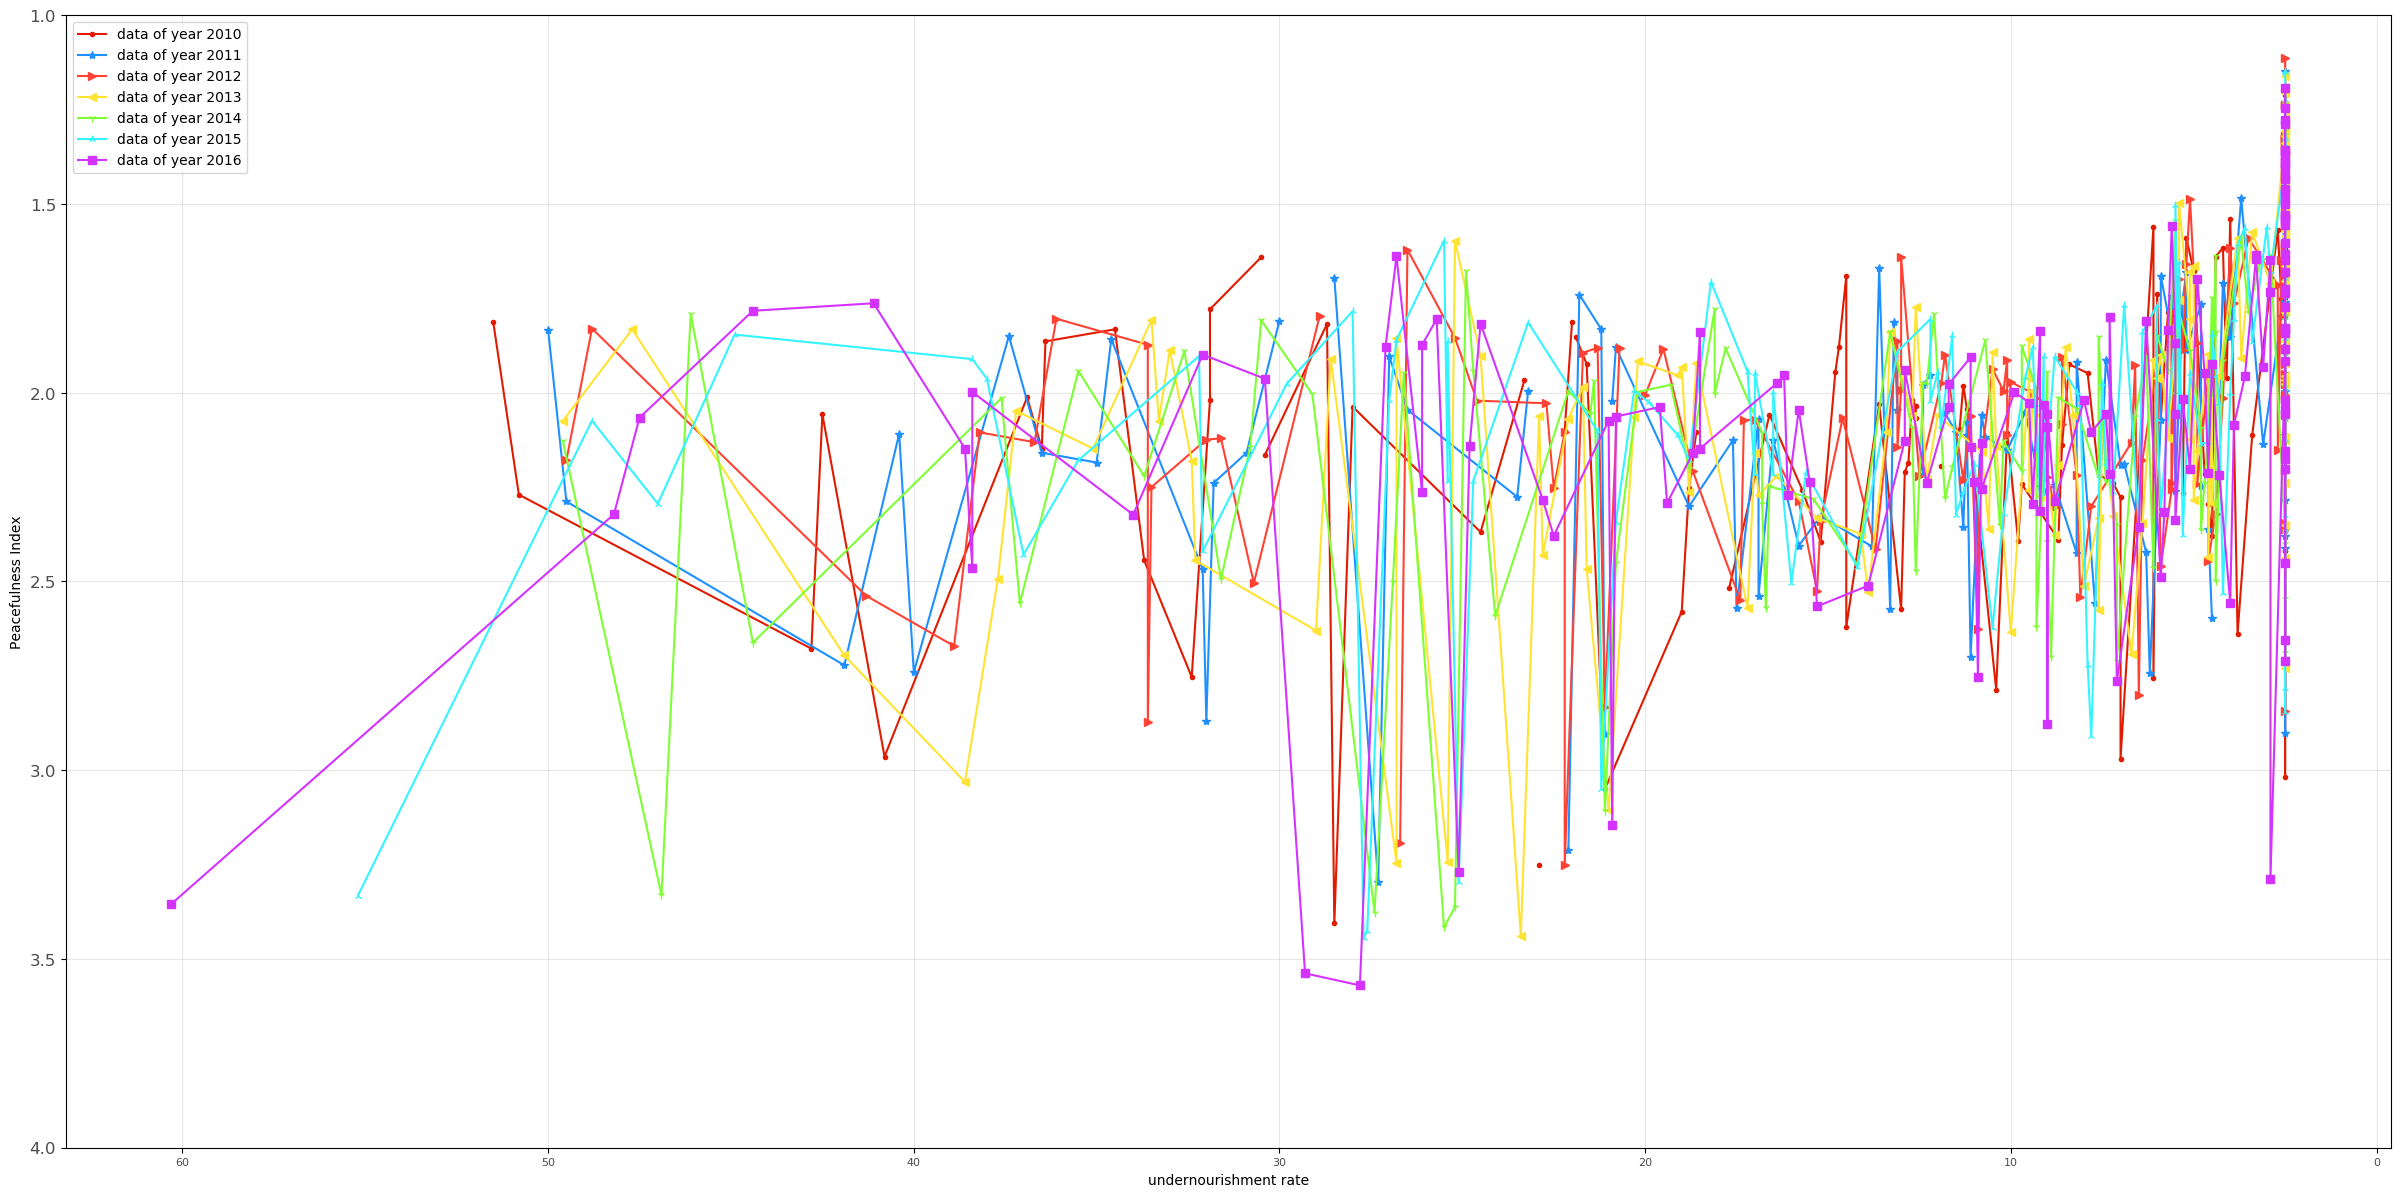

In [26]:
plot(x_list, y_list)

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_cat(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
                  ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
                  ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
                  ['undernourishment_rate_2016','pi_2016']]
    x_item = ['[0,5)','[5,10)','[10,15)','[15,20)','[20,25)','[25,30)','[30,35)','[35,40)','[40,45)',
             '[45,50)']#,'[50+']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((10,2))
        for b in range(len(cc)):
            if cc[b] >= 0 and cc[b]<5:
                y_item[0][0] += cy[b]
                y_item[0][1] += 1
            if cc[b] >= 5 and cc[b]<10:
                y_item[1][0] += cy[b]
                y_item[1][1] += 1
            if cc[b] >= 10 and cc[b]<15:
                y_item[2][0] += cy[b]
                y_item[2][1] += 1
            if cc[b] >= 15 and cc[b]<20:
                y_item[3][0] += cy[b]
                y_item[3][1] += 1
            if cc[b] >= 20 and cc[b]<25:
                y_item[4][0] += cy[b]
                y_item[4][1] += 1
            if cc[b] >= 25 and cc[b]<30:
                y_item[5][0] += cy[b]
                y_item[5][1] += 1
            if cc[b] >= 30 and cc[b]<35:
                y_item[6][0] += cy[b]
                y_item[6][1] += 1
            if cc[b] >= 35 and cc[b]<40:
                y_item[7][0] += cy[b]
                y_item[7][1] += 1
            if cc[b] >= 40 and cc[b]<45:
                y_item[8][0] += cy[b]
                y_item[8][1] += 1
            if cc[b] >= 45 and cc[b]<50:
                y_item[9][0] += cy[b]
                y_item[9][1] += 1
#             if cc[b] >= 50:
#                 y_item[10][0] += cy[b]
#                 y_item[10][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+item[s][1][-4:], marker = marker[s],color = color[s])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Peacefulness Index')
    plt.ylim(1.6,2.8)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()

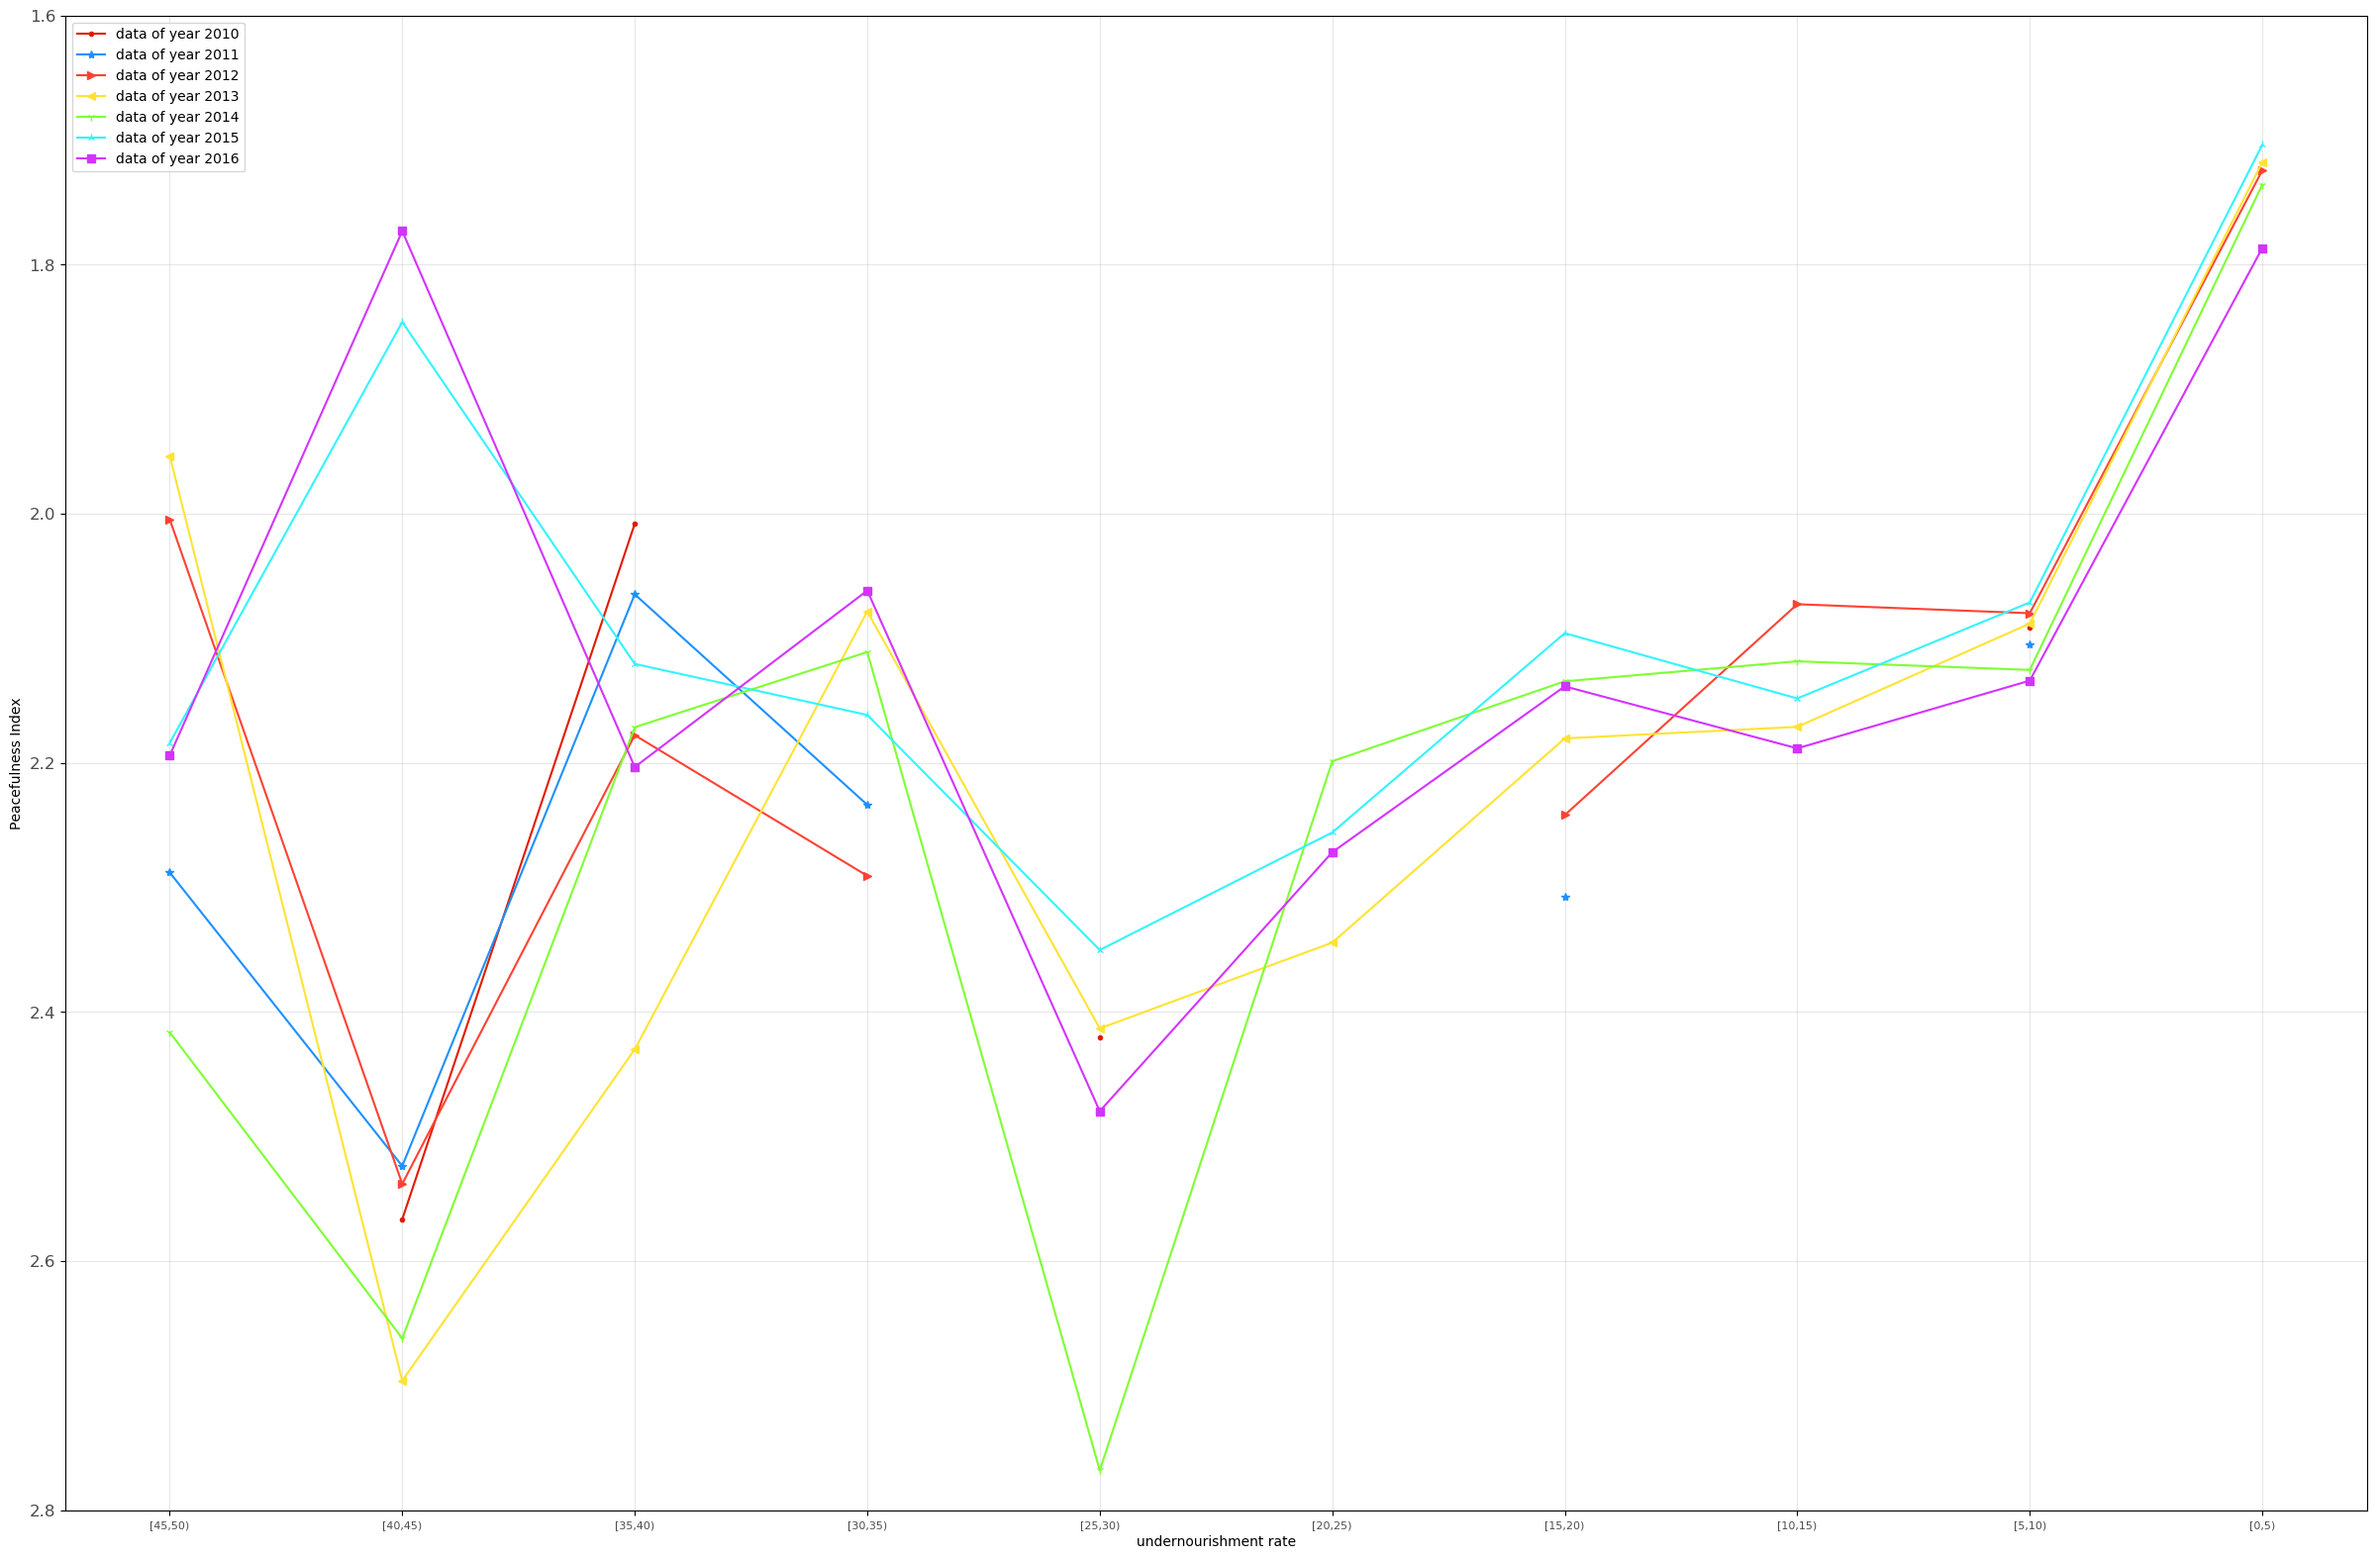

In [29]:
plot_cat(x_list, y_list)

In [195]:
import seaborn as sns
def Box_plot_level12(df_level1):
    fig, axes = plt.subplots(3, 3, figsize=(60,40))
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
                  ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
                  ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
                  ['undernourishment_rate_2016','pi_2016']]
    peace_item = ['Peace_Index_of 2010','Peace_Index_of 2011','Peace_Index_of 2012','Peace_Index_of 2013',
                  'Peace_Index_of 2014','Peace_Index_of 2015','Peace_Index_of 2016']
    for s in range(7):
        cat_list = []
        data = df_level1[item[s]]
        cc = data[item[s][0]]
        for b in range(data.iloc[:,0].size):
            if math.isnan(cc[b]) == True:
                cat_list.append(math.nan)
            if cc[b] >= 0 and cc[b]<5:
                cat_list.append('[0,5)')
            if cc[b] >= 5 and cc[b]<10:
                cat_list.append('[5,10)')
            if cc[b] >= 10 and cc[b]<15:
                cat_list.append('[10,15)')
            if cc[b] >= 15 and cc[b]<20:
                cat_list.append('[15,20)')
            if cc[b] >= 20 and cc[b]<25:
                cat_list.append('[20,25)')
            if cc[b] >= 25 and cc[b]<30:
                cat_list.append('[25,30)')
            if cc[b] >= 30 and cc[b]<35:
                cat_list.append('[30,35)')
            if cc[b] >= 35 and cc[b]<40:
                cat_list.append('[35,40)')
            if cc[b] >= 40 and cc[b]<45:
                cat_list.append('[40,45)')
            if cc[b] >= 45 and cc[b]<50:
                cat_list.append('[45,50)')
        cat_col = pd.DataFrame(cat_list)
        new_data = pd.concat([data,cat_col],axis=1)
        new_data.columns = [item[s][0], peace_item[s], 'Catergory of Hunger']
        box = sns.boxplot(x=peace_item[s], y='Catergory of Hunger', data=new_data, whis="range", palette="vlag",
                          ax=axes[s // 3, s % 3], 
                          order=['[0,5)','[5,10)','[10,15)','[15,20)','[20,25)','[25,30)','[30,35)','[35,40)','[40,45)'])
        #rescale boxplot x-axis with log
        axes[s // 3, s % 3].set_title('Box Plot for Data of year '+ item[s][0][-4:])

        fig.subplots_adjust(wspace=.4)

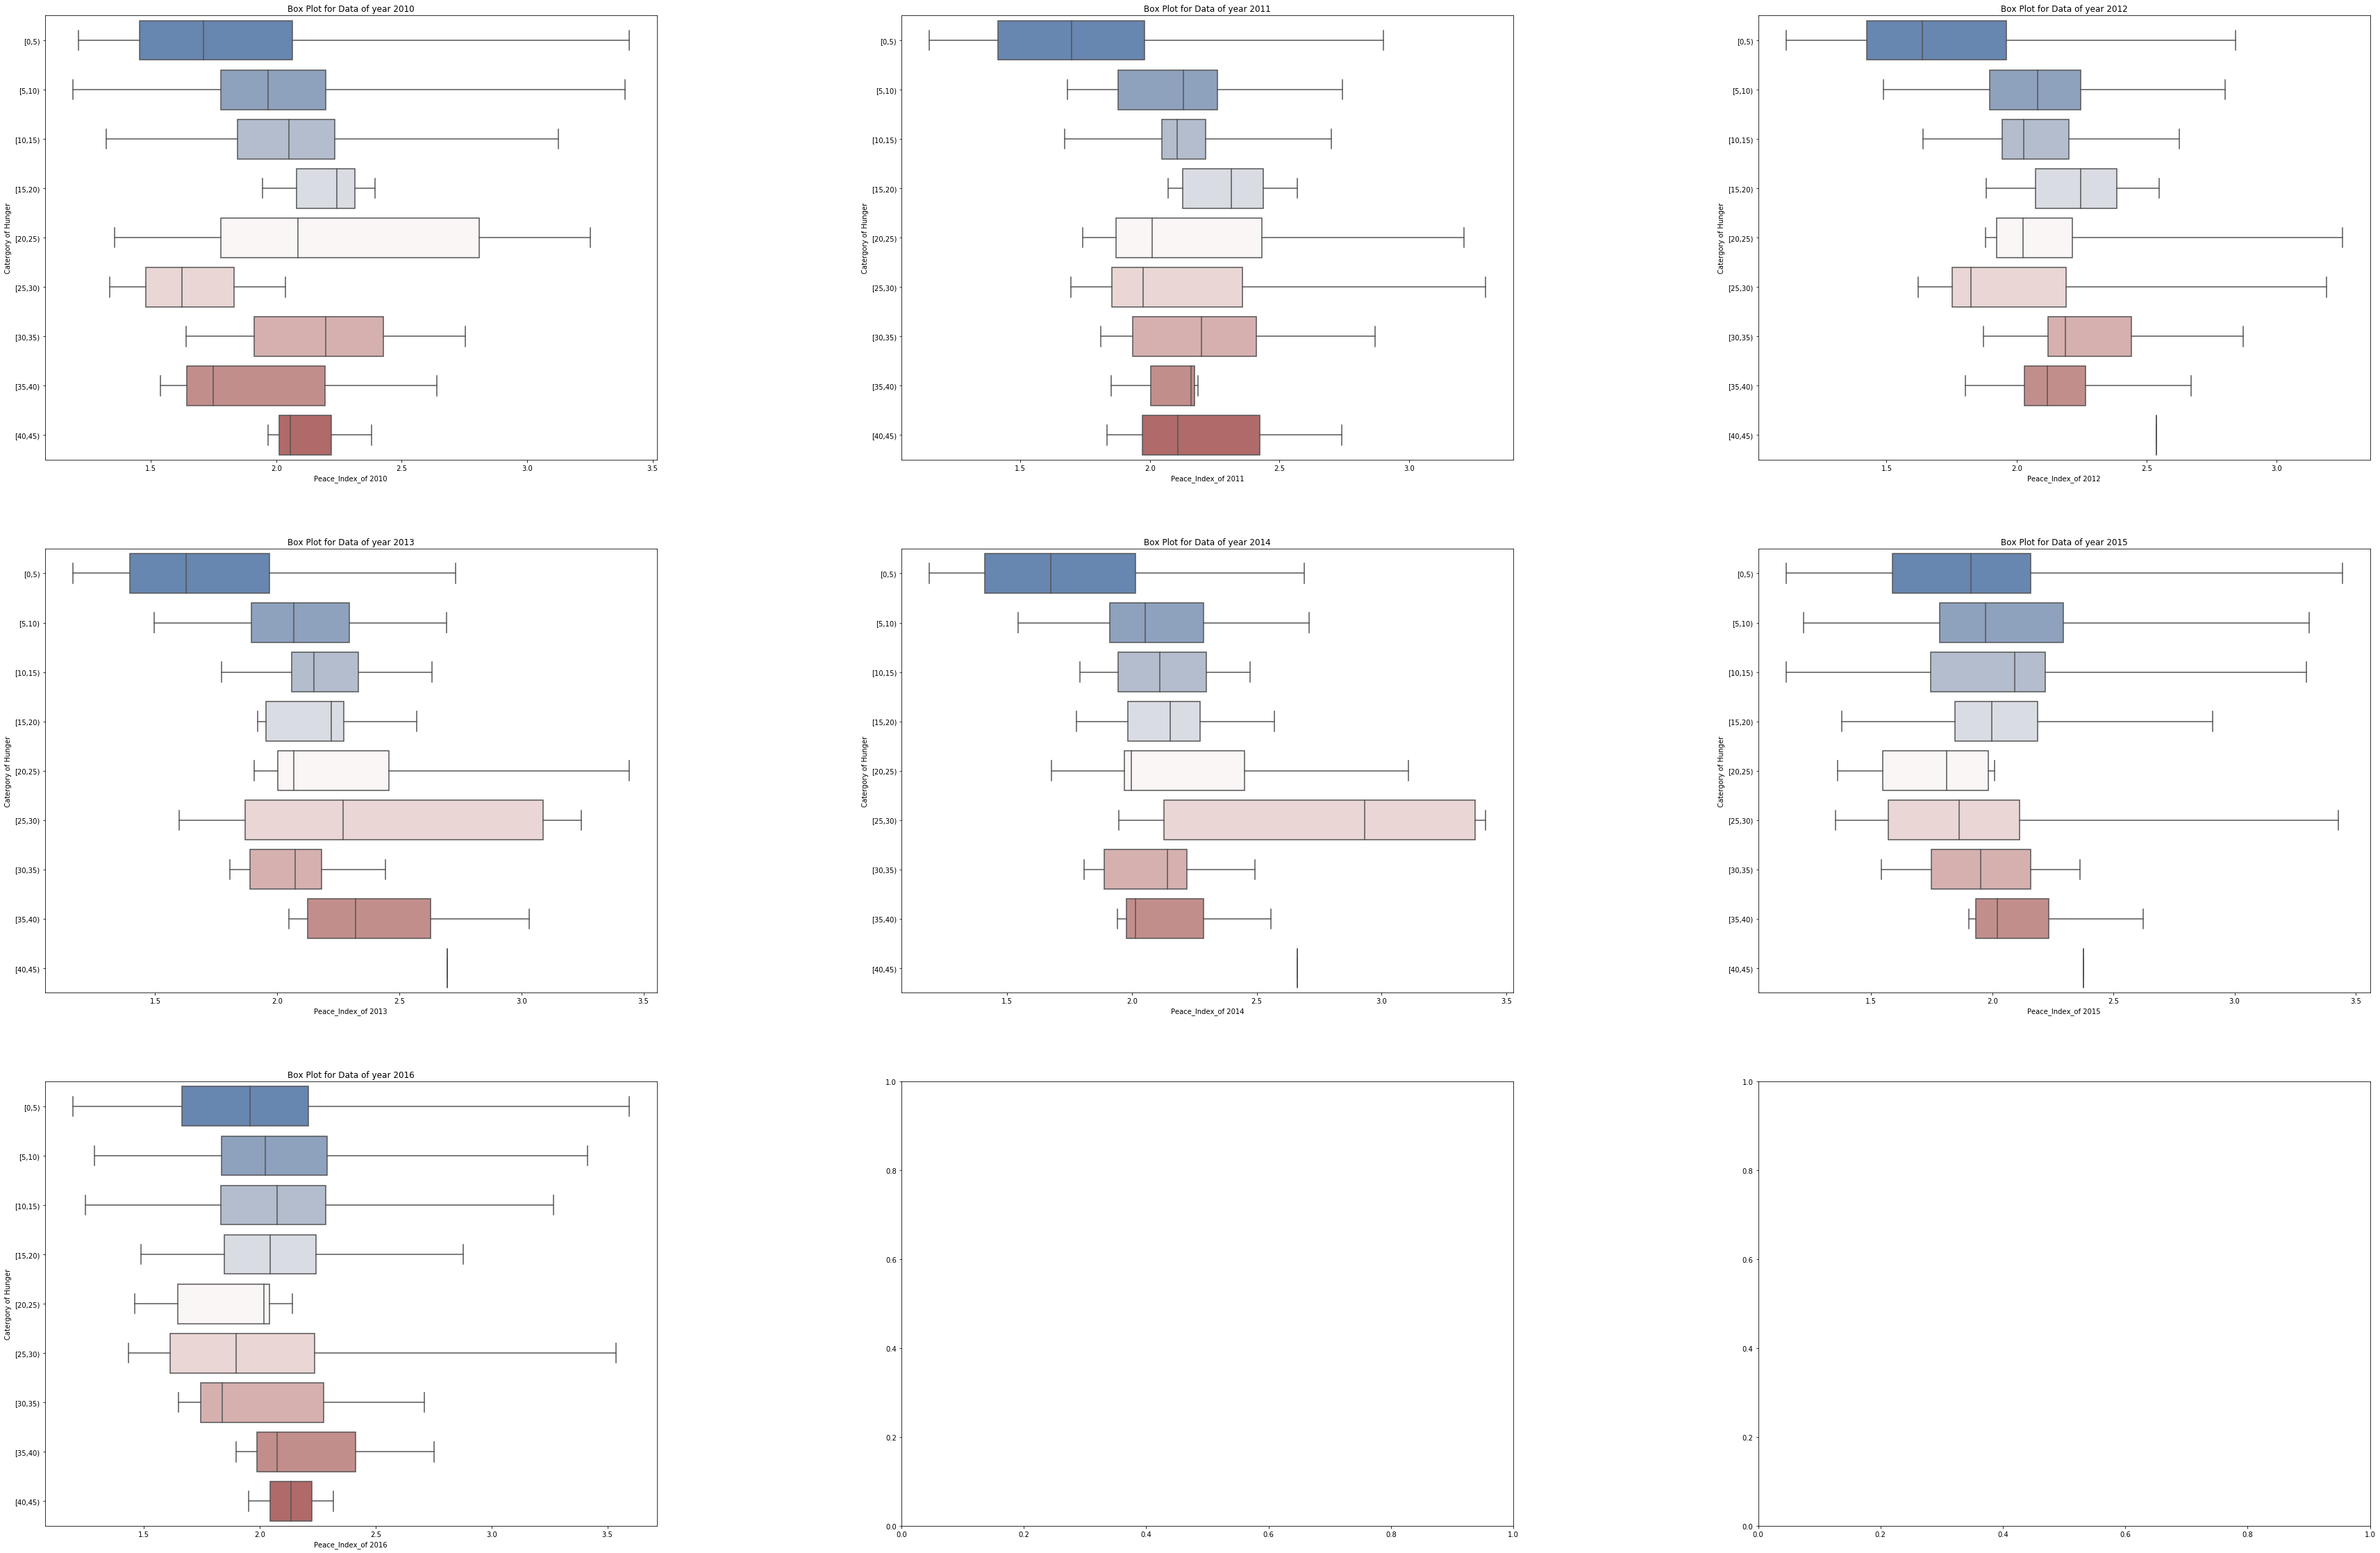

In [196]:
Box_plot_level12(df_level1)

## Part 2: Analysis of level 2-3, Safety-Belonging 
Peace Index and Marriage data

In [33]:
import pandas as pd

In [34]:
married = GET_DATA.marital()
married = married.astype({"Year": int}, copy = False)
def get_marriage_rate(married):
    # percent_married = pd.DataFrame()
    percent_married = []
    for i in range(8):
        total = married.loc[(married['Marital status']=='Total') & (married['Age']=='Total')].groupby(['Year', 'Country or Area'], as_index=False).sum()
        single = married.loc[(married['Marital status']=='Single (never married)') & (married['Age']=='Total')].groupby(['Year', 'Country or Area'], as_index=False).sum()
        single_pop = single[single['Year'] == 2010+i].groupby(['Year', 'Country or Area']).sum()['Value']
        total_pop = total[total['Year'] == 2010+i].groupby(['Year', 'Country or Area']).sum()['Value']
        df1 = (total_pop-single_pop)/total_pop
        df = pd.concat([total_pop.to_frame().reset_index(), df1.to_frame().reset_index()['Value']],axis=1)
        df.columns = ['Year','Country','Total_pop','Marriage_Rate']
        percent_married.append(df)
    return percent_married

/Users/xy/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [35]:
percent_married = get_marriage_rate(married)

In [40]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def Analysis_two_third_level(peace, percent_married): 
    level2_list = []
    for i in range(8):
        df = percent_married[i]
        string = 'pi_'+str(2010+i)
        p1 = peace['Country']
        p2 = peace[string]   
        p = pd.concat([p1, p2],axis = 1)
        df_level2 = pd.merge(df, p, on = 'Country', how='inner')
        level2_list.append(df_level2)
    x_list = []
    y_list = []
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016','pi_2017','pi_2018']
    for s in range(8):
        df = level2_list[s]
        dd = df.sort_values(by=[pi_list[s]], ascending=True)
        x = np.asarray(dd[pi_list[s]])
        y = np.asarray(dd['Marriage_Rate'])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_y = np.delete(y,j)
                new_x = np.delete(x,j)        
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list, df_level2

In [41]:
x_list_level2, y_list_level2, df_level2 = Analysis_two_third_level(peace, percent_married)

In [43]:
df_level2.head(20)

Year      Country   Total_pop  Marriage_Rate  pi_2017
0   2017     Bulgaria   7101859.0       0.576950    1.631
1   2017       Canada  36708083.0       0.606136    1.371
2   2017   Costa Rica   4946700.0       0.523614    1.701
3   2017      Denmark   5760694.0       0.514148    1.337
4   2017      Estonia   1315635.0       0.541599    1.712
5   2017      Finland   5503297.0       0.517811    1.515
6   2017      Hungary   9797561.0       0.557020    1.494
7   2017      Iceland    338349.0       0.465094    1.137
8   2017        Italy  60589445.0       0.576576    1.737
9   2017       Latvia   1950116.0       0.580063    1.670
10  2017    Lithuania   2847904.0       0.569460    1.732
11  2017  Netherlands  17081507.0       0.519887    1.525
12  2017       Norway   5258317.0       0.478242    1.486
13  2017     Slovakia   5435343.0       0.563628    1.611
14  2017     Slovenia   2065895.0       0.510245    1.364
15  2017       Sweden   9995153.0       0.473989    1.516
16  2017  Switzerland   8419550.0       0.559317    1.373

In [226]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_level_2(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    marker = ['.','*','>','<','1','2','s','3','4']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF','#3351FF','#D433FF']
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016','pi_2017','pi_2018']
    for f in range(8):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+pi_list[f][-4:], marker = marker[f],color = color[f])
    plt.xlabel('Peacefulness Index')
    plt.ylabel('Marriage rate')
    plt.ylim(0,1)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

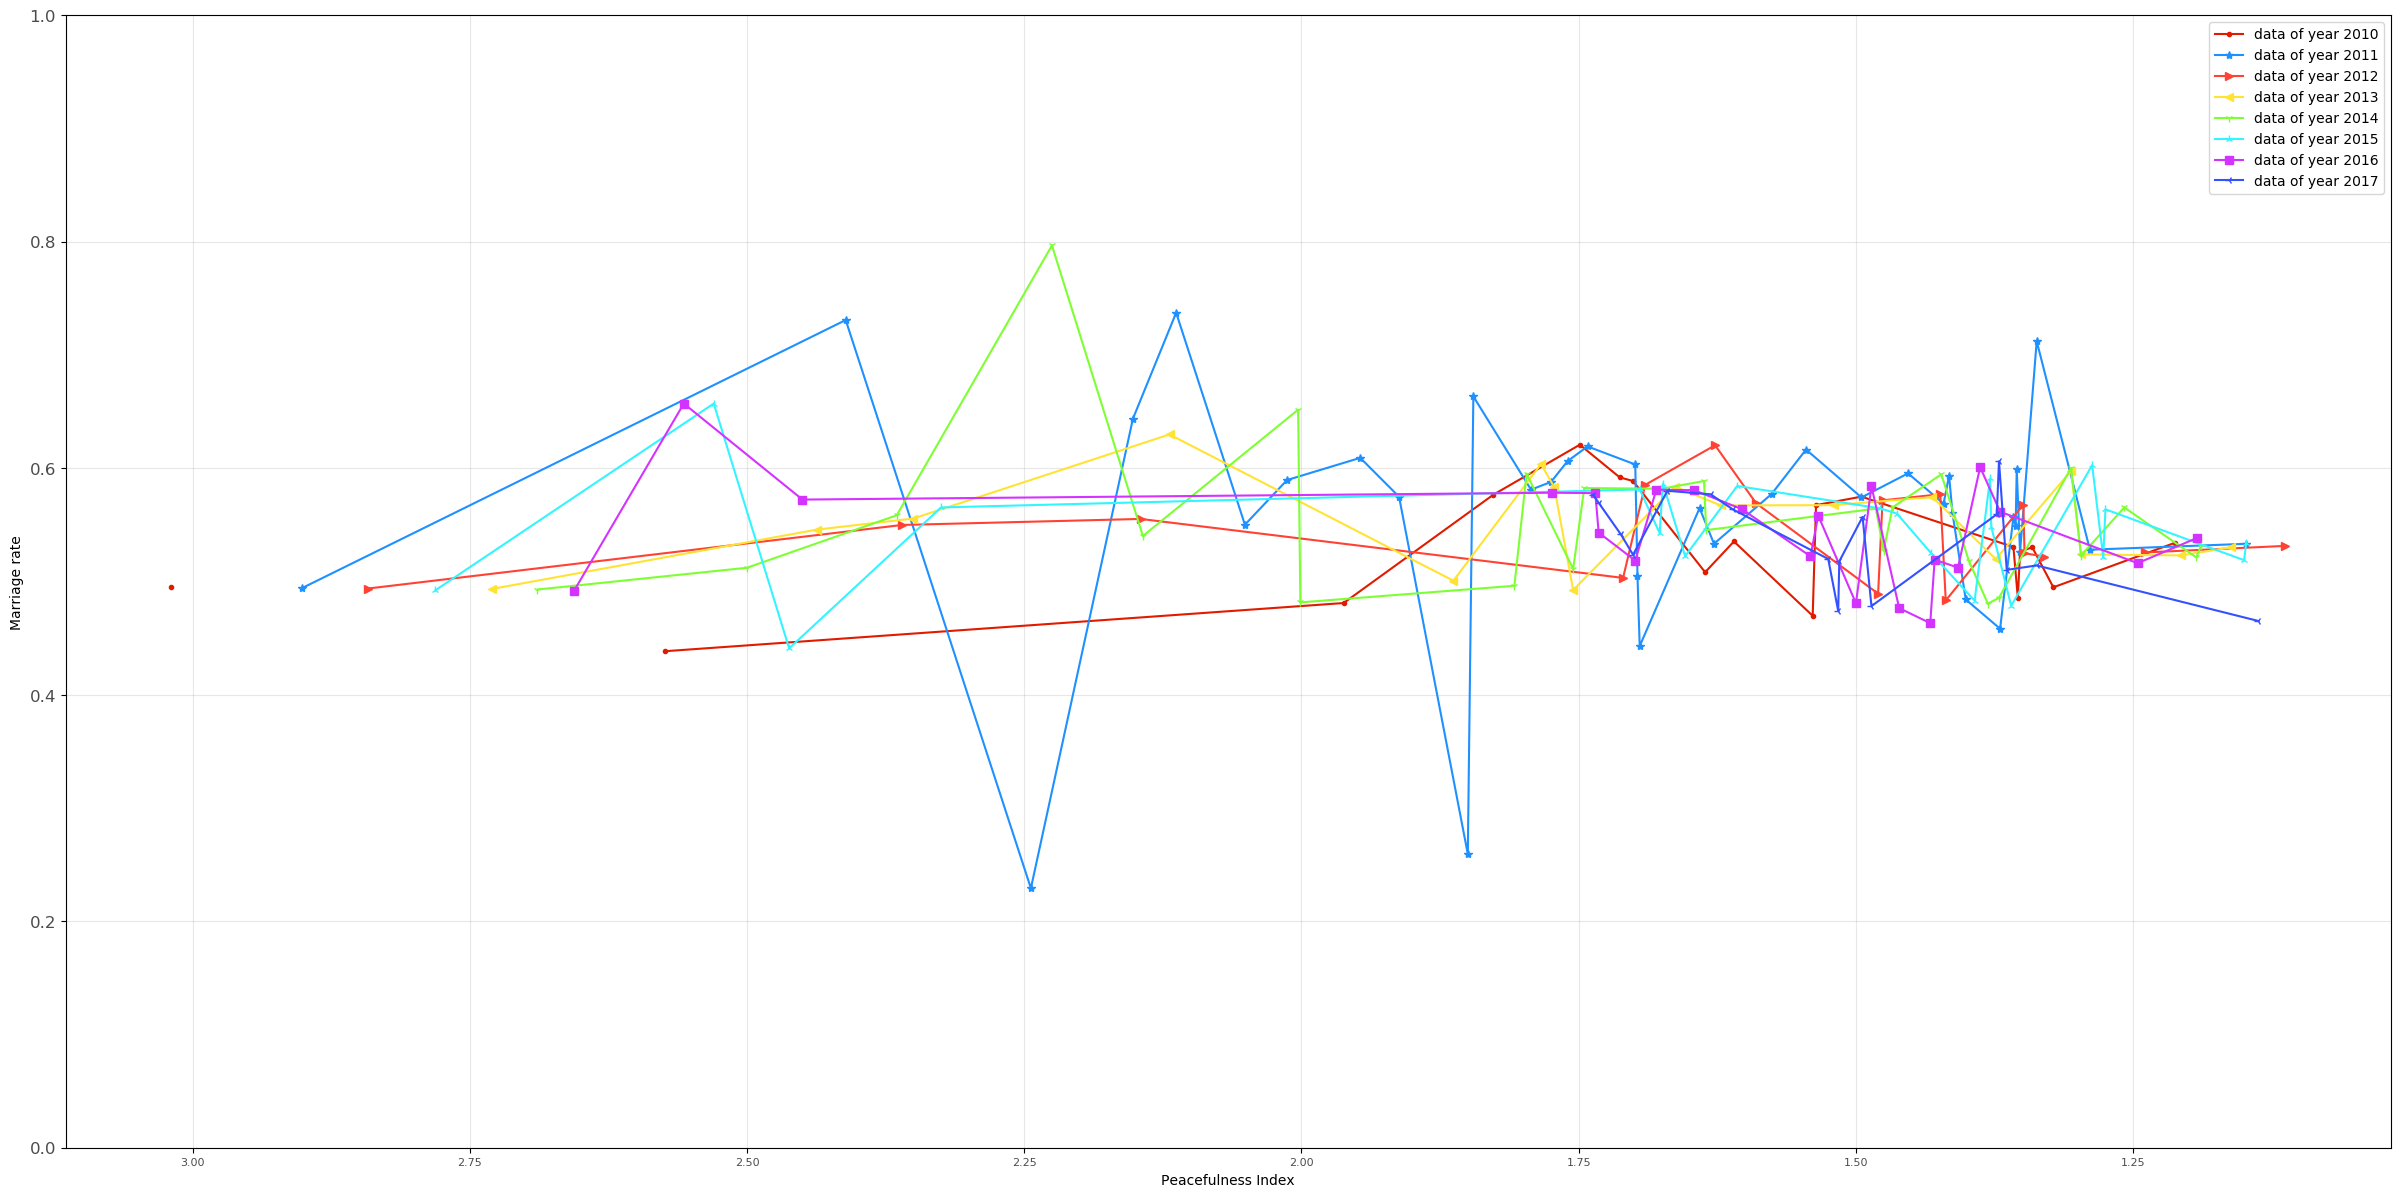

In [227]:
plot_level_2(x_list_level2, y_list_level2)

## Part 2-2: Analysis of level 2-3, Safety-Belonging 
Peace Index and Happiness data

In [216]:
happiness['2017.csv'] = happiness['2017.csv'][['Country','Happiness.Score']]
happiness['2017.csv'].columns = ['Country','Happiness Score']

In [217]:
def Analysis_peace_happiness_level(peace, happiness): 
    p_h_list = []
    for i in range(3):
        string2 = str(2015+i)+'.csv'
        df = happiness[string2][['Country','Happiness Score']]
        string = 'pi_'+str(2015+i)
        p1 = peace['Country']
        p2 = peace[string]   
        p = pd.concat([p1, p2],axis = 1)
        df_p_h = pd.merge(df, p, on = 'Country', how='inner')
        p_h_list.append(df_p_h)
    x_list = []
    y_list = []
    pi_list = ['pi_2015','pi_2016','pi_2017']
    for s in range(3):
        df = p_h_list[s]
        dd = df.sort_values(by=[pi_list[s]], ascending=True)
        x = np.asarray(dd[pi_list[s]])
        y = np.asarray(dd['Happiness Score'])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_y = np.delete(y,j)
                new_x = np.delete(x,j)        
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list, p_h_list

In [218]:
x_list_p_h, y_list_p_h, p_h_list = Analysis_peace_happiness_level(peace, happiness)

In [228]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_level_p_h(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    marker = ['.','*','>','<','1','2','s','3','4']
    color = ['#E11B00', '#1E90FF','#FFE333','#7EFF33','#33F4FF','#D433FF','#3351FF','#D433FF']
    pi_list = ['pi_2015','pi_2016','pi_2017']
    for f in range(3):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+pi_list[f][-4:], marker = marker[f],color = color[f])
    plt.xlabel('Peacefulness Index')
    plt.ylabel('Happiness Score')
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

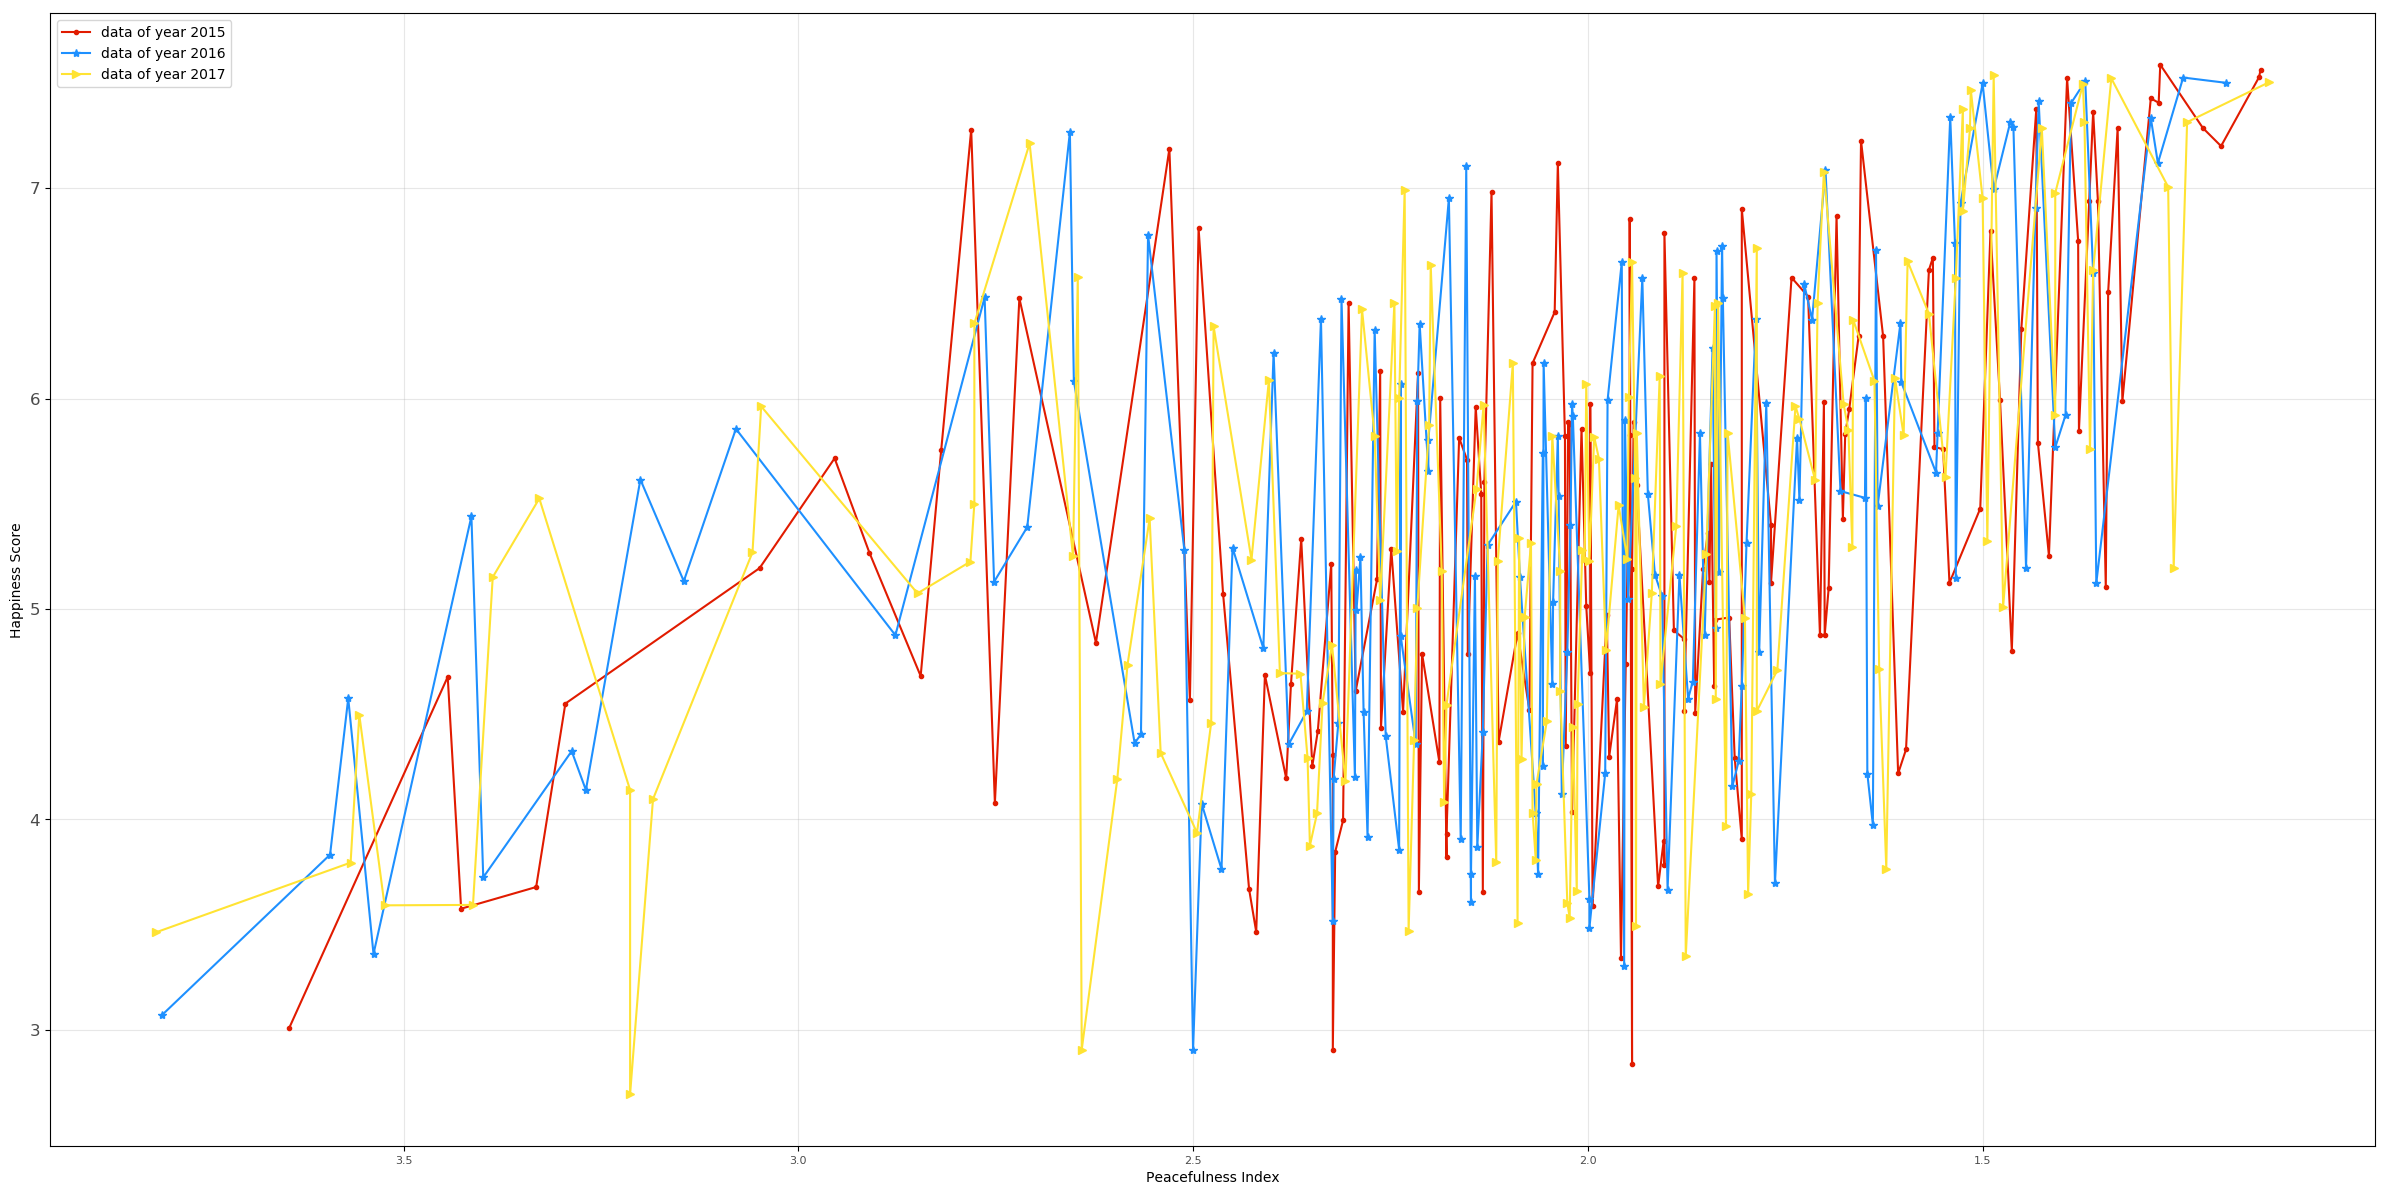

In [229]:
plot_level_p_h(x_list_p_h, y_list_p_h)

In [236]:
import matplotlib.pyplot as plt
def plot_cat_ph(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    pi_list = ['pi_2015','pi_2016','pi_2017']
    x_item = ['[1,1.25)','[1.25,1.5)','[1.5,1.75)','[1.75,2)','[2,2.25)','[2.25,2.5)',
              '[2.5,2.75)','[2.75,3)','[3,3,5)','3.5+']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((10,2))
        for b in range(len(cc)):
            if cc[b] >= 1 and cc[b]<1.25:
                y_item[0][0] += cy[b]
                y_item[0][1] += 1
            if cc[b] >= 1.25 and cc[b]<1.5:
                y_item[1][0] += cy[b]
                y_item[1][1] += 1
            if cc[b] >= 1.5 and cc[b]<1.75:
                y_item[2][0] += cy[b]
                y_item[2][1] += 1
            if cc[b] >= 1.75 and cc[b]<2:
                y_item[3][0] += cy[b]
                y_item[3][1] += 1
            if cc[b] >= 2 and cc[b]<2.25:
                y_item[4][0] += cy[b]
                y_item[4][1] += 1
            if cc[b] >= 2.25 and cc[b]<2.5:
                y_item[5][0] += cy[b]
                y_item[5][1] += 1
            if cc[b] >= 2.5 and cc[b]<2.75:
                y_item[6][0] += cy[b]
                y_item[6][1] += 1
            if cc[b] >= 2.75 and cc[b]<3:
                y_item[7][0] += cy[b]
                y_item[7][1] += 1
            if cc[b] >= 3 and cc[b]<3.5:
                y_item[8][0] += cy[b]
                y_item[8][1] += 1
            if cc[b] >= 3.5:
                y_item[9][0] += cy[b]
                y_item[9][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+pi_list[s][1][-4:], marker = marker[s],color = color[s])
    plt.xlabel('Peacefulness Index')
    plt.ylabel('Happiness Score')
    #plt.ylim(1.6,2.8)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

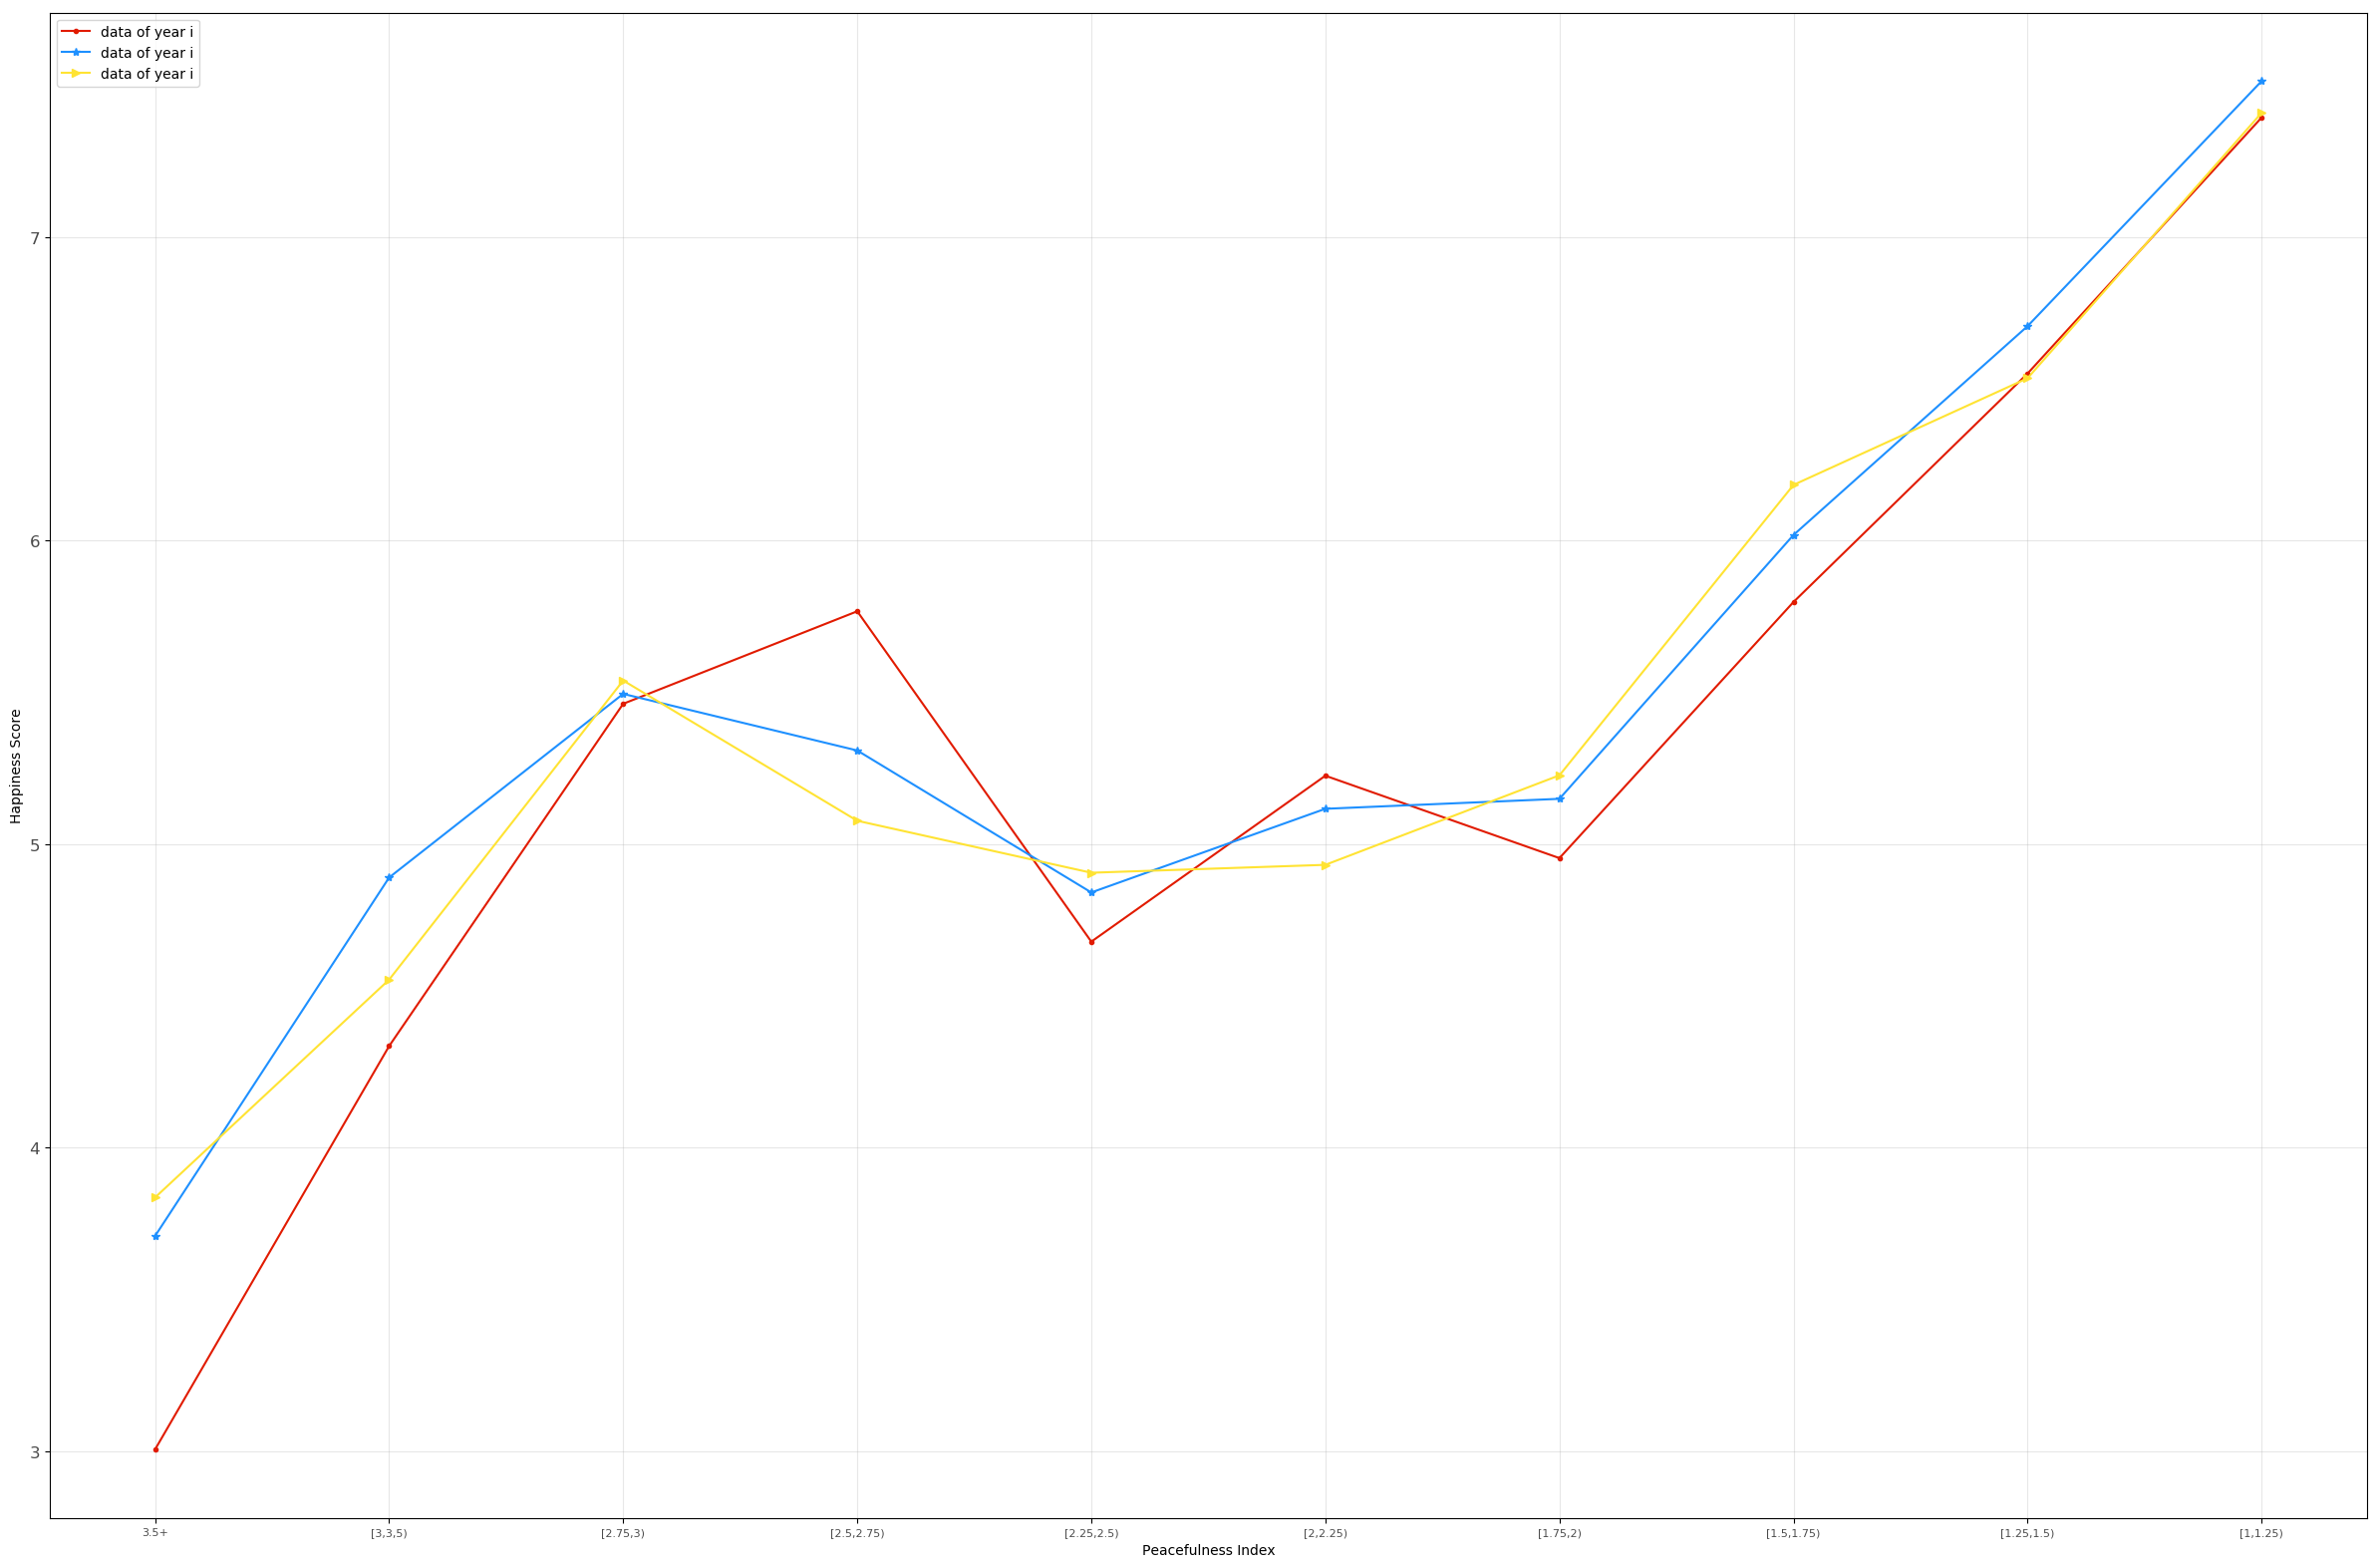

In [237]:
plot_cat_ph(x_list_p_h, y_list_p_h)

In [246]:
import seaborn as sns
def Box_plot_level_ph(p_h_list):
    fig, axes = plt.subplots(2,2, figsize=(50,40))
    item = [['pi_2015','Happiness Score'],['pi_2016','Happiness Score'],['pi_2017','Happiness Score']]
   # ax_list = [[0,0],[1,0],[2,0]]
    for s in range(3):
        cat_list = []
        data = p_h_list[s]
        cc = data[item[s][0]]
        for b in range(data.iloc[:,0].size):
            if math.isnan(cc[b]) == True:
                cat_list.append(math.nan)
            if cc[b] >= 1 and cc[b]<1.25:
                cat_list.append('[1,1.25)')
            if cc[b] >= 1.25 and cc[b]<1.5:
                cat_list.append('[1.25,1.5)')
            if cc[b] >= 1.5 and cc[b]<1.75:
                cat_list.append('[1.5,1.75)')
            if cc[b] >= 1.75 and cc[b]<2:
                cat_list.append('[1.75,2)')
            if cc[b] >= 2 and cc[b]<2.25:
                cat_list.append('[2,2.25)')
            if cc[b] >= 2.25 and cc[b]<2.5:
                cat_list.append('[2.25,2.5)')
            if cc[b] >= 2.5 and cc[b]<2.75:
                cat_list.append('[2.5,2.75)')
            if cc[b] >= 2.75 and cc[b]<3:
                cat_list.append('[2.75,3)')
            if cc[b] >= 3 and cc[b]<3.5:
                cat_list.append('[3,3.5)')
            if cc[b] >= 3.5:
                cat_list.append('3.5+')
        cat_col = pd.DataFrame(cat_list)
        new_data = pd.concat([data,cat_col],axis=1)
        new_data.columns = ['Country', item[s][1], item[s][0], 'Catergory of Peace Index']
        box = sns.boxplot(x=item[s][1], y='Catergory of Peace Index', data=new_data, whis="range", palette="vlag",
                          ax=axes[s // 2, s % 2], 
                          order=['[1,1.25)', '[1.25,1.5)','[1.5,1.75)','[1.75,2)',
                                 '[2,2.25)','[2.25,2.5)','[2.5,2.75)','[2.75,3)','[3,3.5)','3.5+'])
        #rescale boxplot x-axis with log
        axes[s // 2, s % 2].set_title('Box Plot for Data of year '+ item[s][1][-4:])

        fig.subplots_adjust(wspace=.4)

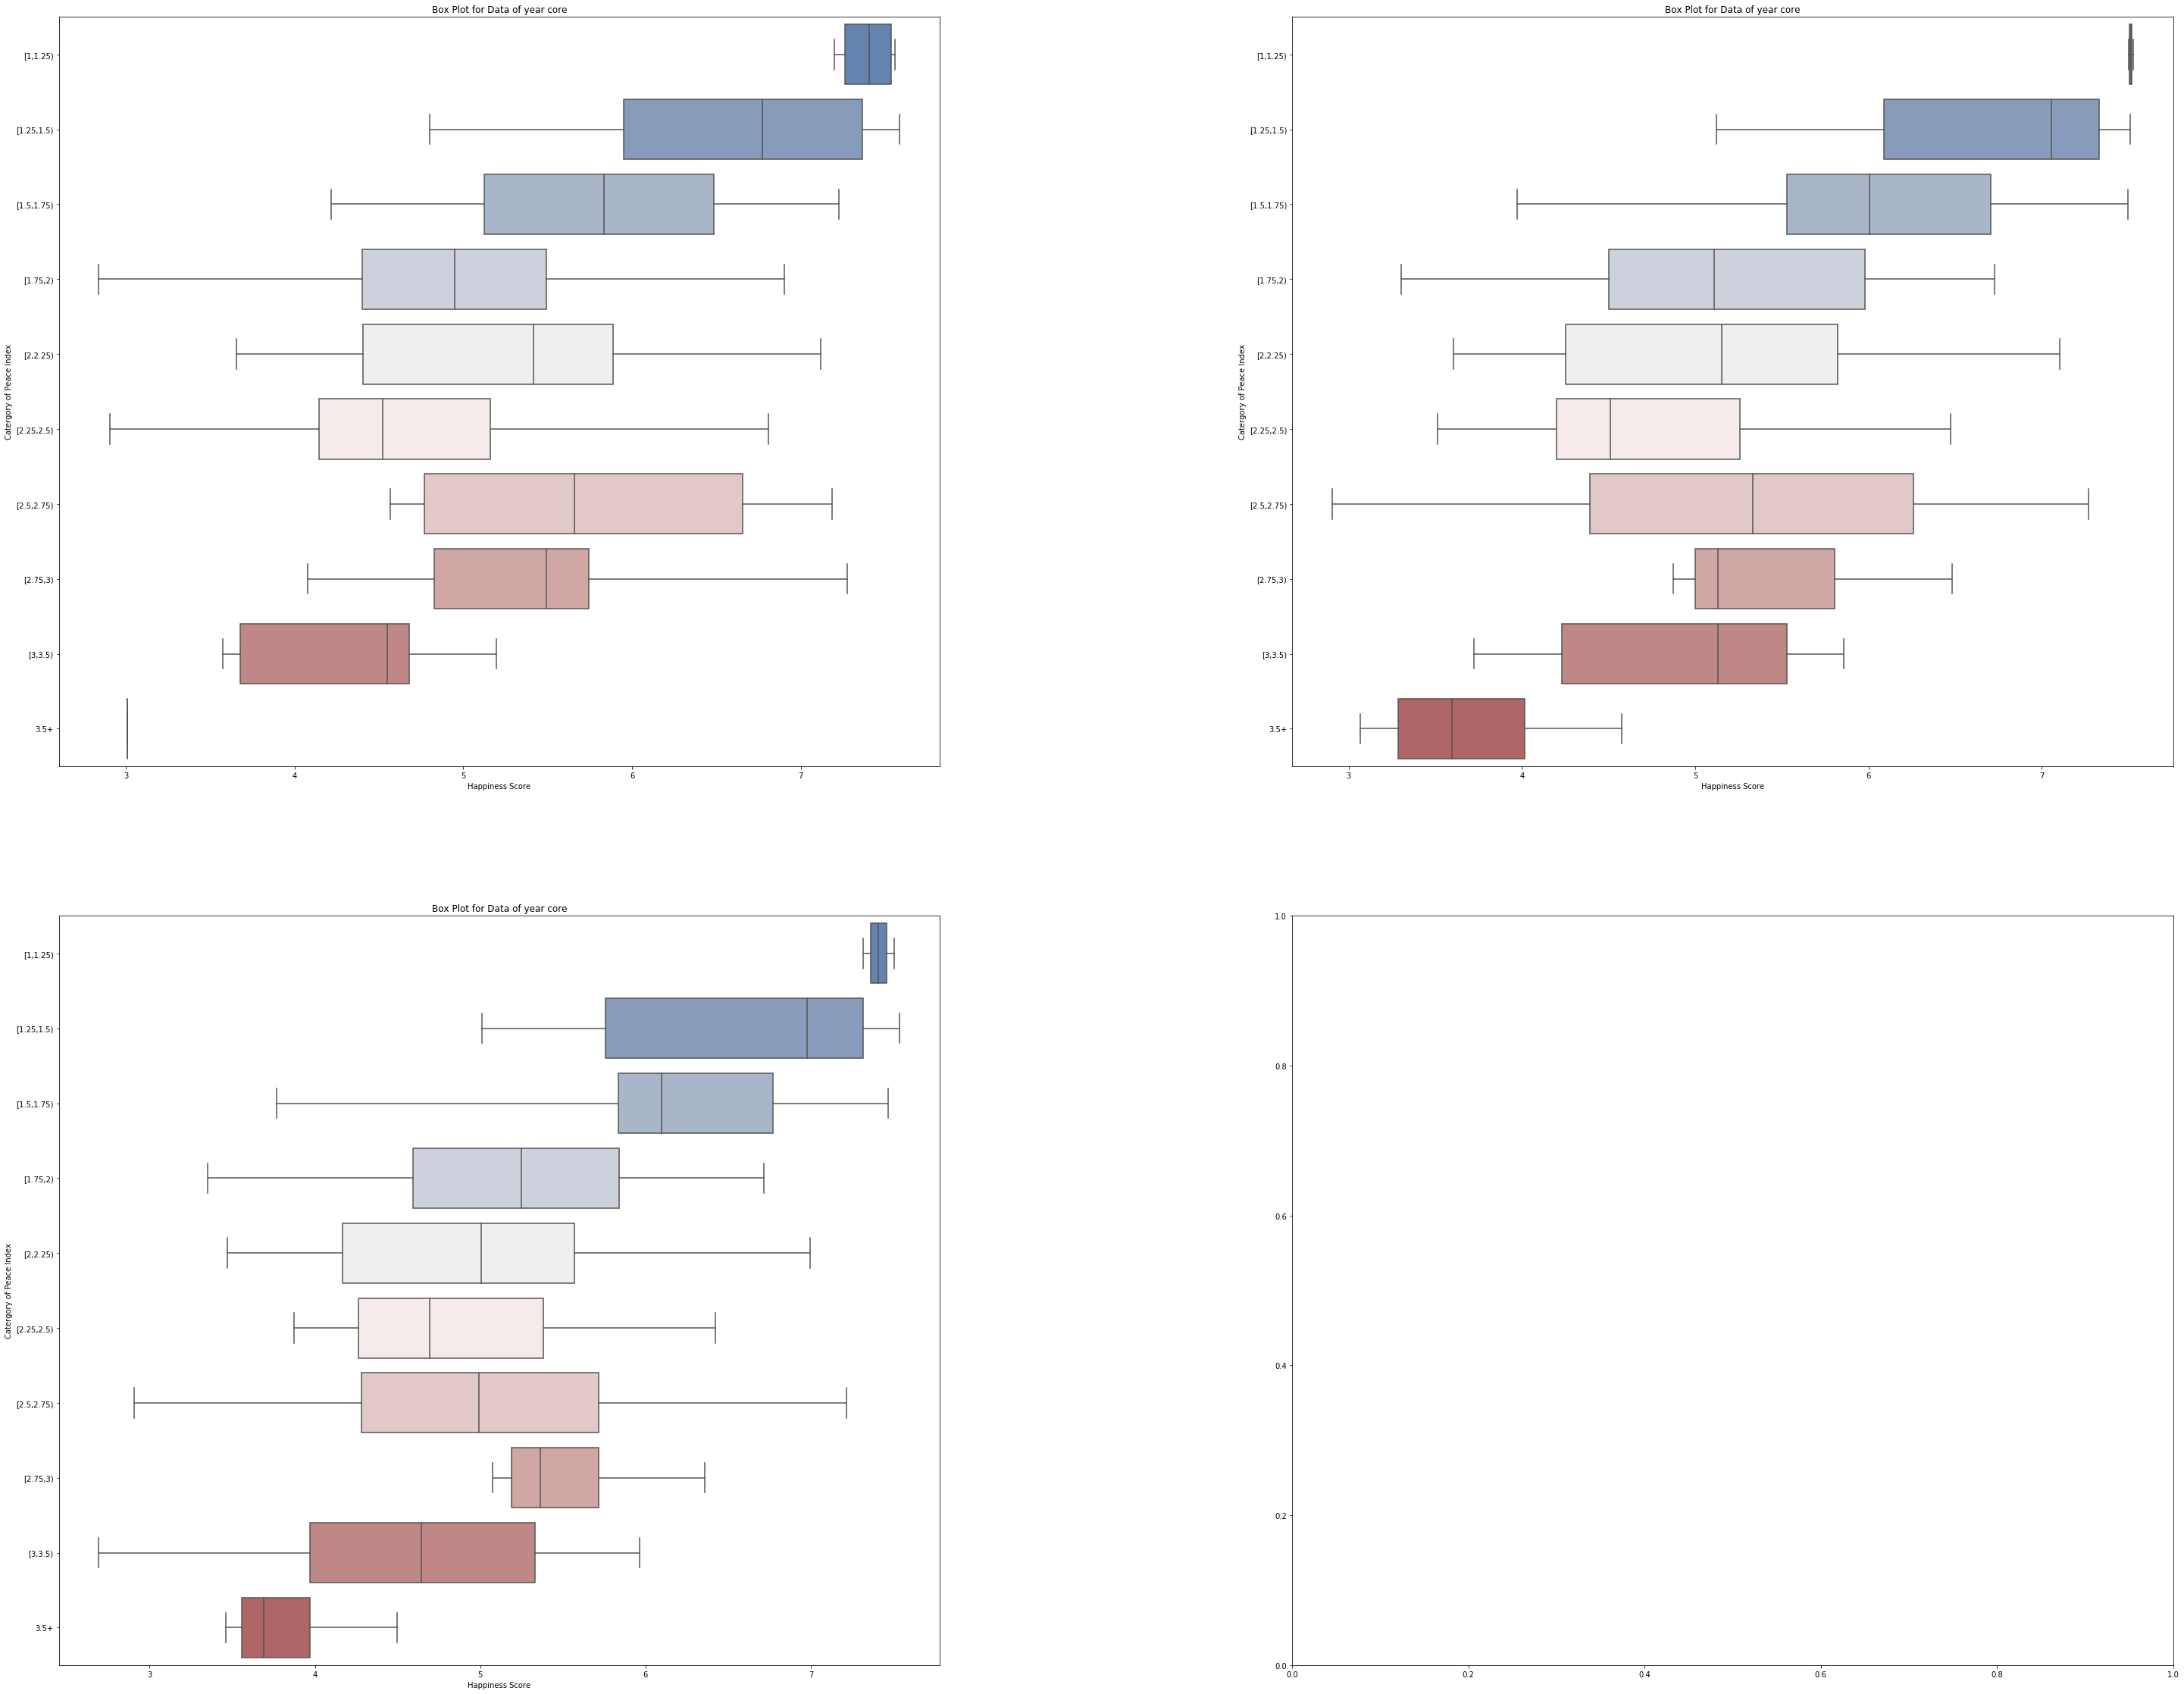

In [247]:
Box_plot_level_ph(p_h_list)

## Part 4: Analysis of level 2-4, Safety-Esteem 
by peace and freedom dataset

In [44]:
df_free = pd.concat([freedom['year'],freedom['countries'],freedom['hf_score']],axis=1)
df_free.columns = ['Year','Country','Human_Freedom_Score']

In [63]:
def Analysis_two_fourth_level(peace, df_free): 
    level24_list = []
    for i in range(6):
        df = df_free[df_free['Year']==(2010+i)]
        string = 'pi_'+str(2010+i)
        p1 = peace['Country']
        p2 = peace[string]   
        p = pd.concat([p1, p2],axis = 1)
        df_level24 = pd.merge(df, p, on = 'Country', how='inner')
        df_level24 = df_level24.drop_duplicates(keep='first', inplace=False)
        level24_list.append(df_level24)
    x_list = []
    y_list = []
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016']
    for s in range(6):
        df = level24_list[s]
        dd = df.sort_values(by=[pi_list[s]], ascending=True)
        x = np.asarray(dd[pi_list[s]])
        y = np.asarray(dd['Human_Freedom_Score'])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_y = np.delete(y,j)
                new_x = np.delete(x,j)        
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list, level24_list

In [64]:
x_list_level24, y_list_level24, level24_list = Analysis_two_fourth_level(peace, df_free)

In [67]:
level24_list[0].head(20)

Year                 Country  Human_Freedom_Score  pi_2010
0   2010                 Albania             7.553625    1.925
1   2010                 Algeria             5.139356    2.277
2   2010                  Angola             5.237695    2.057
3   2010               Argentina             6.885658    1.962
4   2010                 Armenia             7.488132    2.266
5   2010               Australia             8.642693    1.467
6   2010                 Austria             8.321524    1.290
7   2010              Azerbaijan             6.311328    2.367
8   2010                 Bahrain             6.895730    1.956
9   2010              Bangladesh             5.944205    2.058
10  2010                 Belarus                  NaN    2.204
11  2010                 Belgium             8.243992    1.400
12  2010                   Benin             6.414881      NaN
13  2010                  Bhutan                  NaN    1.665
14  2010                 Bolivia             6.867151    2.037
15  2010  Bosnia and Herzegovina             7.417273    1.873
16  2010                Botswana             6.909826    1.641
17  2010                  Brazil             7.114175    2.048
18  2010                Bulgaria             7.799513    1.785
19  2010            Burkina Faso             6.757070    1.852

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_level_24(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016']
    for f in range(6):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+pi_list[f][-4:], marker = marker[f],color = color[f])
    plt.xlabel('Peacefulness Index')
    plt.ylabel('Marriage rate')
    plt.ylim(4,9)
    plt.xlim(1,3.125)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

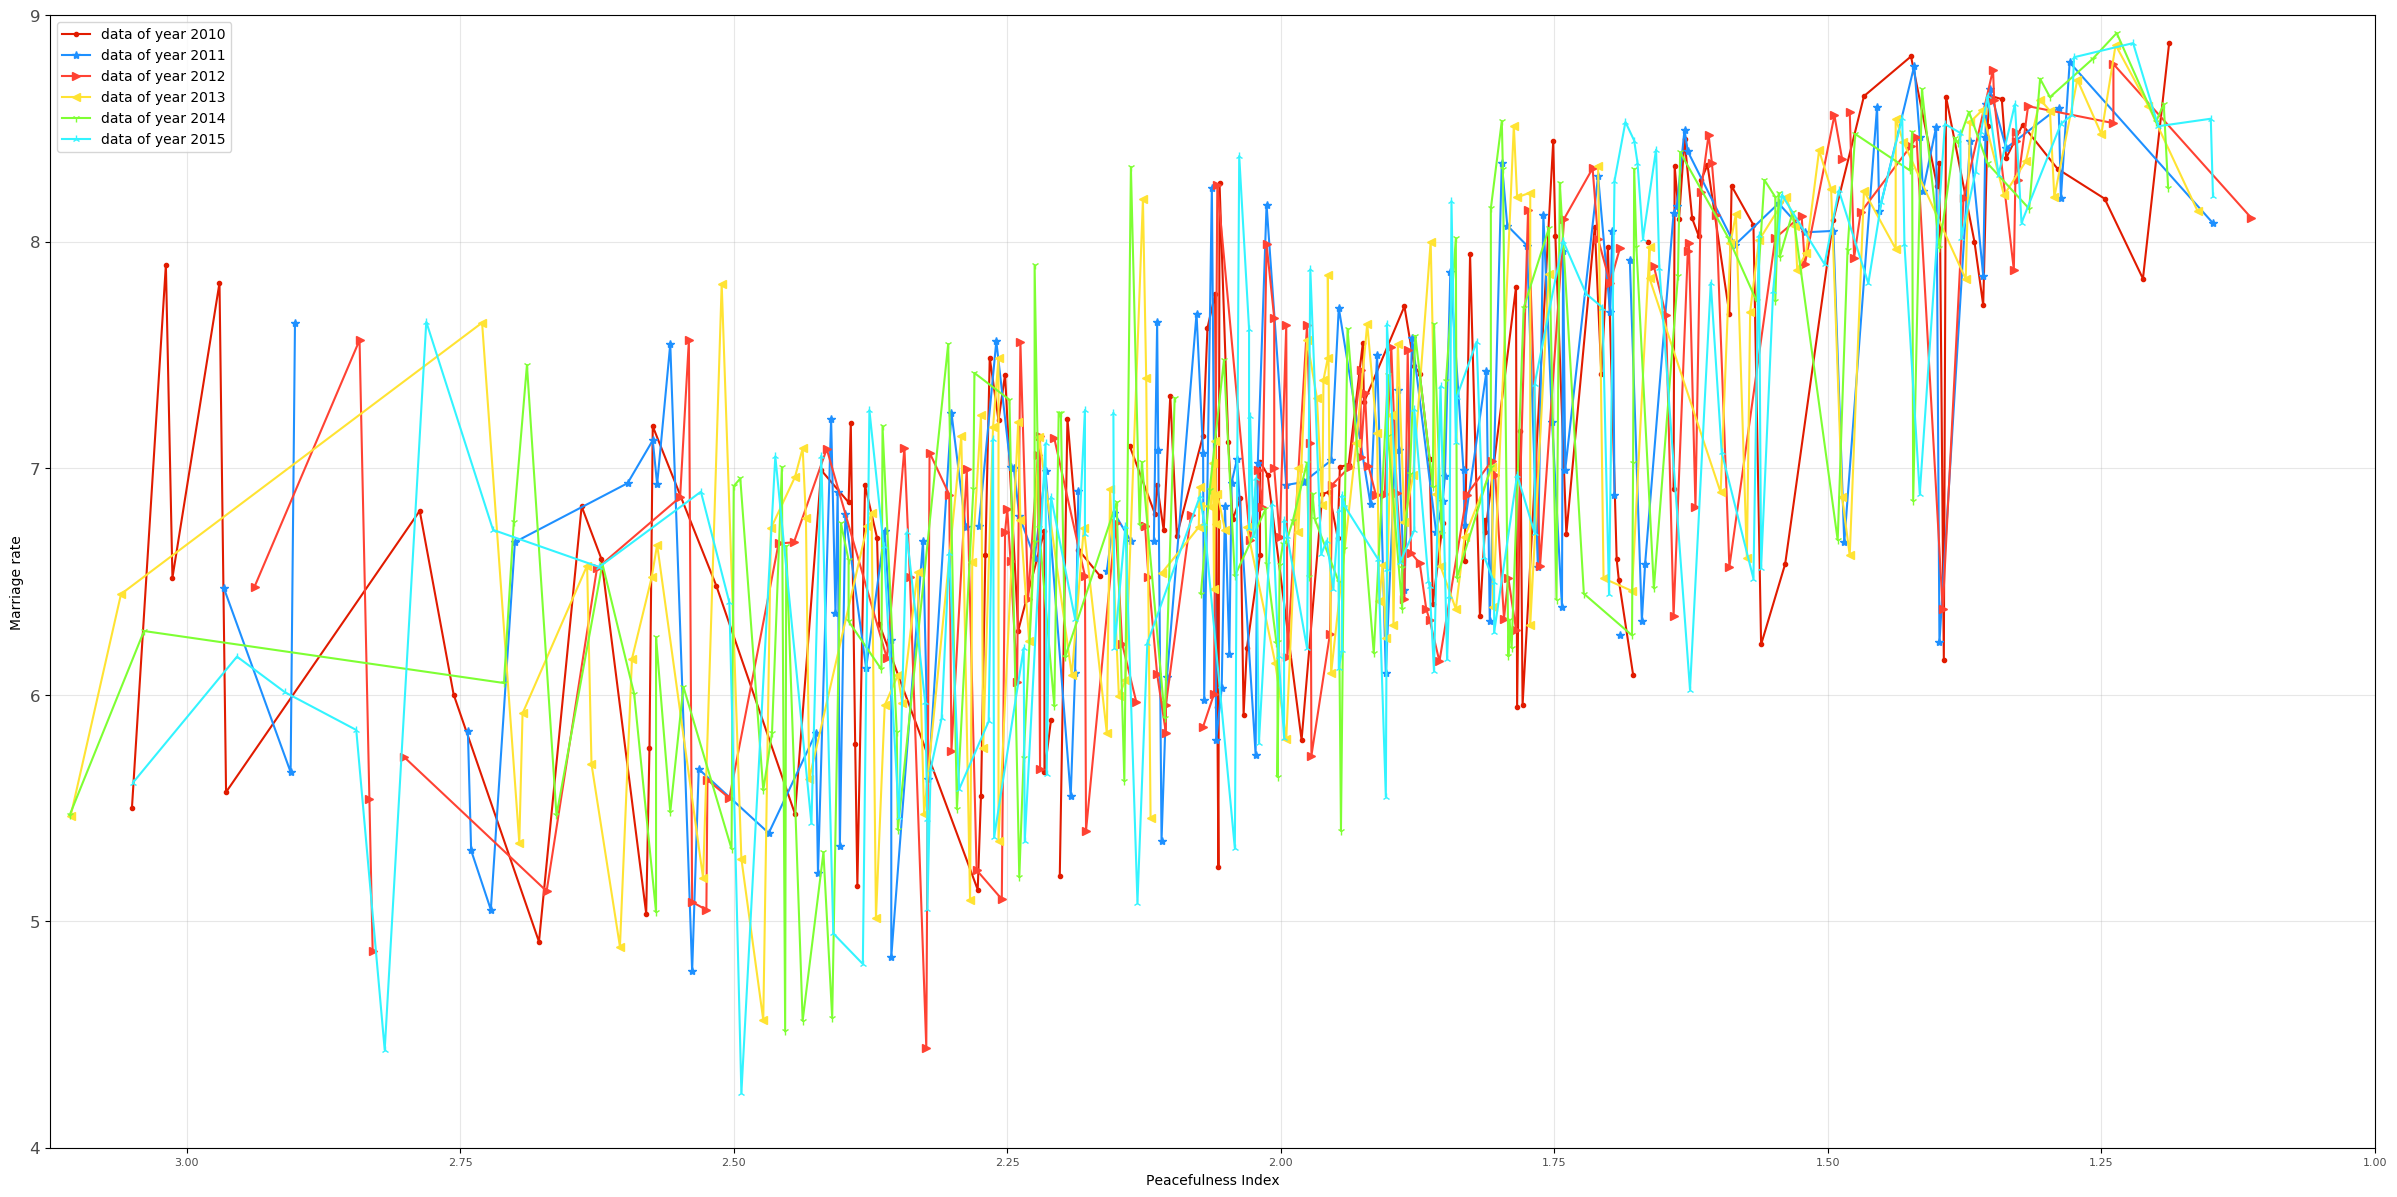

In [48]:
plot_level_24(x_list_level24, y_list_level24)

In [230]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_cat24(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016']
    x_item = ['[1,1.25)','[1.25,1.5)','[1.5,1.75)','[1.75,2)','[2,2.25)','[2.25,2.5)',
              '[2.5,2.75)','[2.75,3)','3+']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((9,2))
        for b in range(len(cc)):
            if cc[b] >= 1 and cc[b]<1.25:
                y_item[0][0] += cy[b]
                y_item[0][1] += 1
            if cc[b] >= 1.25 and cc[b]<1.5:
                y_item[1][0] += cy[b]
                y_item[1][1] += 1
            if cc[b] >= 1.5 and cc[b]<1.75:
                y_item[2][0] += cy[b]
                y_item[2][1] += 1
            if cc[b] >= 1.75 and cc[b]<2:
                y_item[3][0] += cy[b]
                y_item[3][1] += 1
            if cc[b] >= 2 and cc[b]<2.25:
                y_item[4][0] += cy[b]
                y_item[4][1] += 1
            if cc[b] >= 2.25 and cc[b]<2.5:
                y_item[5][0] += cy[b]
                y_item[5][1] += 1
            if cc[b] >= 2.5 and cc[b]<2.75:
                y_item[6][0] += cy[b]
                y_item[6][1] += 1
            if cc[b] >= 2.75 and cc[b]<3:
                y_item[7][0] += cy[b]
                y_item[7][1] += 1
            if cc[b] >= 3:
                y_item[8][0] += cy[b]
                y_item[8][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+pi_list[s][1][-4:], marker = marker[s],color = color[s])
    plt.xlabel('Peacefulness Index')
    plt.ylabel('Human Freedom Score')
    #plt.ylim(1.6,2.8)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

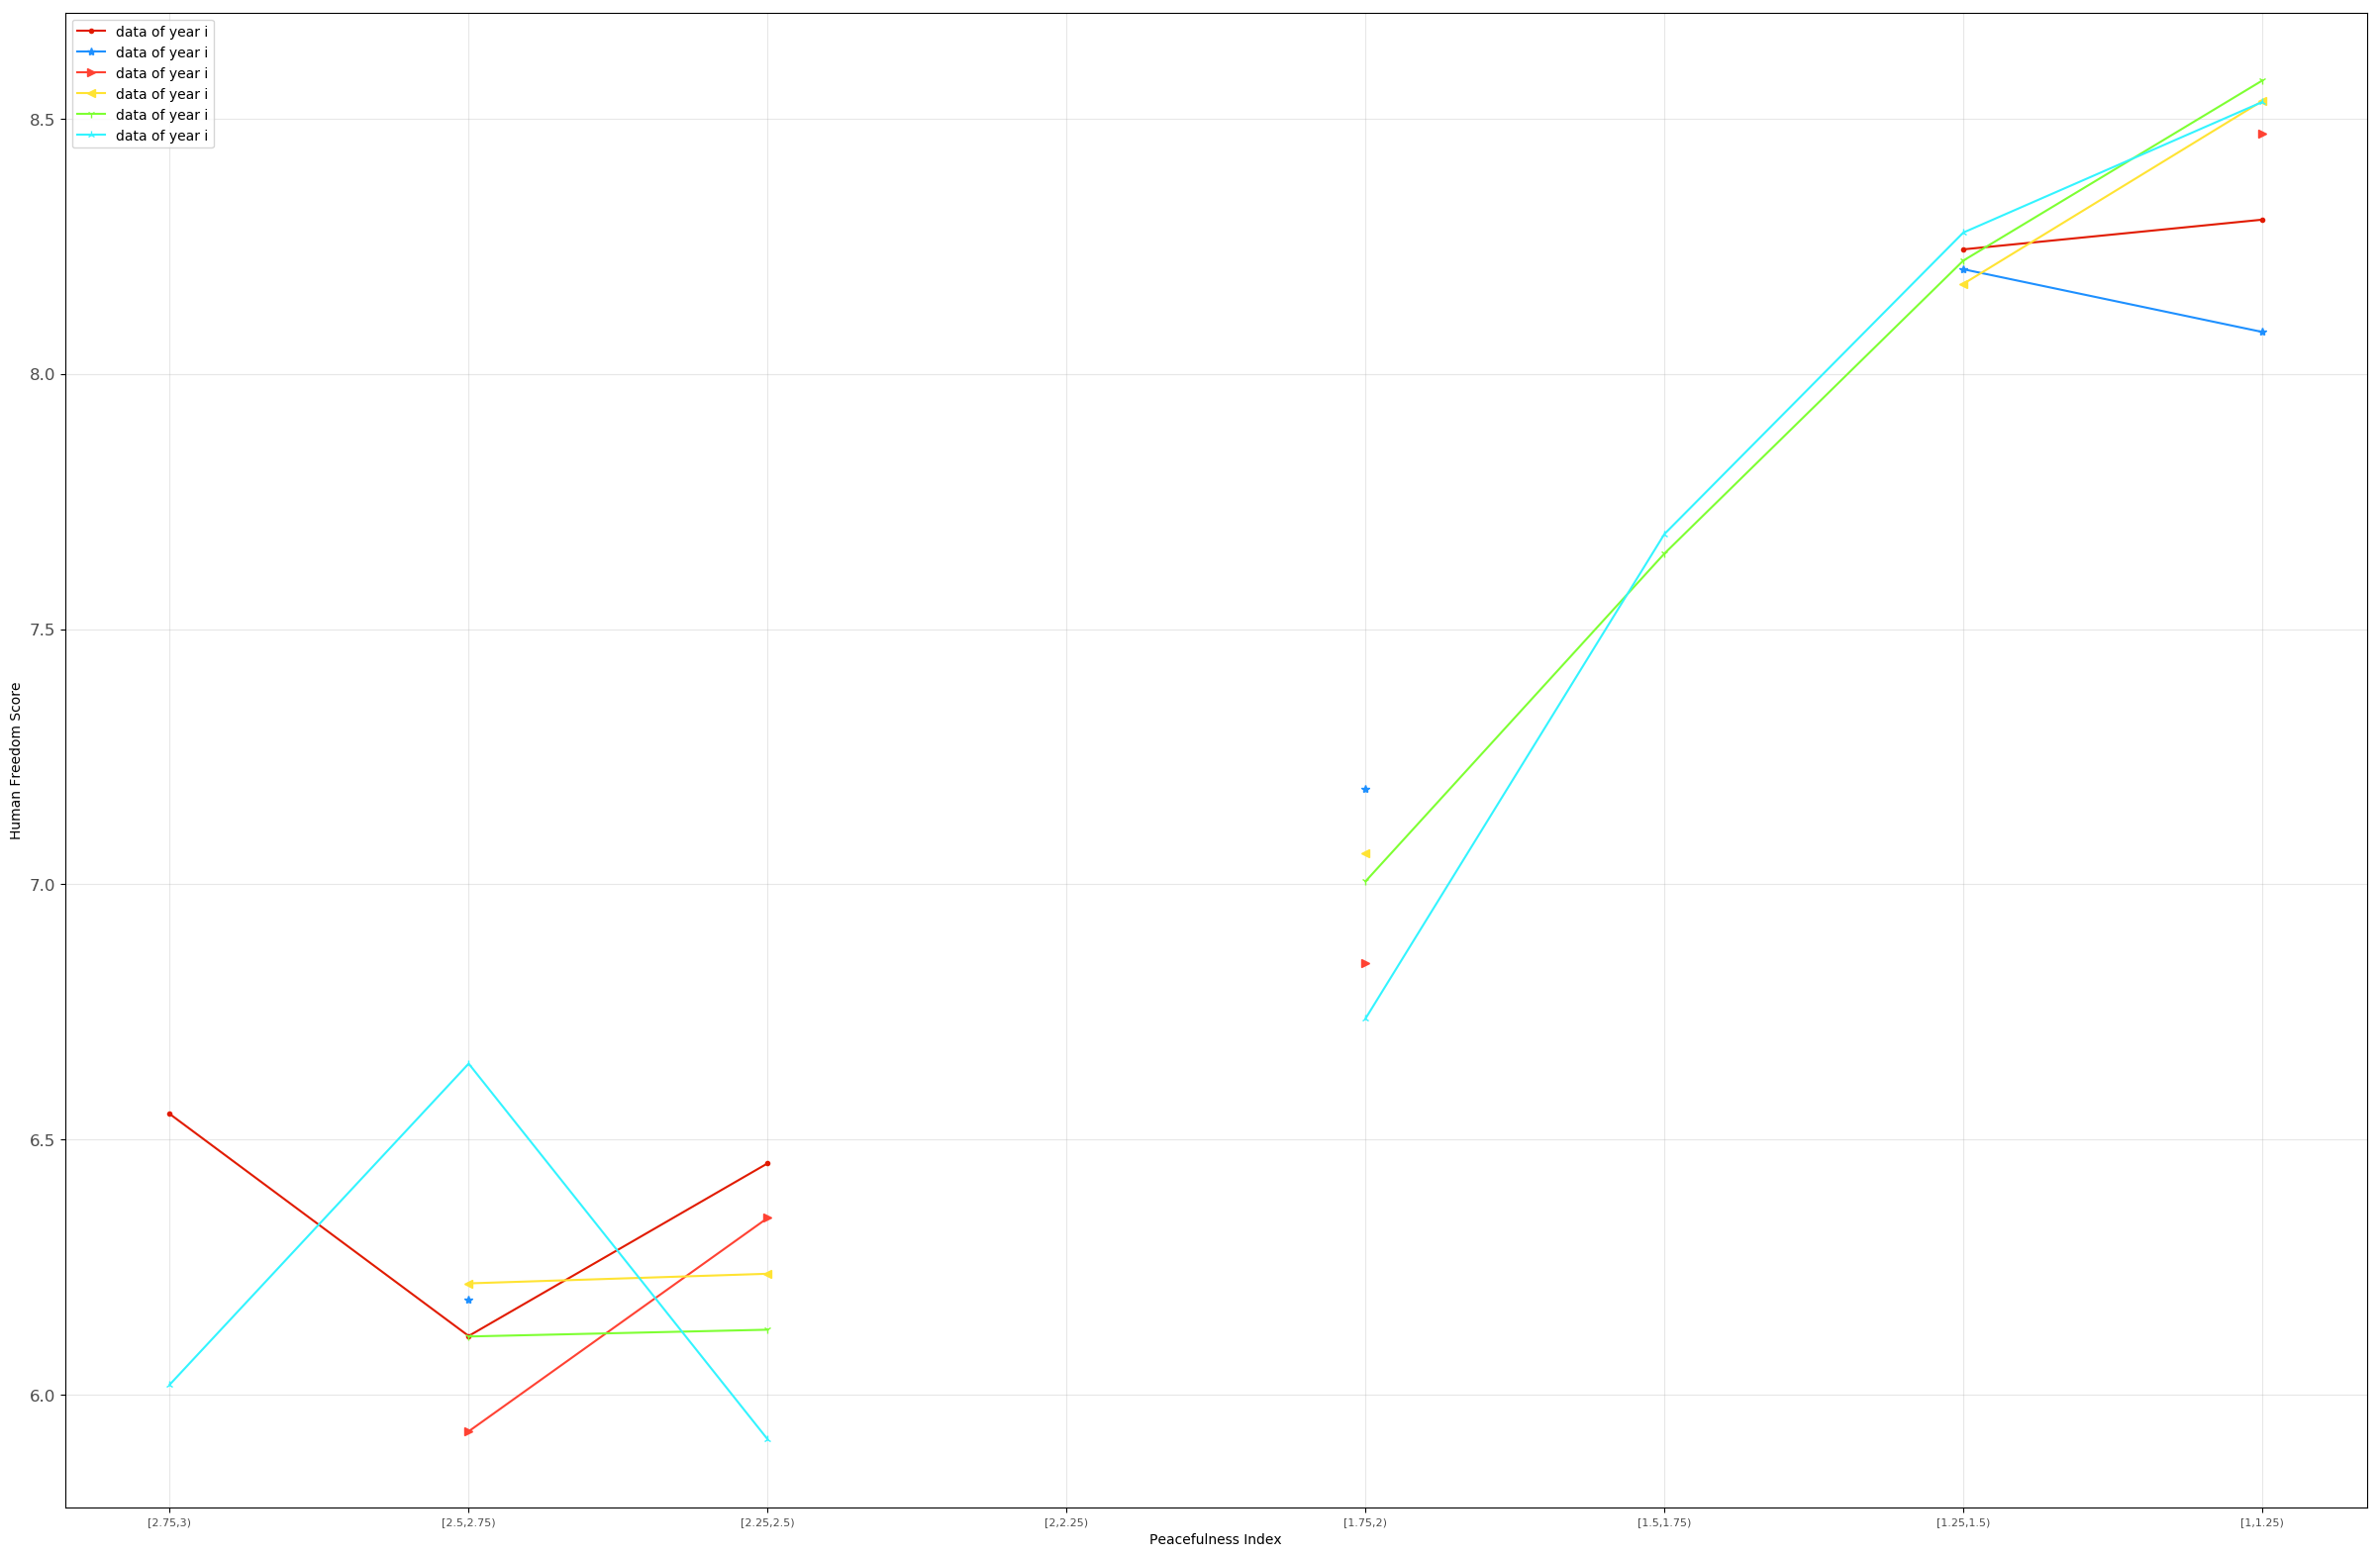

In [231]:
plot_cat24(x_list_level24, y_list_level24)

In [182]:
import seaborn as sns
def Box_plot_level24(level_list24):
    fig, axes = plt.subplots(3, 2, figsize=(50,40))
    item = [['Human_Freedom_Score','pi_2010'],['Human_Freedom_Score','pi_2011'],
                  ['Human_Freedom_Score','pi_2012'],['Human_Freedom_Score','pi_2013'],
                  ['Human_Freedom_Score','pi_2014'],['Human_Freedom_Score','pi_2015'],]
    ax_list = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1]]
    for s in range(6):
        cat_list = []
        data = level_list24[s]
        cc = data[item[s][1]]
        for b in range(data.iloc[:,0].size):
            if math.isnan(cc[b]) == True:
                cat_list.append(math.nan)
            if cc[b] >= 1 and cc[b]<1.25:
                cat_list.append('[1,1.25)')
            if cc[b] >= 1.25 and cc[b]<1.5:
                cat_list.append('[1.25,1.5)')
            if cc[b] >= 1.5 and cc[b]<1.75:
                cat_list.append('[1.5,1.75)')
            if cc[b] >= 1.75 and cc[b]<2:
                cat_list.append('[1.75,2)')
            if cc[b] >= 2 and cc[b]<2.25:
                cat_list.append('[2,2.25)')
            if cc[b] >= 2.25 and cc[b]<2.5:
                cat_list.append('[2.25,2.5)')
            if cc[b] >= 2.5 and cc[b]<2.75:
                cat_list.append('[2.5,2.75)')
            if cc[b] >= 2.75 and cc[b]<3:
                cat_list.append('[2.75,3)')
            if cc[b] >= 3 :
                cat_list.append('3+')
        cat_col = pd.DataFrame(cat_list)
        new_data = pd.concat([data,cat_col],axis=1)
        new_data.columns = ['Year', 'Country', item[s][0], item[s][1], 'Catergory of Peace Index']
        box = sns.boxplot(x=item[s][0], y='Catergory of Peace Index', data=new_data, whis="range", palette="vlag",
                          ax=axes[ax_list[s][0], ax_list[s][1]], 
                          order=['[1,1.25)', '[1.25,1.5)','[1.5,1.75)','[1.75,2)',
                                 '[2,2.25)','[2.25,2.5)','[2.5,2.75)','[2.75,3)','3+'])
        #rescale boxplot x-axis with log
        axes[ax_list[s][0], ax_list[s][1]].set_title('Box Plot for Data of year '+ item[s][1][-4:])

        fig.subplots_adjust(wspace=.4)

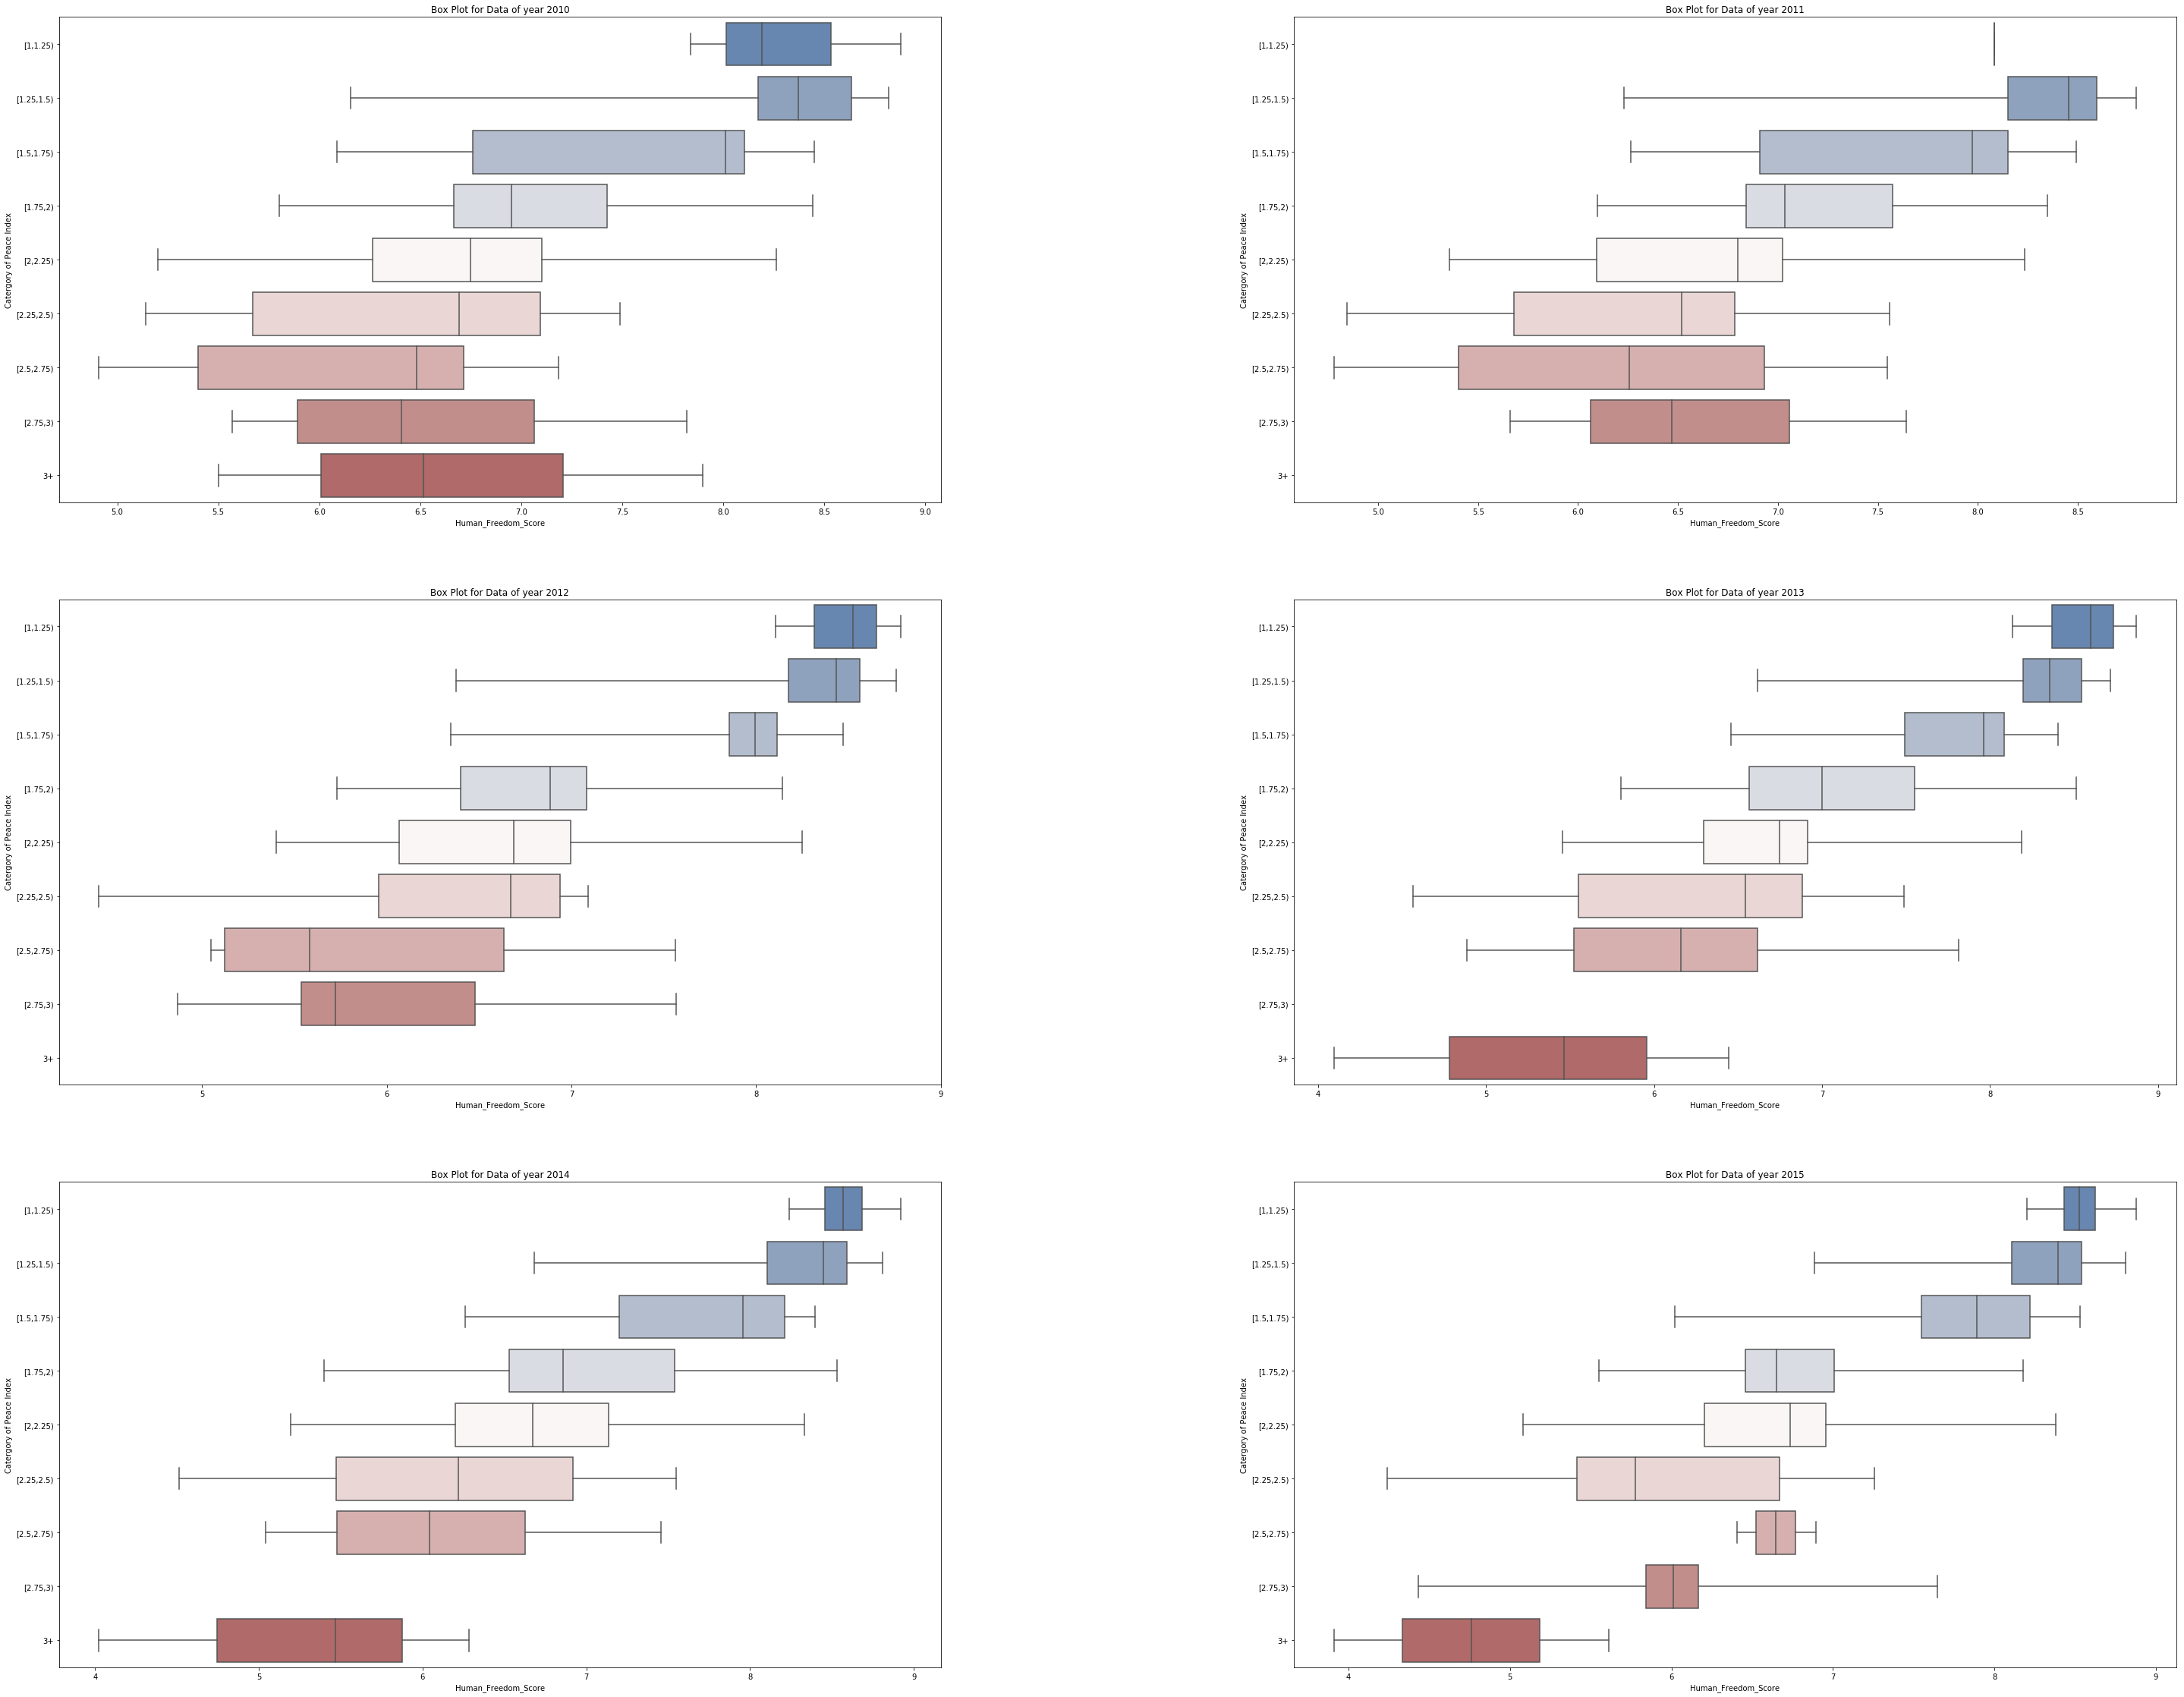

In [183]:
Box_plot_level24(level24_list)

## Part 5: Analysis of level 4-5, Esteem-Self Actualization 
by freedom and innovation dataset

In [82]:
free_list = PREP_DATA.freedom()

/Users/xy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/xy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/xy/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [83]:
inno_list = []
for i in range(6):
    df = GET_DATA.Innovation('Innovation-201%s.csv' %(i+3))
    df.rename({'Economy':'Country','Score': 'Score201%s' %(i+3)}, axis='columns', inplace=True)
    inno_list.append(df[['Country','Score201%s' %(i+3)]])

In [89]:
def Analysis_level45(inno_list, free_list): 
    level_45_list = []
    for i in range(4):
        df_level45 = pd.merge(inno_list[i], free_list[i], on = 'Country', how='inner')
        df_level45 = df_level45.drop_duplicates(keep='first', inplace=False)
        level_45_list.append(df_level45)
    x_list = []
    y_list = []
    item = ['Score2013', 'Score2014', 'Score2015', 'Score2016']
    for s in range(4):
        df = level_45_list[s]
        dd = df.sort_values(by='hf_score', ascending=True)
        x = np.asarray(dd['hf_score'])
        y = np.asarray(dd[item[s]])
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list, level_45_list

In [85]:
def plot45(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    item = ['Score2013', 'Score2014', 'Score2015', 'Score2016']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    for f in range(len(x_list)):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+item[f][-4:], marker = marker[f])#,color = color[f])
    plt.xlabel('Freedom Index')
    plt.ylabel('Innovation Index')
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()#prop={'size': 30})
    plt.show()

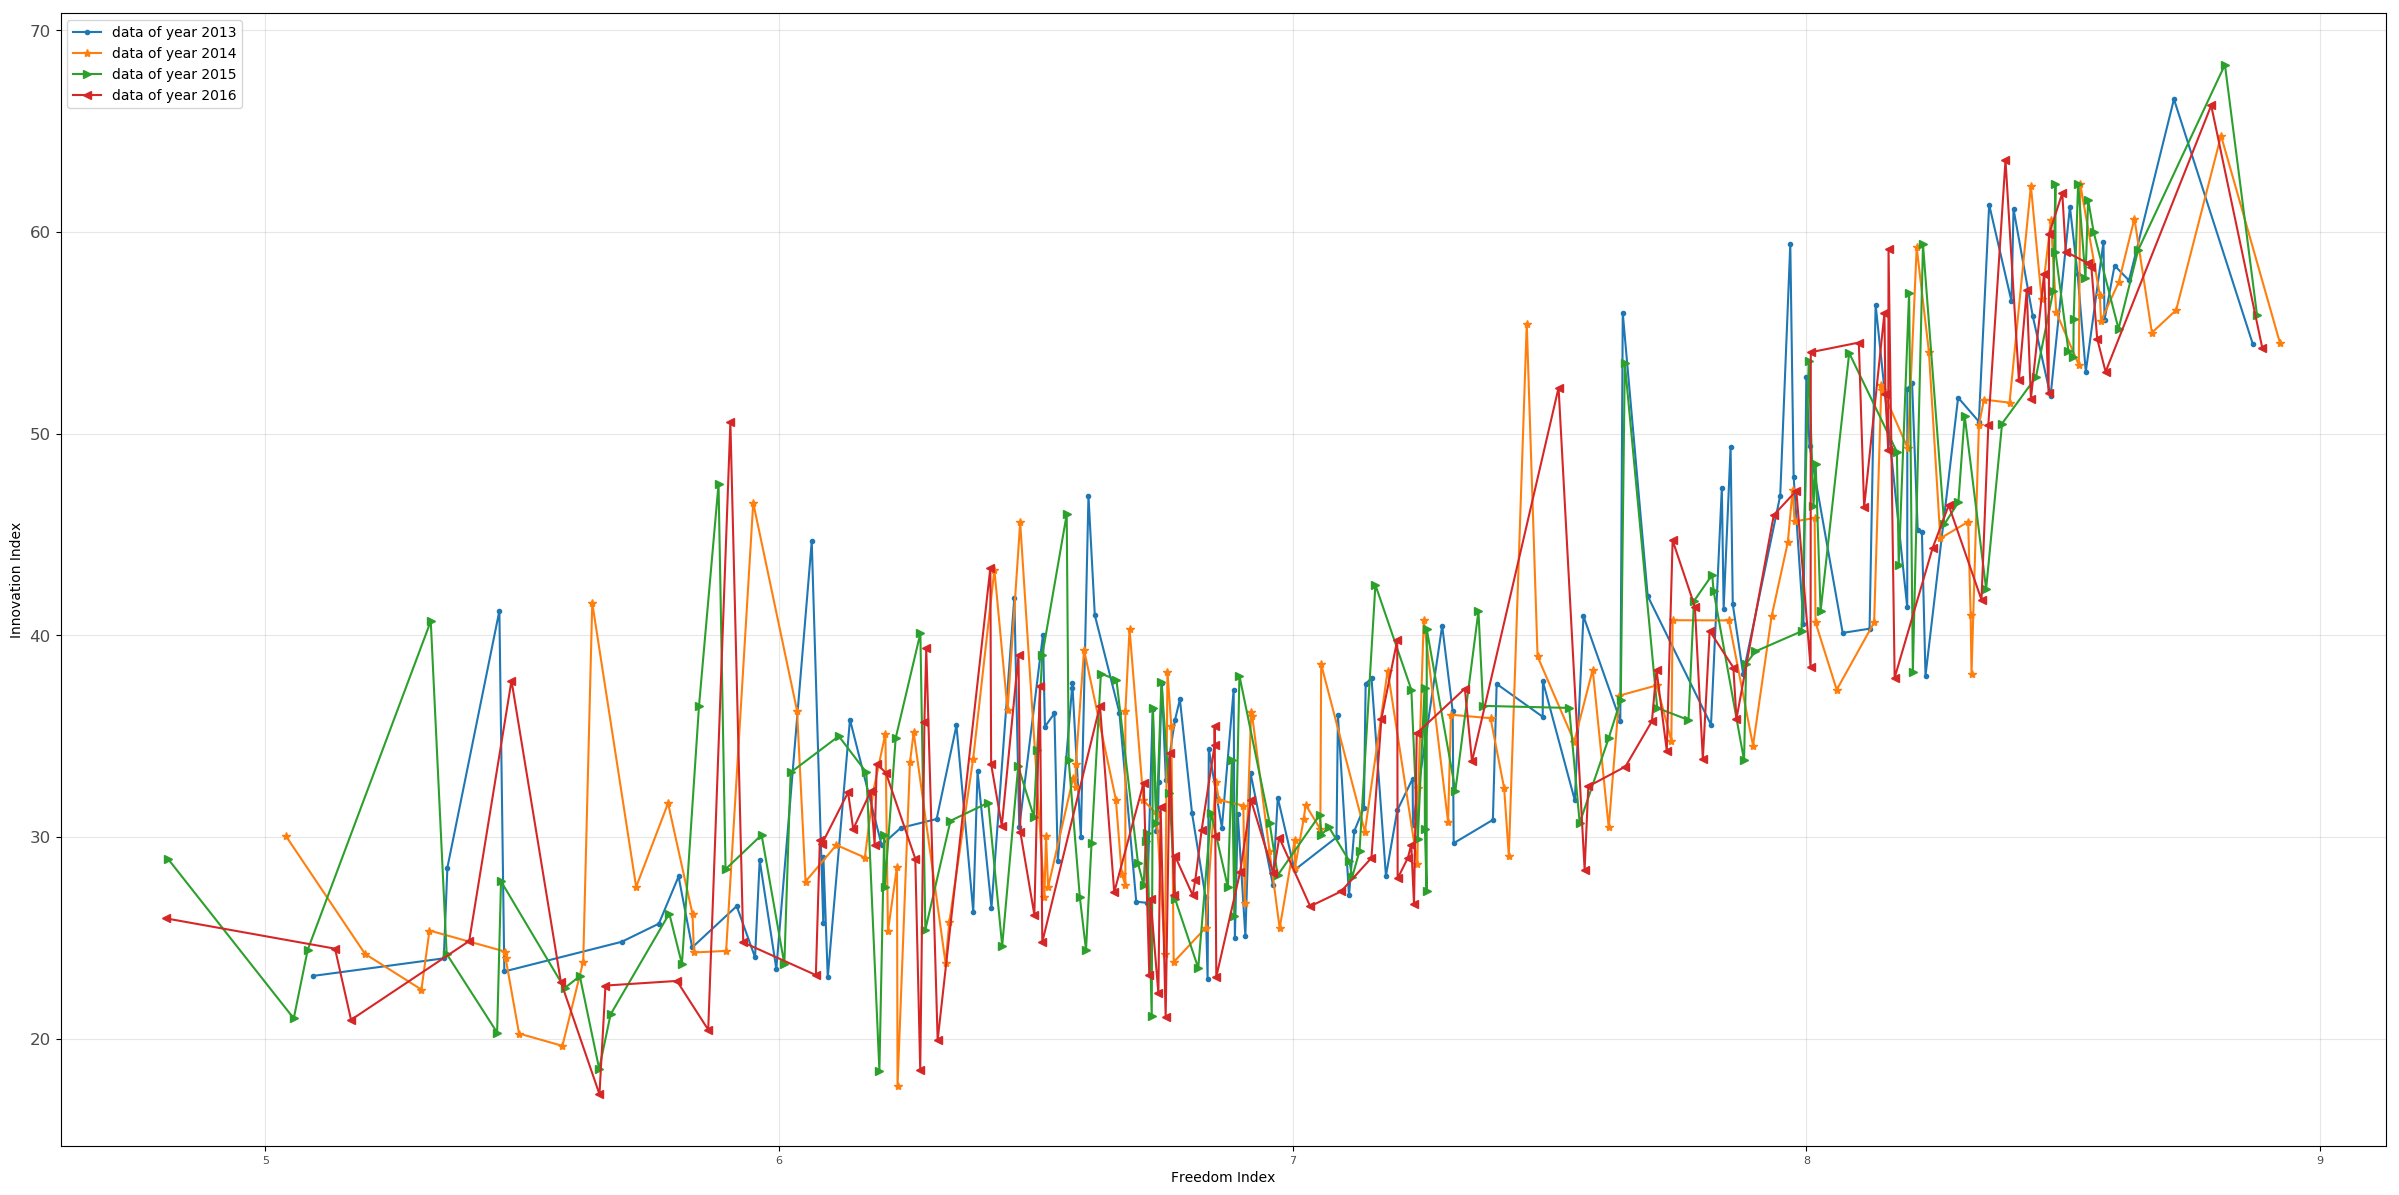

In [90]:
x_list_45, y_list_45, level_45_list = Analysis_level45(inno_list, free_list)
plot45(x_list_45, y_list_45)

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot45_cat(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    item = ['Score2013', 'Score2014', 'Score2015', 'Score2016']
    start = 4.5
    end = 9
    range_interval = 9
    interval = (end-start)/range_interval
    x_item = []
    for j in range(range_interval):
        x_item.append('[%s,%s)' %(start+(interval*j), start+(interval*(j+1))))
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((range_interval,2))
        for b in range(len(cc)):
            for k in range(10):
                if cc[b] >= (start+(interval*k)) and cc[b] < (start+(interval*(k+1))):
                    y_item[k][0] += cy[b]
                    y_item[k][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+item[s][-4:], marker = marker[s],color = color[s])
    plt.xlabel('Freedom Index')
    plt.ylabel('Innovation Index')
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()#prop={'size': 30})
    plt.show()

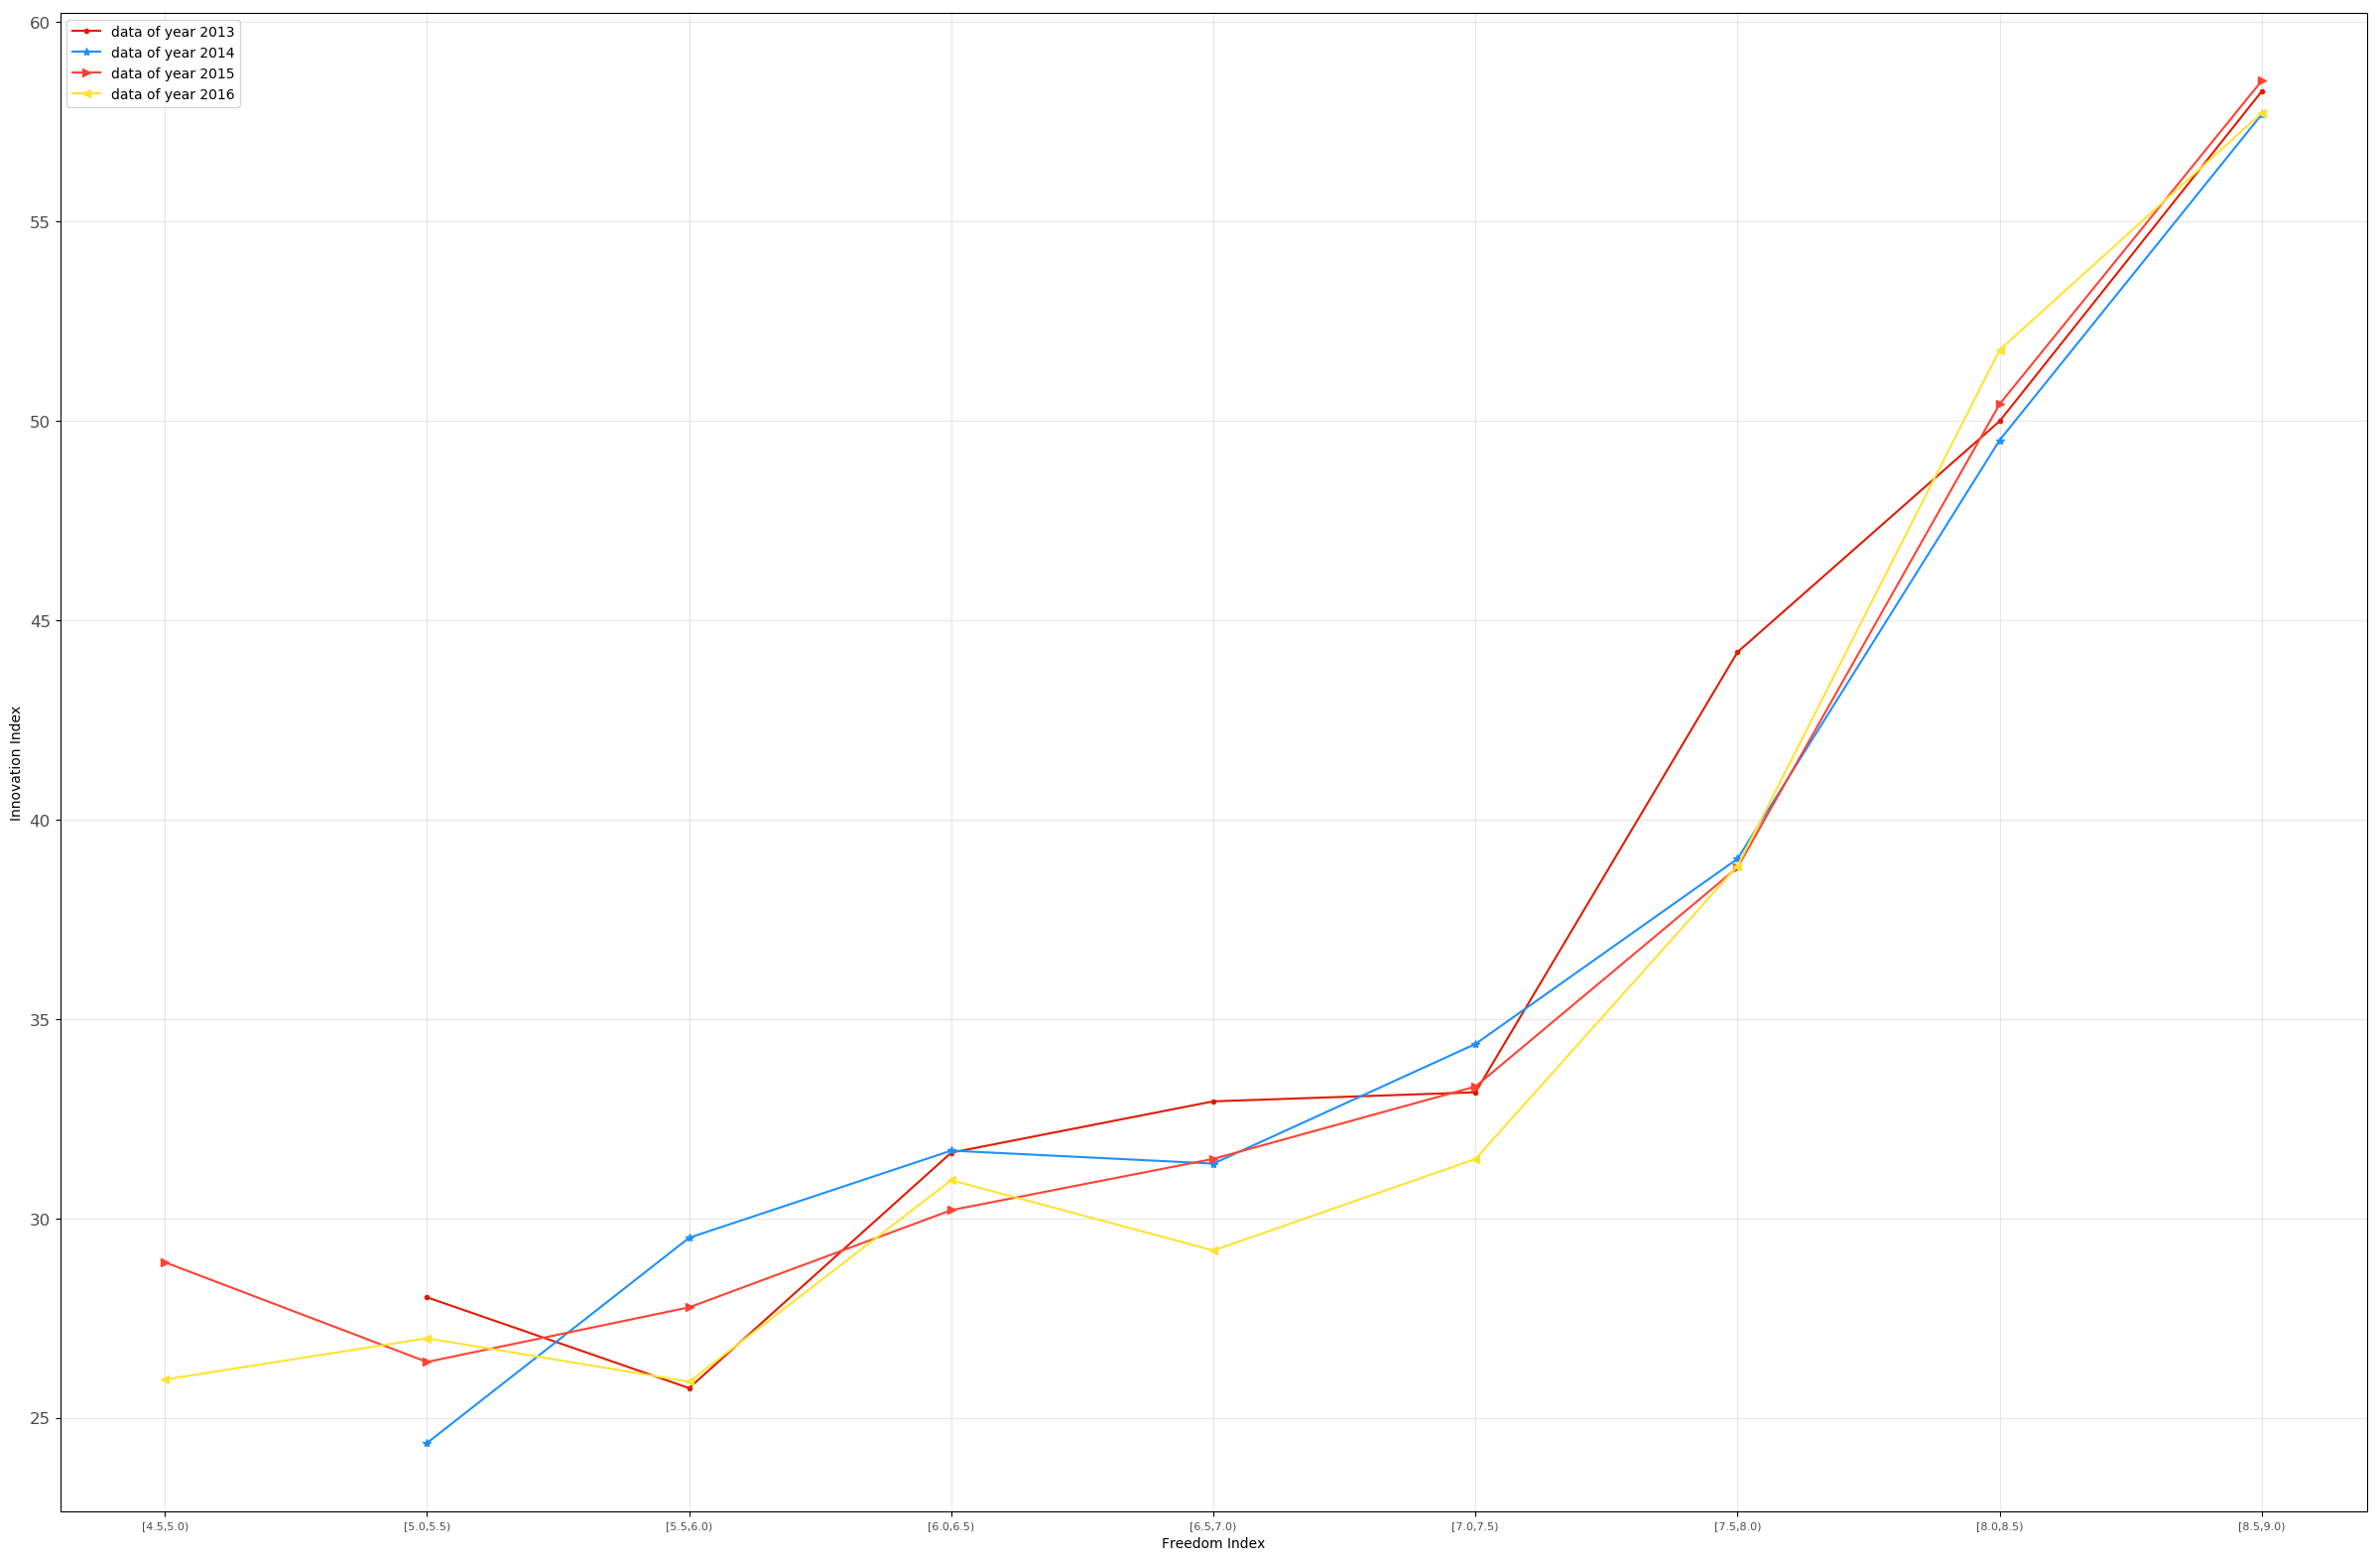

In [88]:
plot45_cat(x_list_45, y_list_45)

In [92]:
level_45_list[0].head(20)

Country  Score2013  year  hf_score
0      Switzerland      66.59  2013  8.715262
1           Sweden      61.36  2013  8.355576
2   United Kingdom      61.25  2013  8.512754
3      Netherlands      61.14  2013  8.403019
4          Finland      59.51  2013  8.578115
5        Singapore      59.41  2013  7.968493
6          Denmark      58.34  2013  8.599675
7          Ireland      57.91  2013  8.527786
8           Canada      57.60  2013  8.627752
9       Luxembourg      56.57  2013  8.399015
10         Iceland      56.40  2013  8.134551
11          Israel      55.98  2013  7.642391
12         Germany      55.83  2013  8.440461
13          Norway      55.64  2013  8.580085
14     New Zealand      54.46  2013  8.868585
15       Australia      53.07  2013  8.543666
16          France      52.83  2013  7.999735
17         Belgium      52.49  2013  8.205533
18           Japan      52.23  2013  8.196300
19         Austria      51.87  2013  8.475109

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
def Box_plot_45(level_45_list):
    fig, axes = plt.subplots(2, 2, figsize=(50,40))
    item = [['hf_score','Score2013'], ['hf_score','Score2014'], ['hf_score','Score2015'], ['hf_score','Score2016']]
    free_item = 'Human_Freedom_Score'
    ax_list = [[0,0],[0,1],[1,0],[1,1]]
    for s in range(4):
        cat_list = []
        data = level_45_list[s]
        cc = data[item[s][0]]
        for b in range(data.iloc[:,0].size):
            if math.isnan(cc[b]) == True:
                cat_list.append(math.nan)
            if cc[b] >= 4.5 and cc[b]<5.0:
                cat_list.append('[4.5,5.0)')
            if cc[b] >= 5.0 and cc[b]<5.5:
                cat_list.append('[5.0,5.5)')
            if cc[b] >= 5.5 and cc[b]<6.0:
                cat_list.append('[5.5,6.0)')
            if cc[b] >= 6.0 and cc[b]<6.5:
                cat_list.append('[6.0,6.5)')
            if cc[b] >= 6.5 and cc[b]<7.0:
                cat_list.append('[6.5,7.0)')
            if cc[b] >= 7.0 and cc[b]<7.5:
                cat_list.append('[7.0,7.5)')
            if cc[b] >= 7.5 and cc[b]<8.0:
                cat_list.append('[7.5,8.0)')
            if cc[b] >= 8.0 and cc[b]<8.5:
                cat_list.append('[8.0,8.5)')
            if cc[b] >= 8.5 and cc[b]<9:
                cat_list.append('[8.5,9.0)')
        cat_col = pd.DataFrame(cat_list)
        new_data = pd.concat([data,cat_col],axis=1)
        new_data.columns = ['Country', item[s][1], 'year', free_item, 'Catergory of Human Freedom Index']
        box = sns.boxplot(x=free_item, y='Catergory of Human Freedom Index', data=new_data, whis="range", palette="vlag",
                          ax=axes[ax_list[s][0], ax_list[s][1]], 
                          order=['[4.5,5.0)','[5.0,5.5)','[5.5,6.0)','[6.0,6.5)',
                                 '[6.5,7.0)','[7.0,7.5)','[7.5,8.0)','[8.0,8.5)','[8.5,9.0)'])
        #rescale boxplot x-axis with log
        axes[ax_list[s][0], ax_list[s][1]].set_title('Box Plot for Data of year '+ item[s][1][-4:])

        fig.subplots_adjust(wspace=.4)

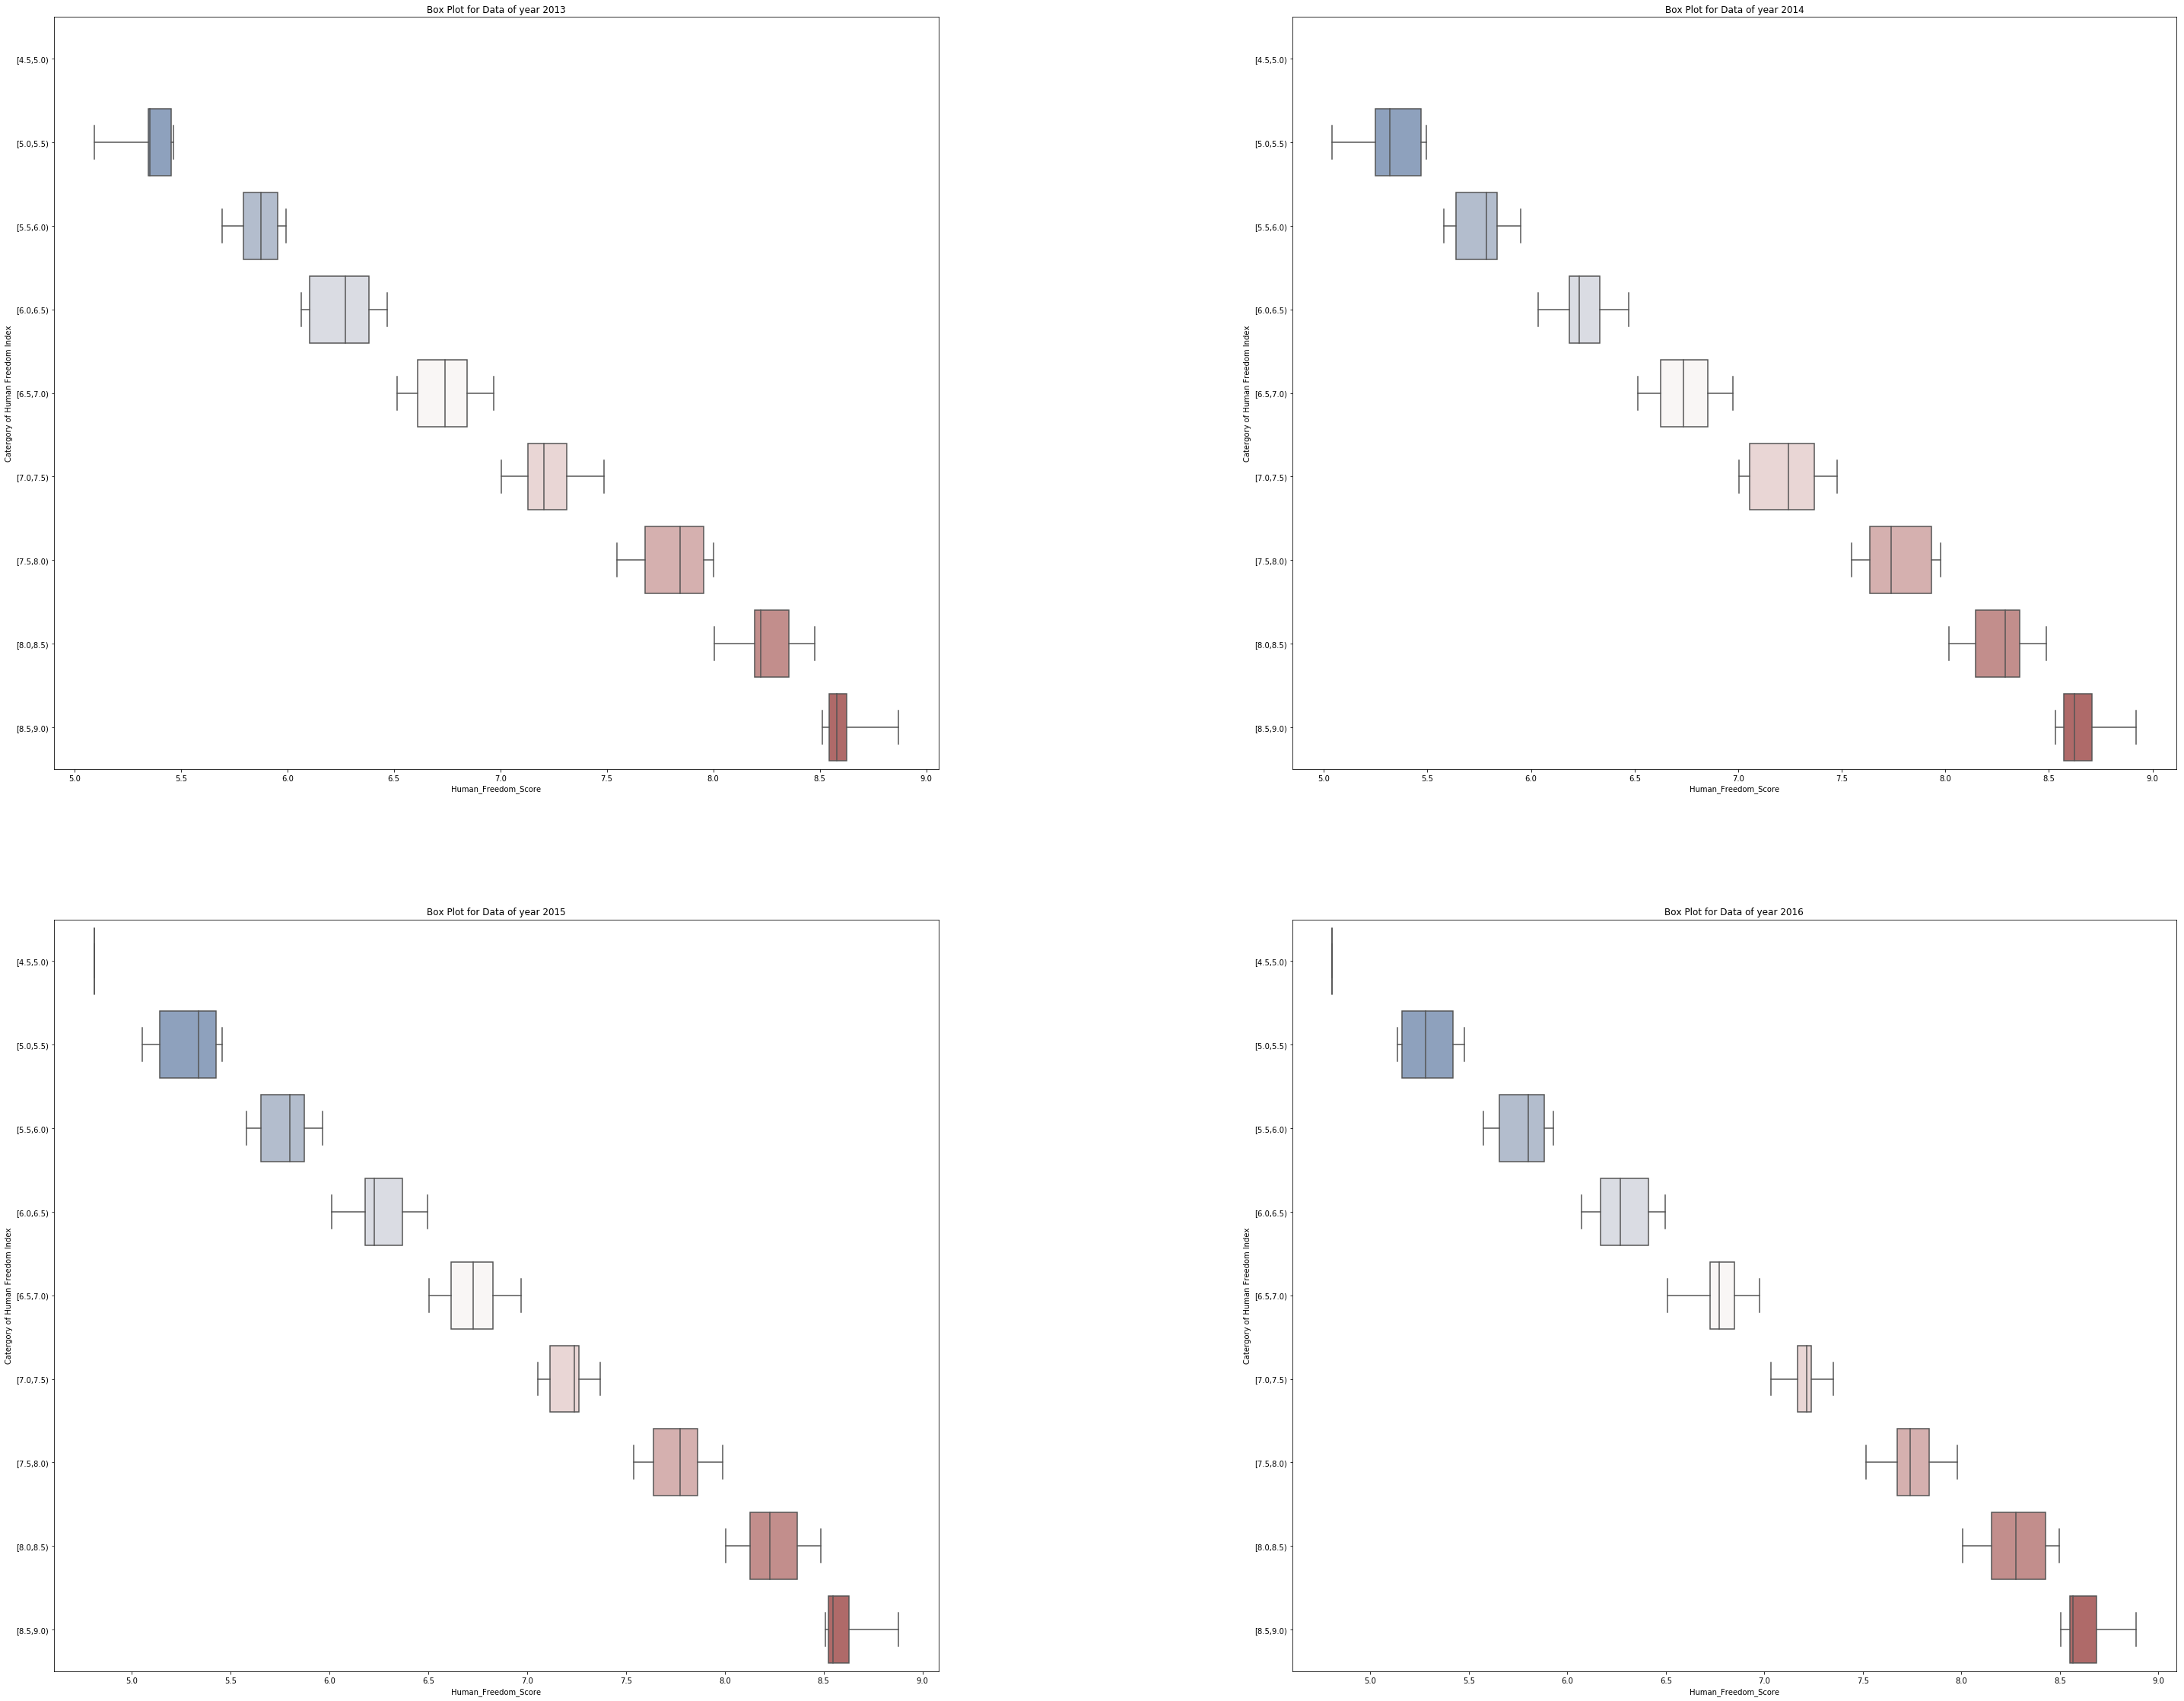

In [194]:
Box_plot_45(level_45_list)

## Part 6: Analysis of level 1-4, Belonging-Esteem 
by hunger + freedom index dataset

In [154]:
def Analysis_first_fourth_level(hunger, df_free): 
    level14_list = []
    for i in range(7):
        df = df_free[df_free['Year']==(2010+i)]
        string = 'undernourishment_rate_'+str(2010+i)
        p1 = hunger['Country']
        p2 = hunger[string]   
        p = pd.concat([p1, p2],axis = 1)
        df_level14 = pd.merge(df, p, on = 'Country', how='inner')
        df_level14 = df_level14.drop_duplicates(keep='first', inplace=False)
        level14_list.append(df_level14)
    x_list = []
    y_list = []
    hunger_list = ['undernourishment_rate_2010','undernourishment_rate_2011','undernourishment_rate_2012',
                   'undernourishment_rate_2013','undernourishment_rate_2014','undernourishment_rate_2015',
                   'undernourishment_rate_2016']
    for s in range(7):
        df = level14_list[s]
        dd = df.sort_values(by=[hunger_list[s]], ascending=True)
        x = np.asarray(dd[hunger_list[s]])
        y = np.asarray(dd['Human_Freedom_Score'])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_y = np.delete(y,j)
                new_x = np.delete(x,j)        
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list, level14_list

In [155]:
x_list_14, y_list_14, level14_list = Analysis_first_fourth_level(hunger, df_free)

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_14(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    item = [['undernourishment_rate_2010','Human_Freedom_Score'],['undernourishment_rate_2011','Human_Freedom_Score'],
            ['undernourishment_rate_2012','Human_Freedom_Score'],['undernourishment_rate_2013','Human_Freedom_Score'],
            ['undernourishment_rate_2014','Human_Freedom_Score'],['undernourishment_rate_2015','Human_Freedom_Score'],
            ['undernourishment_rate_2016','Human_Freedom_Score']]
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    for f in range(len(x_list)):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+item[f][0][-4:], marker = marker[f],color = color[f])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Human_Freedom_Score')
    #plt.ylim(1,4)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

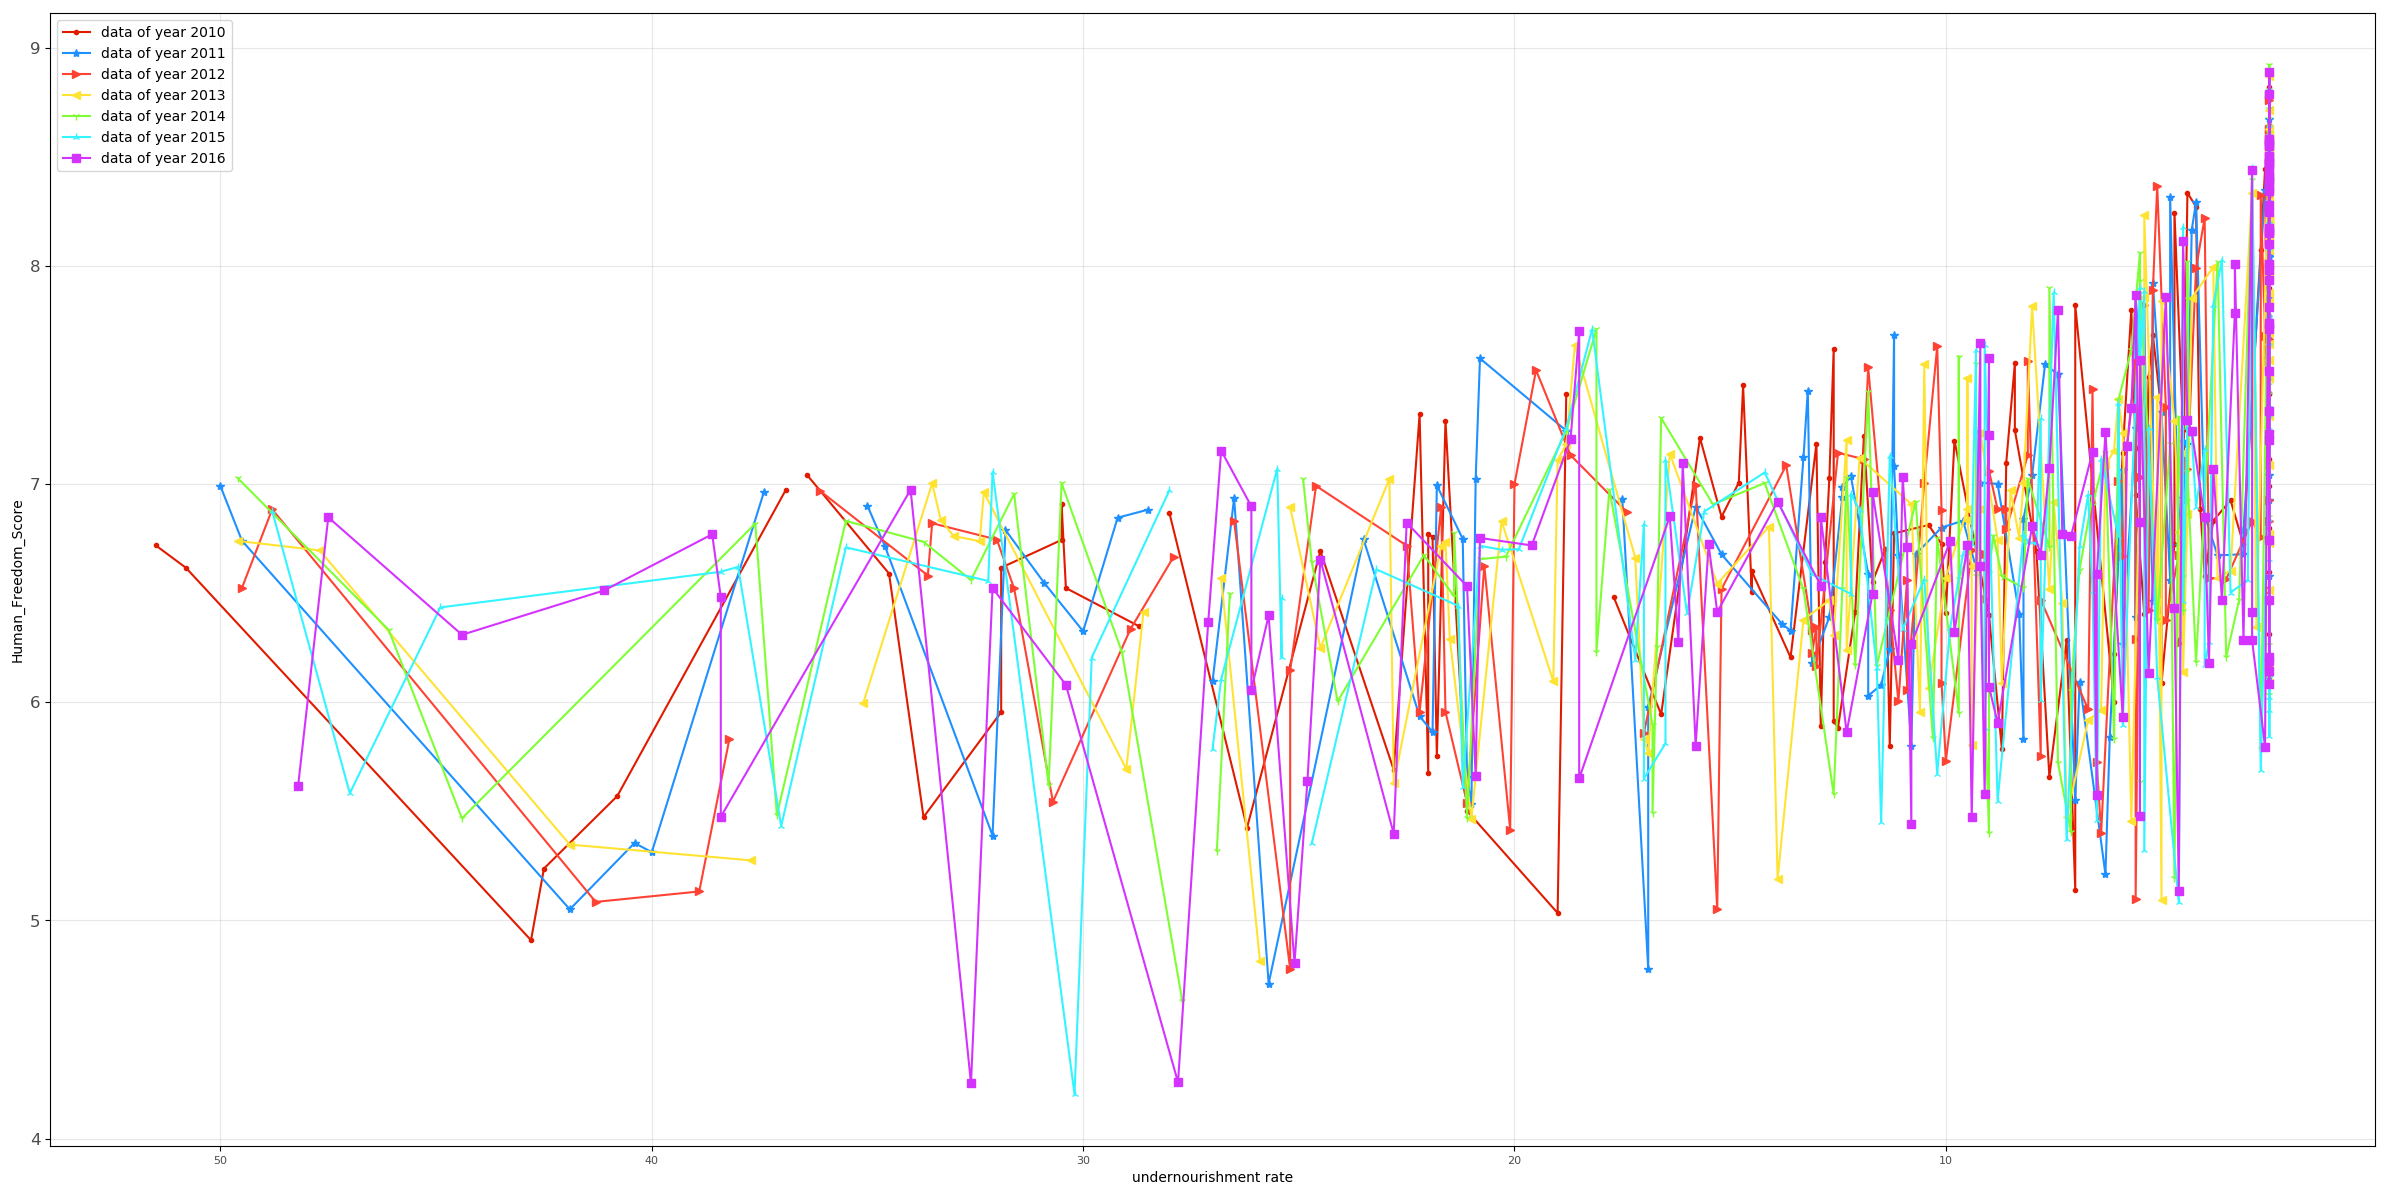

In [157]:
plot_14(x_list_14, y_list_14)

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_cat_level14(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    item = [['undernourishment_rate_2010','Human_Freedom_Score'],['undernourishment_rate_2011','Human_Freedom_Score'],
            ['undernourishment_rate_2012','Human_Freedom_Score'],['undernourishment_rate_2013','Human_Freedom_Score'],
            ['undernourishment_rate_2014','Human_Freedom_Score'],['undernourishment_rate_2015','Human_Freedom_Score'],
            ['undernourishment_rate_2016','Human_Freedom_Score']]
    x_item = ['[0,5)','[5,10)','[10,15)','[15,20)','[20,25)','[25,30)','[30,35)','[35,40)','[40,45)',
             '[45,50)']#,'[50+']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((10,2))
        for b in range(len(cc)):
            if cc[b] >= 0 and cc[b]<5:
                y_item[0][0] += cy[b]
                y_item[0][1] += 1
            if cc[b] >= 5 and cc[b]<10:
                y_item[1][0] += cy[b]
                y_item[1][1] += 1
            if cc[b] >= 10 and cc[b]<15:
                y_item[2][0] += cy[b]
                y_item[2][1] += 1
            if cc[b] >= 15 and cc[b]<20:
                y_item[3][0] += cy[b]
                y_item[3][1] += 1
            if cc[b] >= 20 and cc[b]<25:
                y_item[4][0] += cy[b]
                y_item[4][1] += 1
            if cc[b] >= 25 and cc[b]<30:
                y_item[5][0] += cy[b]
                y_item[5][1] += 1
            if cc[b] >= 30 and cc[b]<35:
                y_item[6][0] += cy[b]
                y_item[6][1] += 1
            if cc[b] >= 35 and cc[b]<40:
                y_item[7][0] += cy[b]
                y_item[7][1] += 1
            if cc[b] >= 40 and cc[b]<45:
                y_item[8][0] += cy[b]
                y_item[8][1] += 1
            if cc[b] >= 45 and cc[b]<50:
                y_item[9][0] += cy[b]
                y_item[9][1] += 1
#             if cc[b] >= 50:
#                 y_item[10][0] += cy[b]
#                 y_item[10][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+item[s][0][-4:], marker = marker[s],color = color[s])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Freedom Score')
    #plt.ylim(1.6,2.8)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

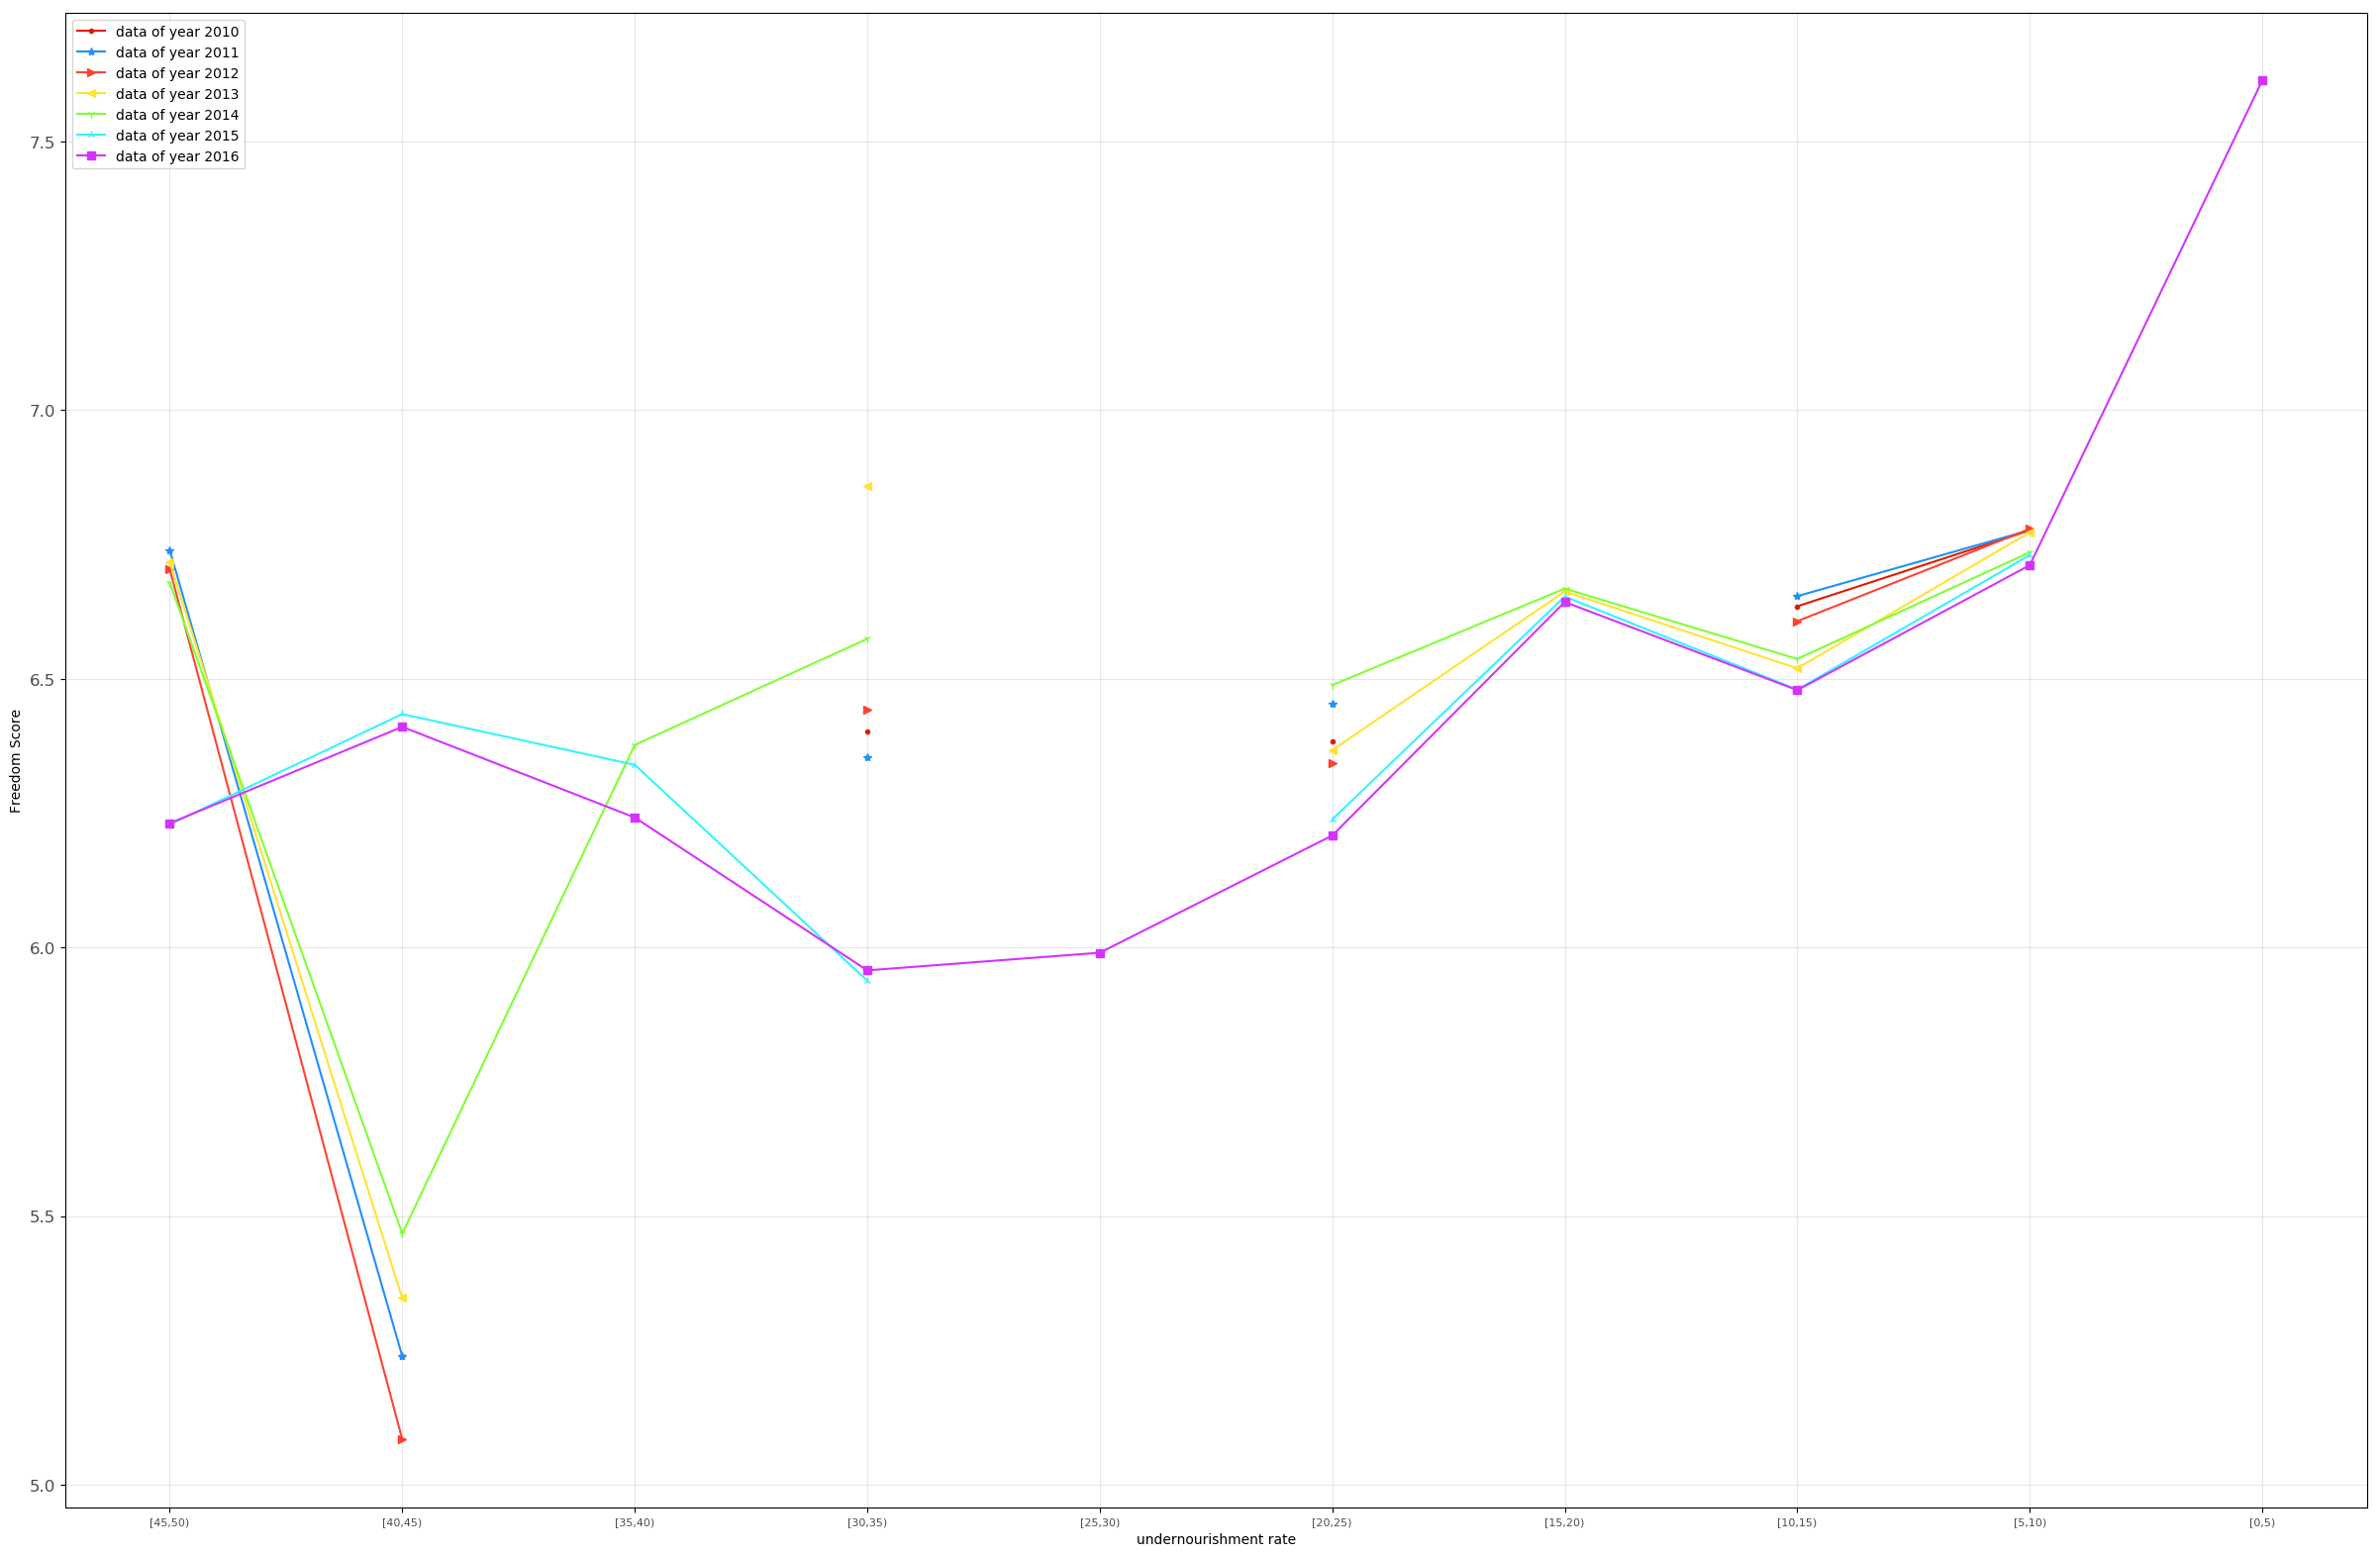

In [159]:
plot_cat_level14(x_list_14, y_list_14)

In [190]:
import seaborn as sns
def Box_plot_level14(level14_list):
    fig, axes = plt.subplots(3, 3, figsize=(60,40))
    item = [['undernourishment_rate_2010','Human_Freedom_Score'],['undernourishment_rate_2011','Human_Freedom_Score'],
            ['undernourishment_rate_2012','Human_Freedom_Score'],['undernourishment_rate_2013','Human_Freedom_Score'],
            ['undernourishment_rate_2014','Human_Freedom_Score'],['undernourishment_rate_2015','Human_Freedom_Score'],
            ['undernourishment_rate_2016','Human_Freedom_Score']]
    for s in range(7):
        cat_list = []
        data = level14_list[s]
        cc = data[item[s][0]]
        for b in range(data.iloc[:,0].size):
            if math.isnan(cc[b]) == True:
                cat_list.append(math.nan)
            if cc[b] >= 0 and cc[b]<5:
                cat_list.append('[0,5)')
            if cc[b] >= 5 and cc[b]<10:
                cat_list.append('[5,10)')
            if cc[b] >= 10 and cc[b]<15:
                cat_list.append('[10,15)')
            if cc[b] >= 15 and cc[b]<20:
                cat_list.append('[15,20)')
            if cc[b] >= 20 and cc[b]<25:
                cat_list.append('[20,25)')
            if cc[b] >= 25 and cc[b]<30:
                cat_list.append('[25,30)')
            if cc[b] >= 30 and cc[b]<35:
                cat_list.append('[30,35)')
            if cc[b] >= 35 and cc[b]<40:
                cat_list.append('[35,40)')
            if cc[b] >= 40 and cc[b]<45:
                cat_list.append('[40,45)')
            if cc[b] >= 45 and cc[b]<50:
                cat_list.append('[45,50)')
        cat_col = pd.DataFrame(cat_list)
        new_data = pd.concat([data,cat_col],axis=1)
        new_data.columns = ['Year', 'Country', item[s][1], item[s][0], 'Catergory of Hunger']
        box = sns.boxplot(x=item[s][1], y='Catergory of Hunger', data=new_data, whis="range", palette="vlag",
                          ax=axes[s // 3, s % 3], 
                          order=['[0,5)','[5,10)','[10,15)','[15,20)','[20,25)','[25,30)','[30,35)','[35,40)','[40,45)'])
        #rescale boxplot x-axis with log
        axes[s // 3, s % 3].set_title('Box Plot for Data of year '+ item[s][0][-4:])

        fig.subplots_adjust(wspace=.4)

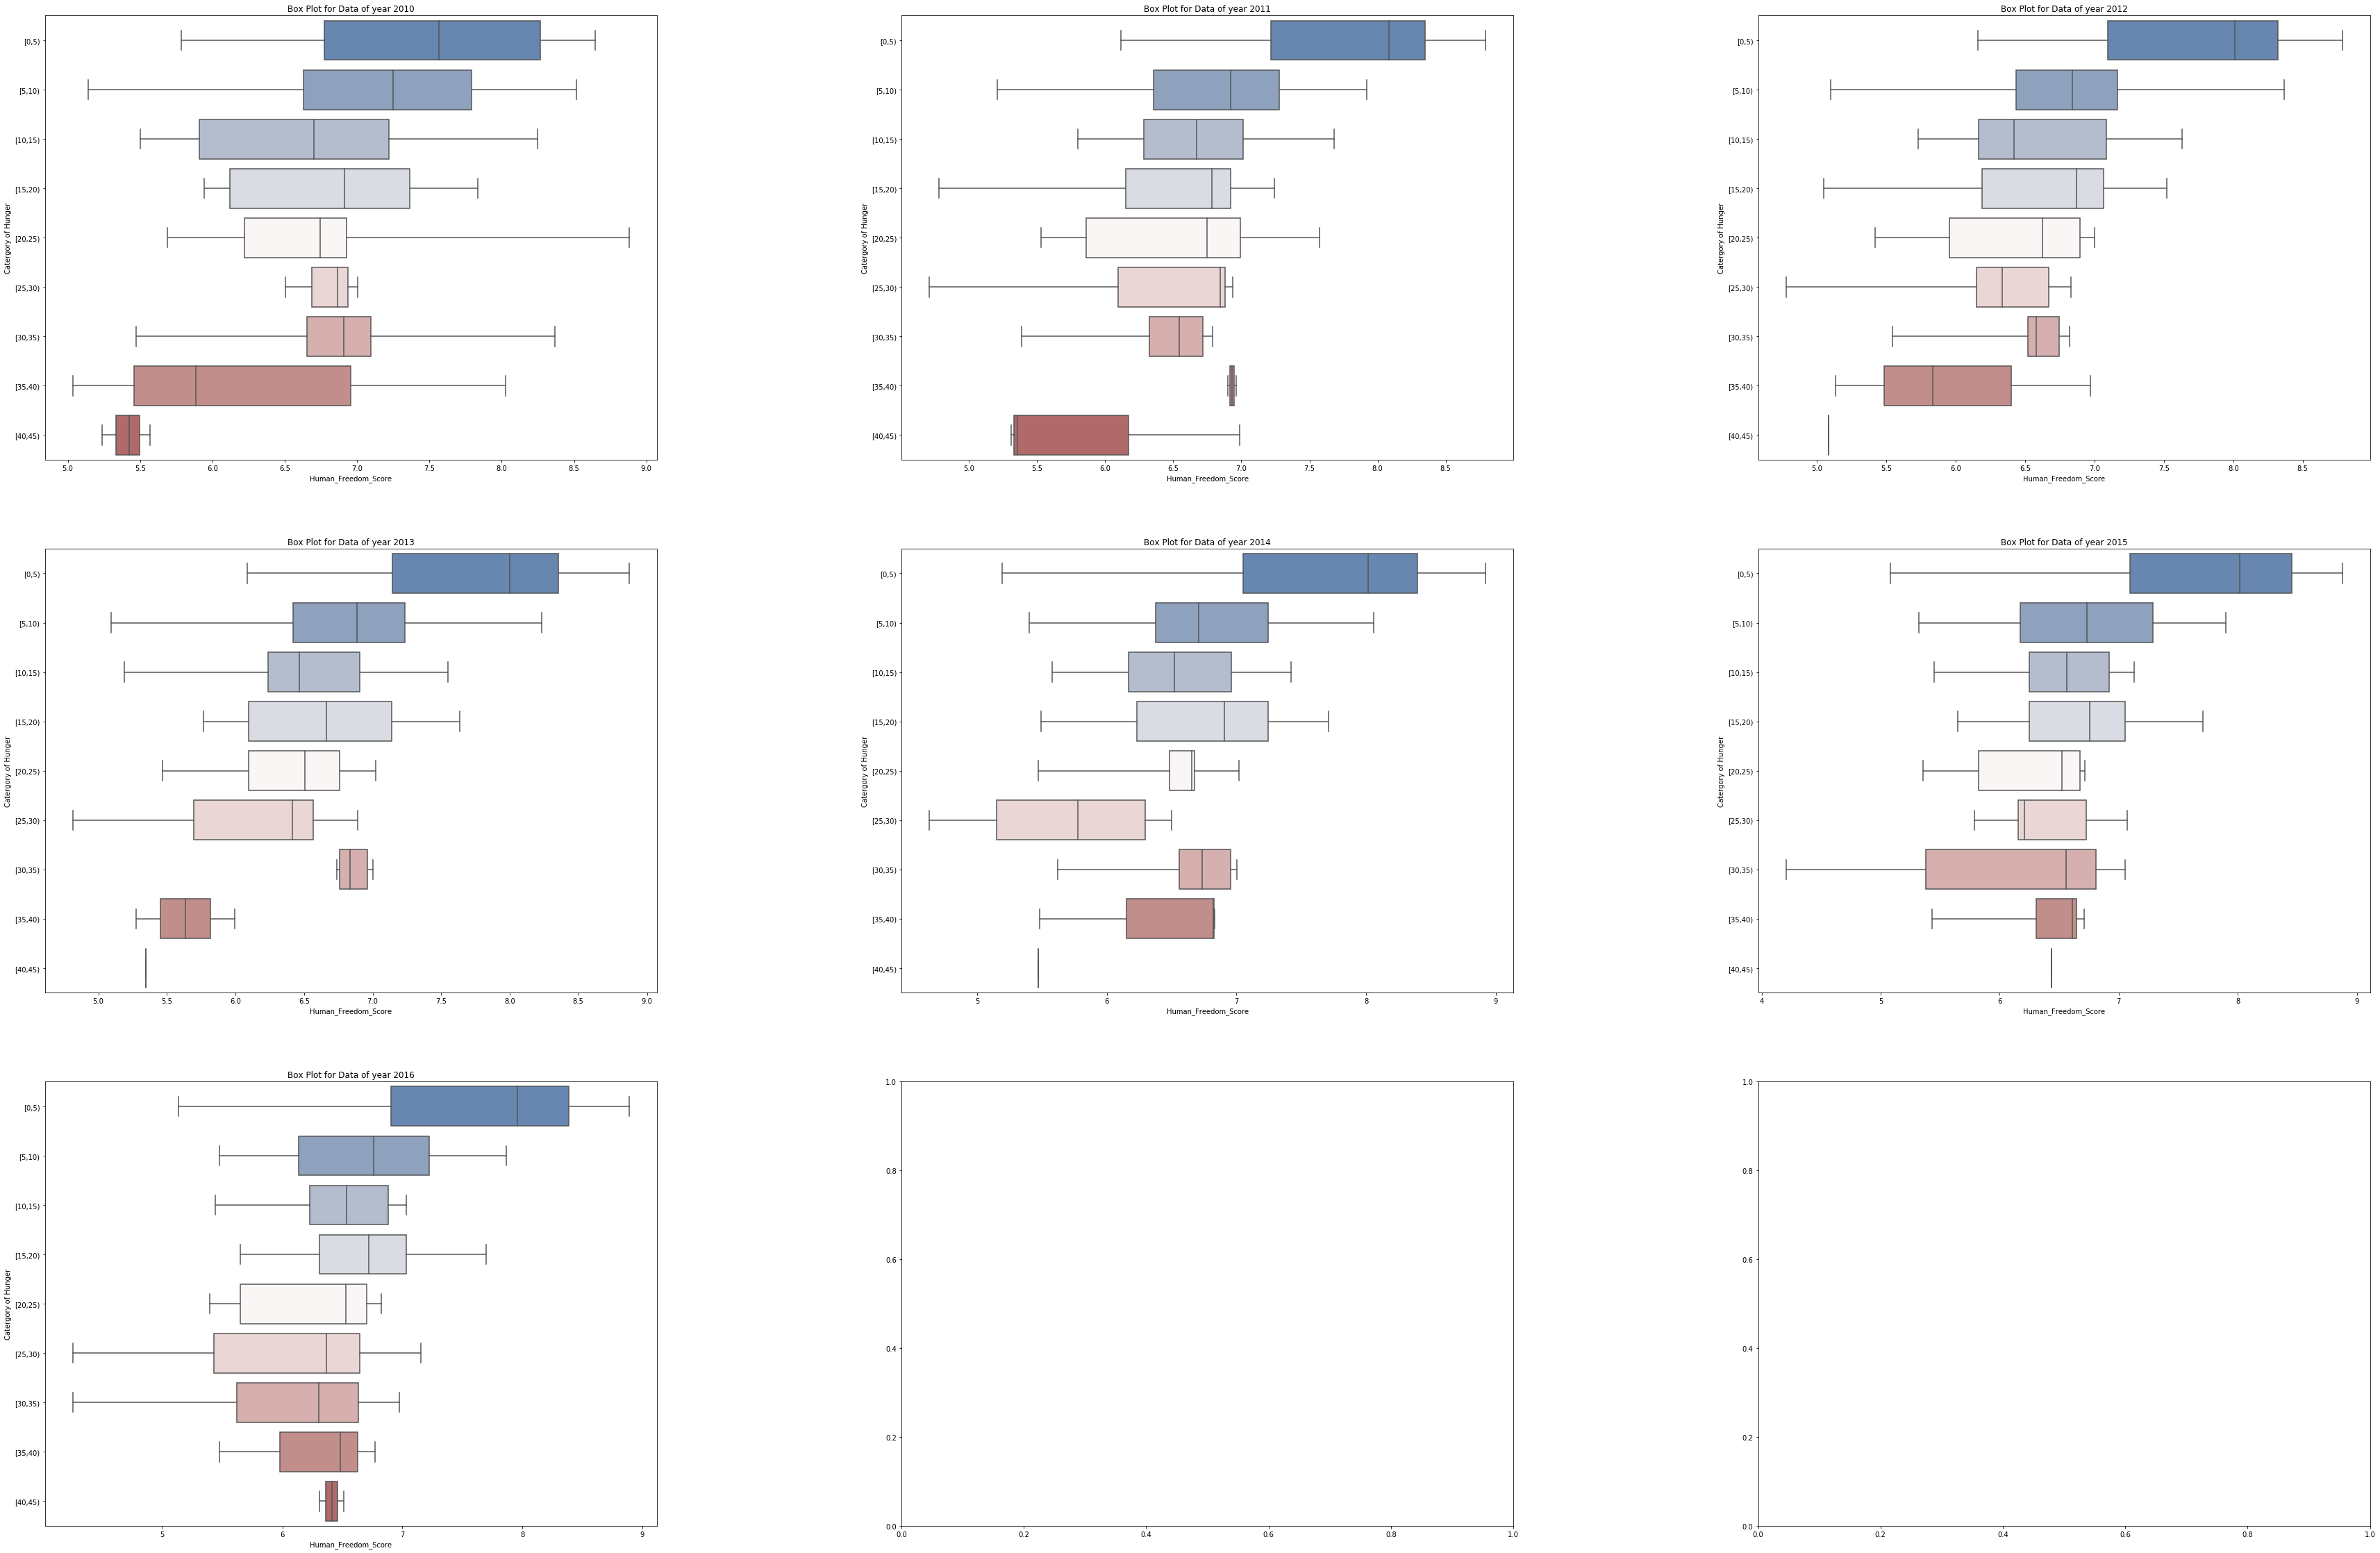

In [179]:
Box_plot_level14(level14_list)

## Part 7: Analysis of level 1-5, Physiological-Esteem 
by hunger + Innovation index dataset

In [166]:
def Analysis_level15(hunger, inno_list): 
    level_15_list = []
    for i in range(4):
        string = 'undernourishment_rate_'+str(2013+i)
        p1 = hunger['Country']
        p2 = hunger[string]   
        p = pd.concat([p1, p2],axis = 1)
        df_level15 = pd.merge(p, inno_list[i], on = 'Country', how='inner')
        df_level15 = df_level15.drop_duplicates(keep='first', inplace=False)
        level_15_list.append(df_level15)
    x_list = []
    y_list = []
    item = [['undernourishment_rate_2013','Score2013'], ['undernourishment_rate_2014','Score2014'],
            ['undernourishment_rate_2015','Score2015'], ['undernourishment_rate_2016','Score2016']]
    for s in range(4):
        df = level_15_list[s]
        dd = df.sort_values(by=[item[s][0]], ascending=True)
        x = np.asarray(dd[item[s][0]])
        y = np.asarray(dd[item[s][1]])
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list, level_15_list

In [167]:
x_list_15, y_list_15, level_15_list = Analysis_level15(hunger, inno_list)

In [169]:
def plot_15(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    item = [['undernourishment_rate_2013','Score2013'], ['undernourishment_rate_2014','Score2014'],
            ['undernourishment_rate_2015','Score2015'], ['undernourishment_rate_2016','Score2016']]
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    for f in range(len(x_list)):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+item[f][0][-4:], marker = marker[f],color = color[f])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Human_Innovation_Index')
    #plt.ylim(1,4)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

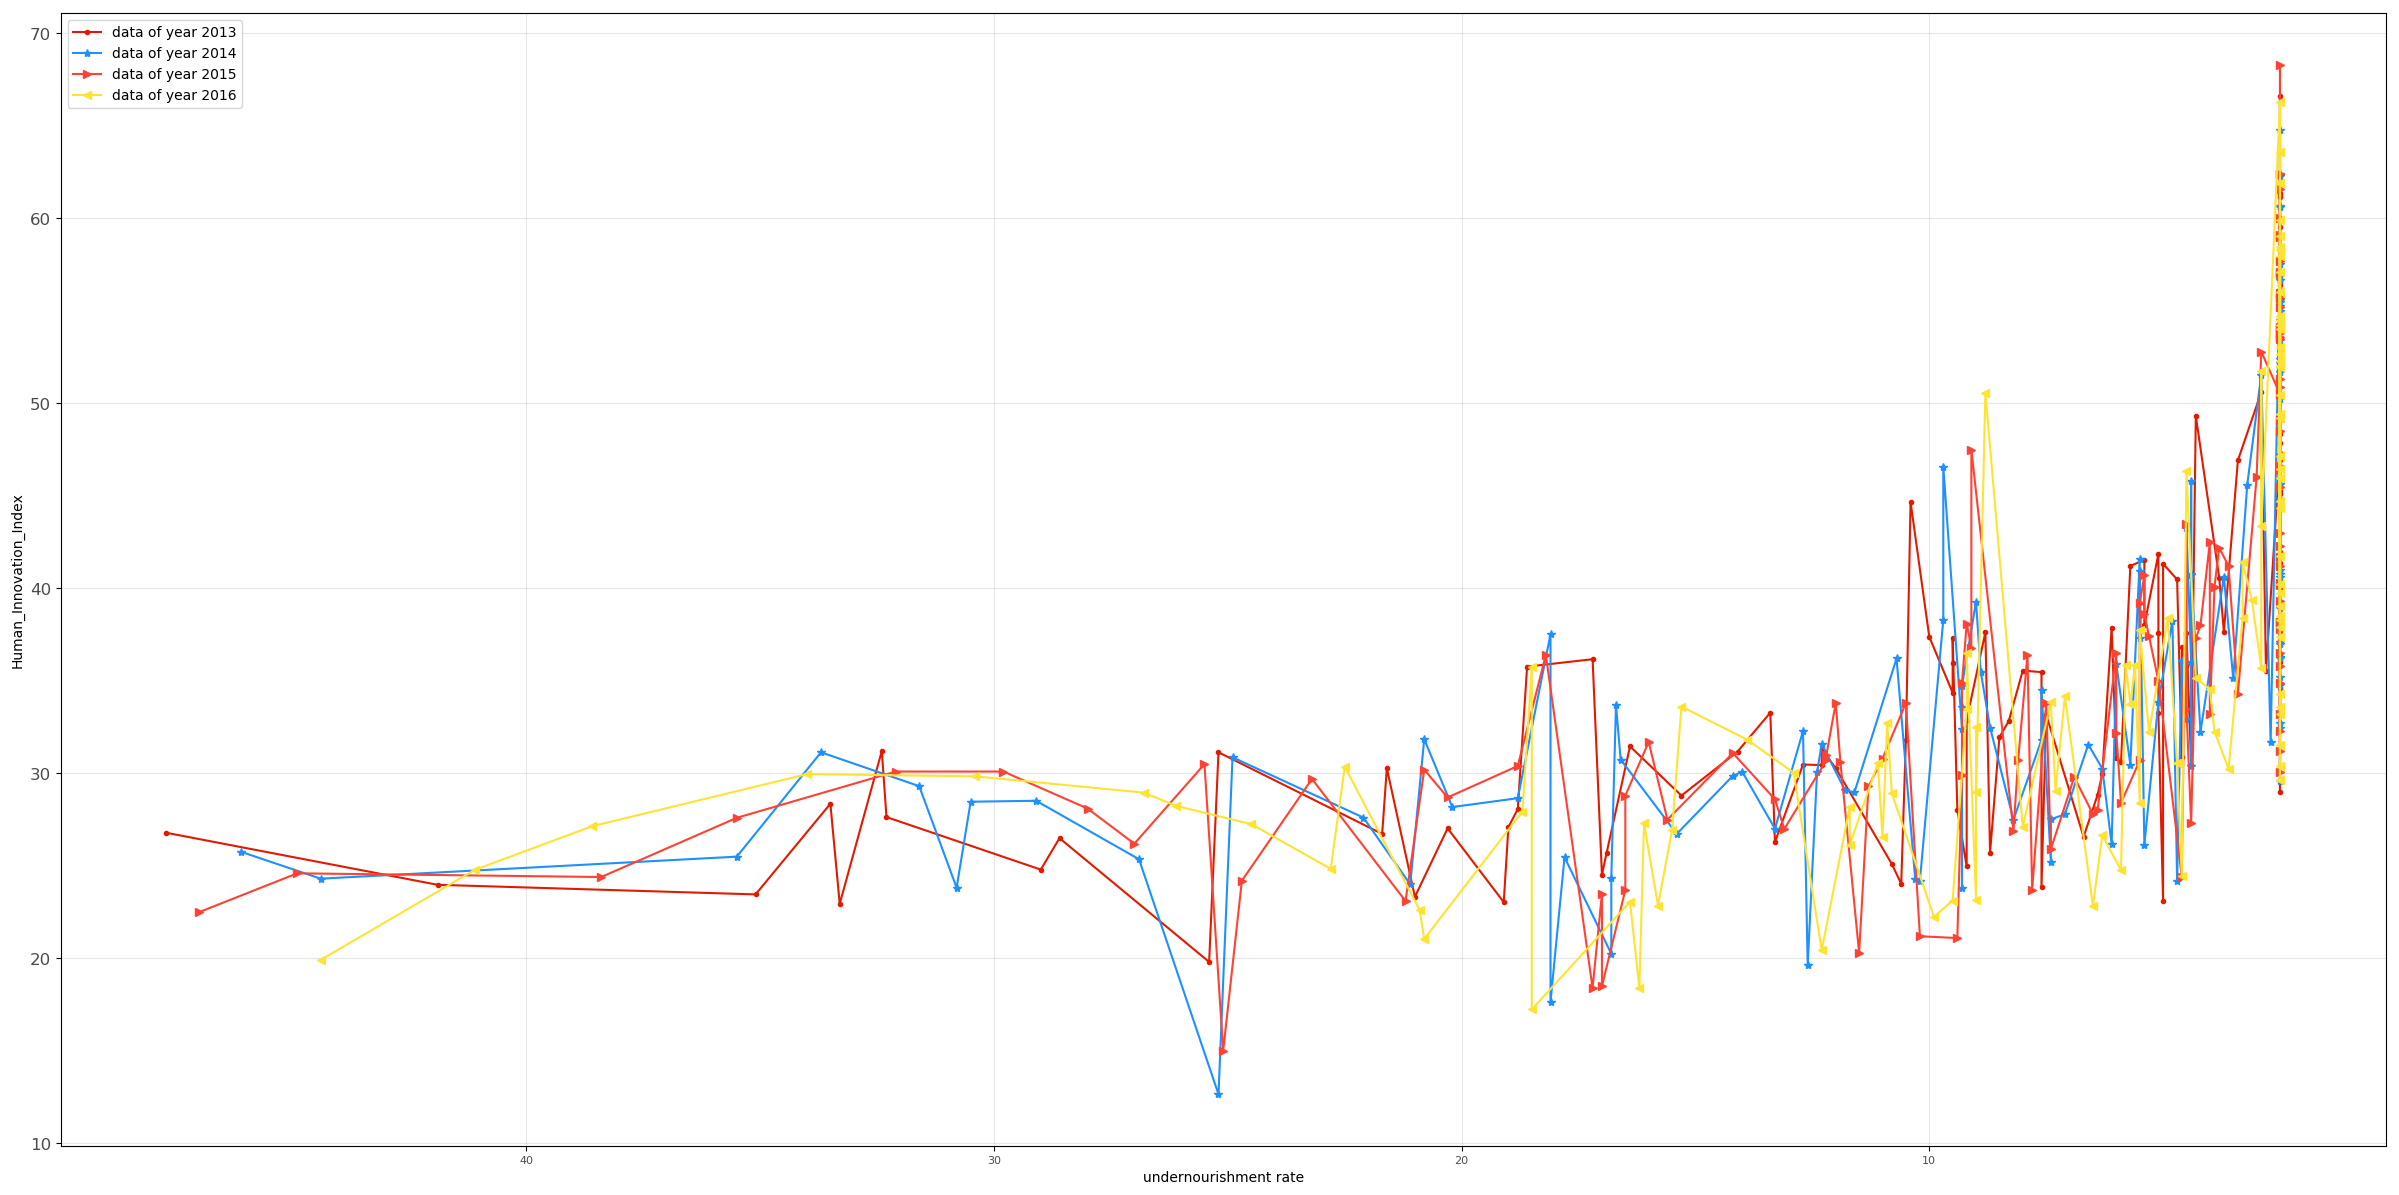

In [170]:
plot_15(x_list_15, y_list_15)

In [171]:
def plot_cat_level14(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    item = [['undernourishment_rate_2013','Score2013'], ['undernourishment_rate_2014','Score2014'],
            ['undernourishment_rate_2015','Score2015'], ['undernourishment_rate_2016','Score2016']]
    x_item = ['[0,5)','[5,10)','[10,15)','[15,20)','[20,25)','[25,30)','[30,35)','[35,40)','[40,45)',
             '[45,50)']#,'[50+']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((10,2))
        for b in range(len(cc)):
            if cc[b] >= 0 and cc[b]<5:
                y_item[0][0] += cy[b]
                y_item[0][1] += 1
            if cc[b] >= 5 and cc[b]<10:
                y_item[1][0] += cy[b]
                y_item[1][1] += 1
            if cc[b] >= 10 and cc[b]<15:
                y_item[2][0] += cy[b]
                y_item[2][1] += 1
            if cc[b] >= 15 and cc[b]<20:
                y_item[3][0] += cy[b]
                y_item[3][1] += 1
            if cc[b] >= 20 and cc[b]<25:
                y_item[4][0] += cy[b]
                y_item[4][1] += 1
            if cc[b] >= 25 and cc[b]<30:
                y_item[5][0] += cy[b]
                y_item[5][1] += 1
            if cc[b] >= 30 and cc[b]<35:
                y_item[6][0] += cy[b]
                y_item[6][1] += 1
            if cc[b] >= 35 and cc[b]<40:
                y_item[7][0] += cy[b]
                y_item[7][1] += 1
            if cc[b] >= 40 and cc[b]<45:
                y_item[8][0] += cy[b]
                y_item[8][1] += 1
            if cc[b] >= 45 and cc[b]<50:
                y_item[9][0] += cy[b]
                y_item[9][1] += 1
#             if cc[b] >= 50:
#                 y_item[10][0] += cy[b]
#                 y_item[10][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+item[s][0][-4:], marker = marker[s],color = color[s])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Innovation Index Score')
    #plt.ylim(1.6,2.8)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

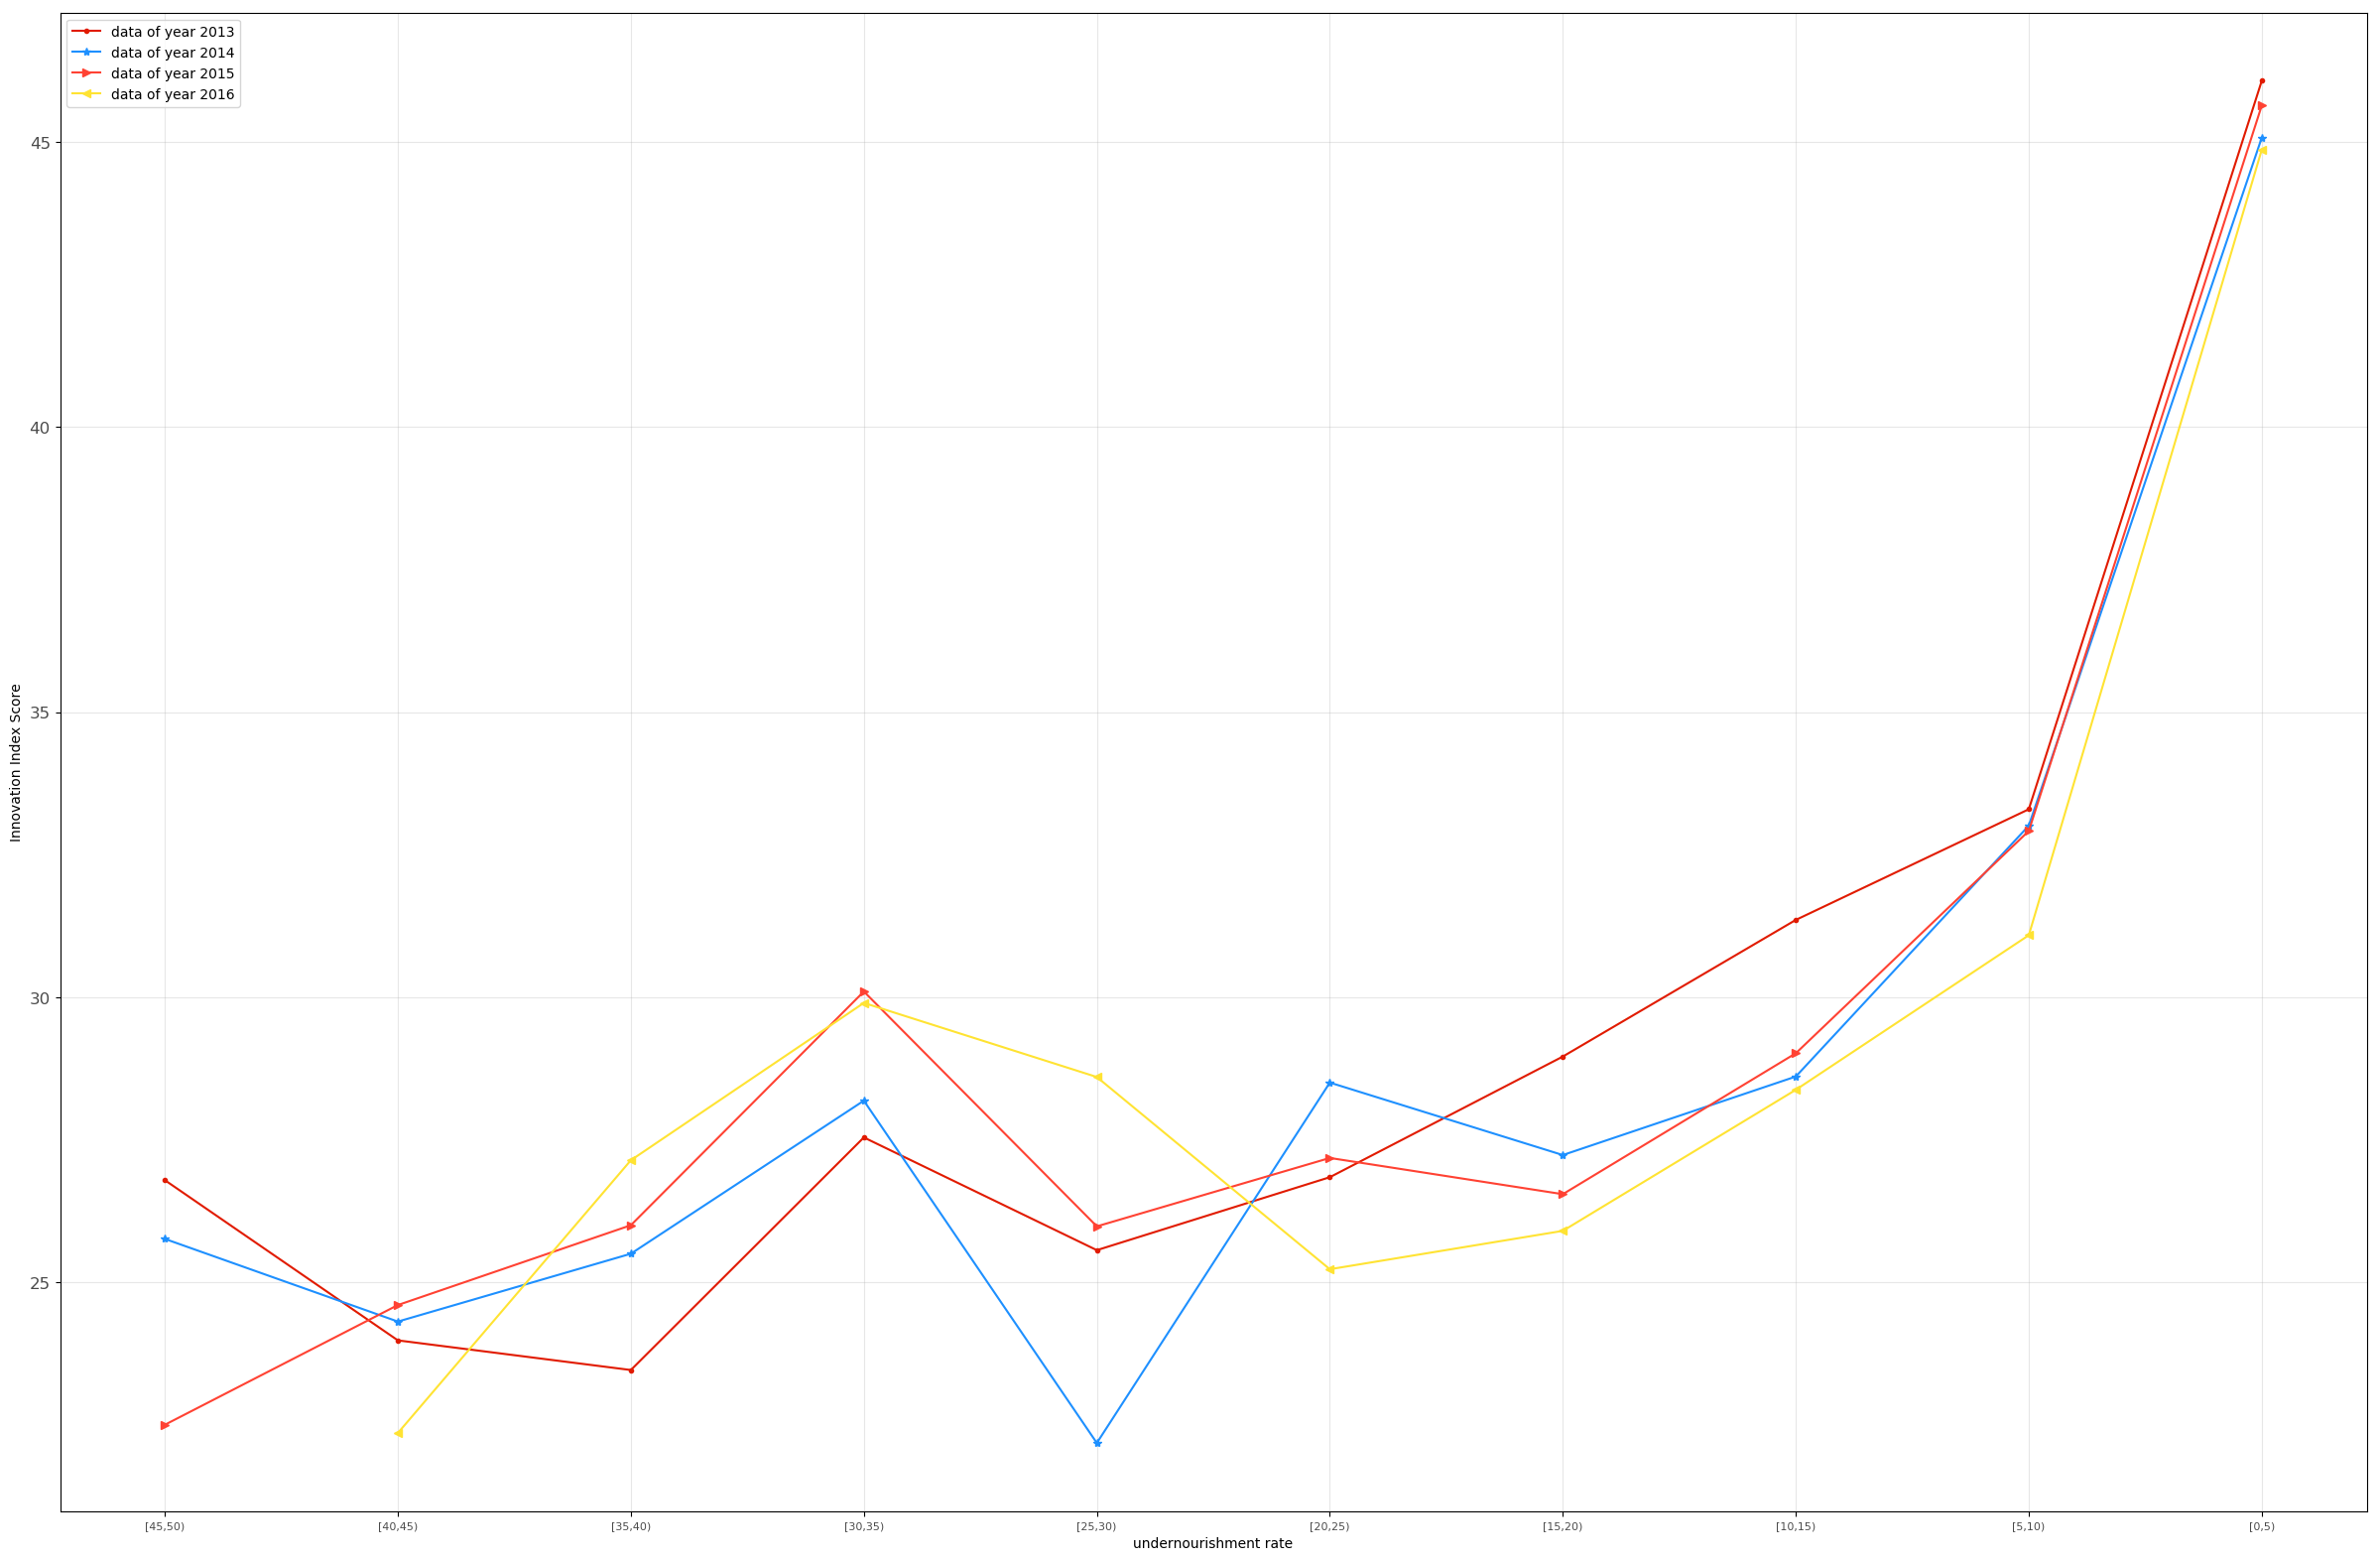

In [172]:
plot_cat_level14(x_list_15, y_list_15)

In [188]:
import seaborn as sns
def Box_plot_level15(level_15_list):
    fig, axes = plt.subplots(2, 2, figsize=(60,40))
    item = [['undernourishment_rate_2013','Score2013'], ['undernourishment_rate_2014','Score2014'],
            ['undernourishment_rate_2015','Score2015'], ['undernourishment_rate_2016','Score2016']]
    inno_item = ['Innovation index score of year 2013','Innovation index score of year 2014',
                 'Innovation index score of year 2015','Innovation index score of year 2016']
    for s in range(4):
        cat_list = []
        data = level_15_list[s]
        cc = data[item[s][0]]
        for b in range(data.iloc[:,0].size):
            if math.isnan(cc[b]) == True:
                cat_list.append(math.nan)
            if cc[b] >= 0 and cc[b]<5:
                cat_list.append('[0,5)')
            if cc[b] >= 5 and cc[b]<10:
                cat_list.append('[5,10)')
            if cc[b] >= 10 and cc[b]<15:
                cat_list.append('[10,15)')
            if cc[b] >= 15 and cc[b]<20:
                cat_list.append('[15,20)')
            if cc[b] >= 20 and cc[b]<25:
                cat_list.append('[20,25)')
            if cc[b] >= 25 and cc[b]<30:
                cat_list.append('[25,30)')
            if cc[b] >= 30 and cc[b]<35:
                cat_list.append('[30,35)')
            if cc[b] >= 35 and cc[b]<40:
                cat_list.append('[35,40)')
            if cc[b] >= 40 and cc[b]<45:
                cat_list.append('[40,45)')
            if cc[b] >= 45 and cc[b]<50:
                cat_list.append('[45,50)')
        cat_col = pd.DataFrame(cat_list)
        new_data = pd.concat([data,cat_col],axis=1)
        new_data.columns = ['Country', item[s][0], inno_item[s], 'Percentage Range of Hunger']
        box = sns.boxplot(x=inno_item[s], y='Percentage Range of Hunger', data=new_data, whis="range", palette="vlag",
                          ax=axes[s // 2, s % 2], 
                          order=['[0,5)','[5,10)','[10,15)','[15,20)','[20,25)','[25,30)','[30,35)','[35,40)','[40,45)'])
        #rescale boxplot x-axis with log
        axes[s // 2, s % 2].set_title('Box Plot for Data of year '+ item[s][0][-4:])

        fig.subplots_adjust(wspace=.4)

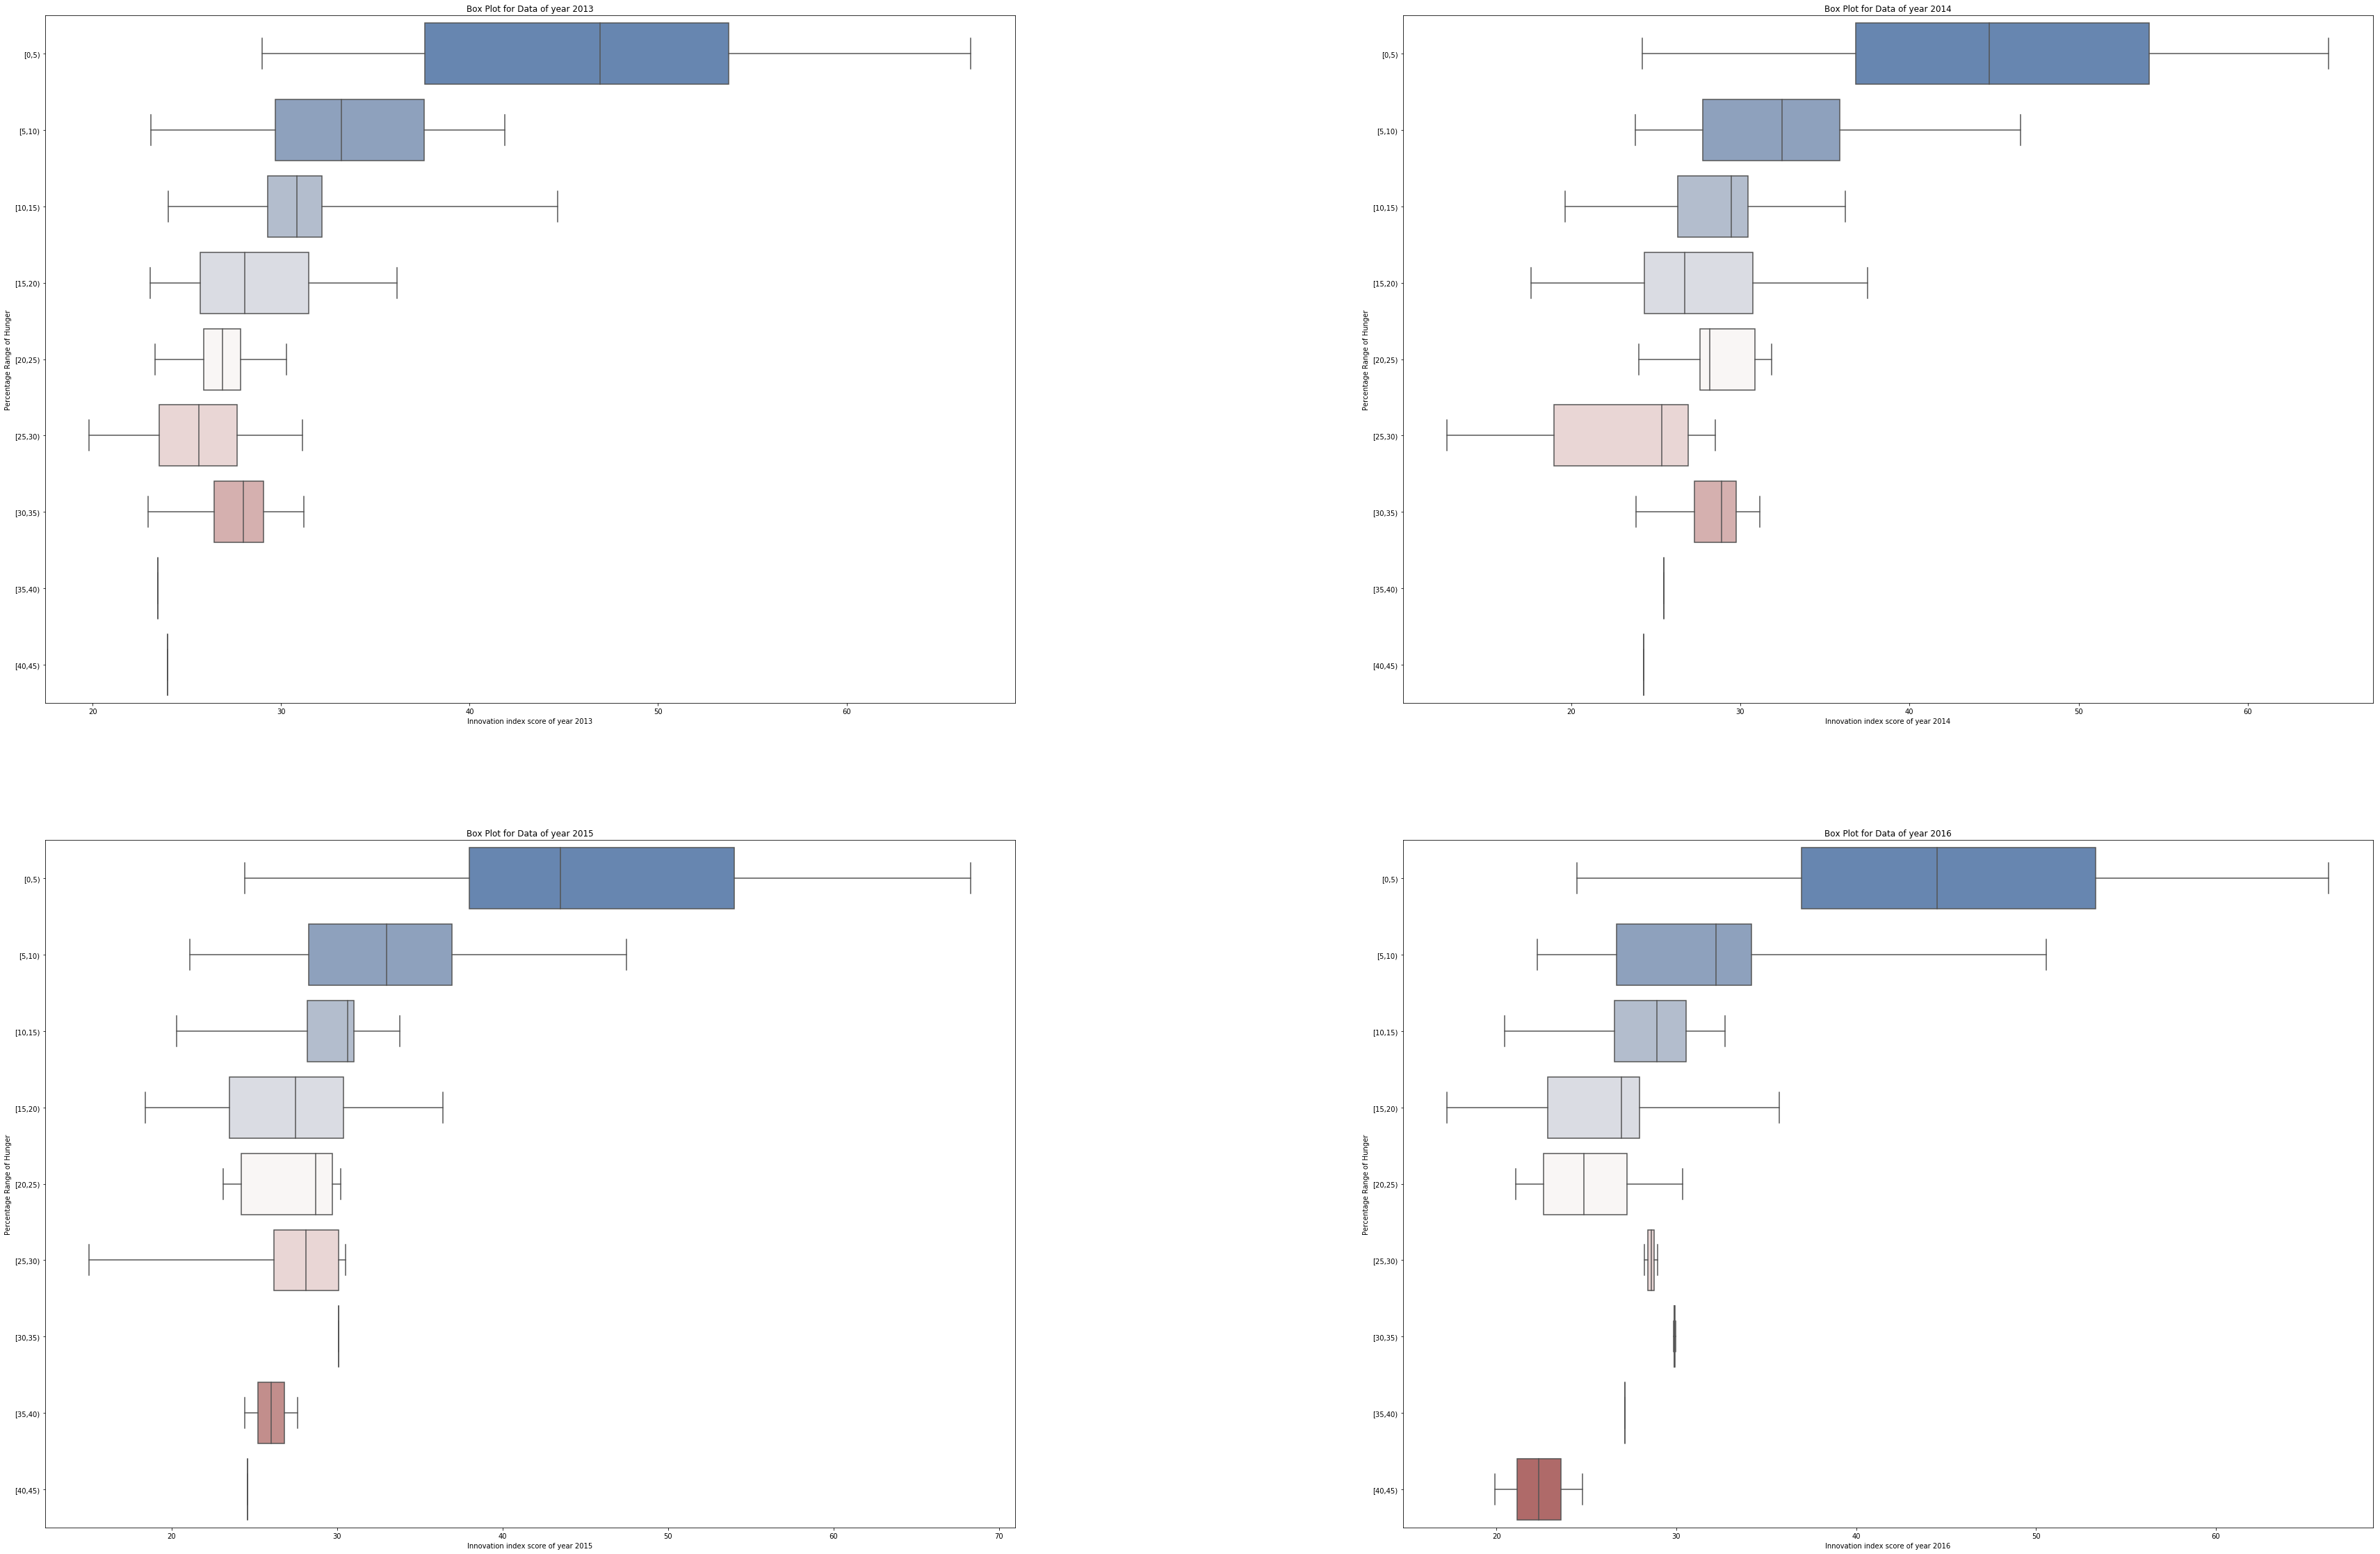

In [189]:
Box_plot_level15(level_15_list)